In [199]:
### DISCOVERED AN ERROR IN SCB'S AGE GRP PREL DATA (TABELL 2) , VERIFIED FOR 2015, PROBABLY SAME UP INC 2019 ###
### 90+ AGE GRP CONTAINS TOO FEW (22167) DEATHS. FETCHING THE DATA FROM THE OFFICIAL DATABASE - ###
### GIVES 24083 ###

#### EXPLANATION OF THE DIFFERENCE IS THAT THE PREL.DATA IS AGE REACHED AT TIME OF DEATH ####
#### WHILE THE OFFICIAL DATA I USED INITIALLY IS AGE AT END-OF-YEAR ####
#### REPLACING THE URL TO OFFICIAL DATA TO POINT AT A PAGE WHERE DEATHS ARE COUNTED AS FOR THE PREL.DATA ####
#### REMOVES THE DIFFERENCE ! ####

### ALL CODE BELOW PREFIXED BY 'BUG' IS DUE TO THIS PROBLEM ###

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [201]:
# define parameters for SCB's JSON API for population data #
# don't forget to change the default 'px' response format to 'json' bottom of the pop_query data struct # 

pop_url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'

pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [202]:
# define parameters for SCB's JSON API for death data #
# don't forget to change the default 'px' response format to 'json' bottom of the dead_query data struct #

# DEAD AT AGE BY END OF YEAR #
#dead_url = 'http://api.scb.se/OV0104/v1/doris/en/ssd/START/BE/BE0101/BE0101I/DodaFodelsearK'

# DEAD AT AGE REACHED AT TIME OF DEATH #
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'

dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [203]:
### function to fetch SCB population or death data, returns 3 DataFrames w. different age binnings ### 

def fetch_scb_data(url,query,param='pop'):
    
    # call the API, check HTML status code (should be 200 for success) #

    r= requests.post(url,json=query)
    print ('HTML status code fetching {}: '.format(param),r.status_code)
    
    # extract the json data section from the response #

    json_data = r.json()['data'] # get the data section (skip metadata) #

    # we get two dictionaries : 'key' and 'values' #
    # 'key' attributes are : 'geo' (all of sweden), 'age','gender','year' #
    # 'values' attribute is : 'population' / 'dead' #
    
    # check the first record to figure out the structure of the data #
    print ('record layout for {}: '.format(param),json_data[0])
    
    # create a Pandas DataFrame from the list of dictionaries, and massage it to a decent structure #

    age_df = pd.DataFrame.from_dict(json_data)
    age_df[['area','age','gender','year']] = age_df['key'].to_list() # split keys to separate columns #

    age_df[param] = age_df['values'].apply(
        lambda x : x[0]).astype(int) # extract size from the values list #

    age_df['num_age'] = age_df['age'].apply(
        lambda x :x.replace('+','')).astype(int) # create numeric age column #

    age_df = age_df.drop(['key','values','area'],axis=1) # delete unwanted columns #

    # combine the two genders #
    age_df = age_df.groupby(['year','num_age']).sum()

    # bin the data to the same age bins that are used in SCB's prel. death data #
    age_df['scb_prel_age_bin'] = pd.cut(age_df.index.get_level_values(1),[-1,64,79,89,200],
                                        labels=['-64','65-79','80-89','90+'])
    
    # and finally, for each year, combine the 1 year age bin sums to match the 4 age bins of the prel death data #

    age_scb_prel_df = age_df.groupby([age_df.index.get_level_values(0),
                                                      'scb_prel_age_bin']).sum()
    
    # create a df with total yearly values #
    df = age_scb_prel_df.groupby('year').sum()
    
    
    

    return age_df,age_scb_prel_df,df
    

In [204]:
### get the population & death data from SCB ###
pop_age_df,pop_age_scb_prel_df,pop_df = fetch_scb_data(pop_url,pop_query,param='pop')
dead_age_df,dead_age_scb_prel_df,dead_df = fetch_scb_data(dead_url,dead_query,param='dead')


HTML status code fetching pop:  200
record layout for pop:  {'key': ['00', '0', '1', '2002'], 'values': ['42233']}
HTML status code fetching dead:  200
record layout for dead:  {'key': ['00', '0', '1', '2002'], 'values': ['172']}


In [205]:
### combine the pop & death data to 3 separate, complete df's with: ###
### 1) 1 year age bins; 2) 4 age bins as with scb prel death data, 3) no age bins ###

one_year_binned = pd.DataFrame(pop_age_df['pop']).join(dead_age_df['dead'])
scb_prel_binned = pd.DataFrame(pop_age_scb_prel_df['pop']).join(dead_age_scb_prel_df['dead'])
no_bins = pd.DataFrame(pop_df['pop']).join(dead_df['dead'])


In [206]:
scb_prel_binned.loc['2015']

pop   dead
scb_prel_age_bin                
-64               7877959  10972
65-79             1449789  25708
80-89              410536  32060
90+                100134  22167

In [207]:
scb_prel_binned

pop   dead
year scb_prel_age_bin                
2002 -64               7391436  13119
     65-79             1068690  26997
     80-89              407646  37509
     90+                 71595  17384
2003 -64               7418748  13094
...                        ...    ...
2019 90+                103476  21754
2020 -64               8273794  10455
     65-79             1549655  28795
     80-89              451009  34574
     90+                104025  24300

[76 rows x 2 columns]

In [208]:
### now we need to fetch the 2020 prel death data which do no yet reside in the scb database ###

scb_prel_url = 'https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/'\
'befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/'

scb_prel_file = pd.ExcelFile(scb_prel_url)

In [209]:
# check the sheet names #
# Tabell 1 contains the daily, non age-binned data #

scb_prel_file.sheet_names

['Info',
 'Tabell 1',
 'Tabell 2',
 'Tabell 3',
 'Tabell 4',
 'Tabell 5',
 'Tabell 6',
 'Tabell 7',
 'Tabell 8',
 'Tabell 9a',
 'Tabell 9b',
 'Tabell 10',
 'Tabell 11',
 'Tabell 12']

In [210]:
last_reported_date = scb_prel_file.parse('Info',usecols=[15]).dropna()
last_reported_date

Senaste registrerade dödsfallet
0  Most recently registered deaths
1                       2021-02-19

In [211]:
# parse the prel daily death data #

scb_prel_daily = scb_prel_file.parse(sheet_name='Tabell 1',skiprows=6,usecols=range(10))

scb_prel_daily


DagMånad  2015  2016  2017  2018  2019  2020  2021  2015-2019  \
0         1 januari   295   245   339   275   300   254   321      290.8   
1         2 januari   272   272   317   312   276   302   357      289.8   
2         3 januari   281   293   310   295   271   256   339      290.0   
3         4 januari   256   260   305   285   282   273   306      277.6   
4         5 januari   268   260   304   291   275   265   352      279.6   
..              ...   ...   ...   ...   ...   ...   ...   ...        ...   
362     28 december   274   262   273   261   215   378     0      257.0   
363     29 december   292   274   276   263   244   315     0      269.8   
364     30 december   283   307   275   232   226   324     0      264.6   
365     31 december   255   289   302   258   246   340     0      270.0   
366  Okänd dödsdag    960  1963  2230  2513  2616  2663   339     2056.4   

     2016-2020  
0        282.6  
1        295.8  
2        285.0  
3        281.0  
4        279.0  
..         ...  
362      277.8  
363      274.4  
364      272.8  
365      287.0  
366     2397.0  

[367 rows x 10 columns]

In [212]:
# get the deaths occurred on unknown days #
unknown_death_day = scb_prel_daily.iloc[-1,1:]

# remove the unknown deaths from the df and drop the DagMånad column #

scb_prel_daily = scb_prel_daily.iloc[:-1,1:]
scb_prel_daily

2015  2016  2017  2018  2019  2020  2021  2015-2019  2016-2020
0     295   245   339   275   300   254   321      290.8      282.6
1     272   272   317   312   276   302   357      289.8      295.8
2     281   293   310   295   271   256   339      290.0      285.0
3     256   260   305   285   282   273   306      277.6      281.0
4     268   260   304   291   275   265   352      279.6      279.0
..    ...   ...   ...   ...   ...   ...   ...        ...        ...
361   227   249   271   240   238   350     0      245.0      269.6
362   274   262   273   261   215   378     0      257.0      277.8
363   292   274   276   263   244   315     0      269.8      274.4
364   283   307   275   232   226   324     0      264.6      272.8
365   255   289   302   258   246   340     0      270.0      287.0

[366 rows x 9 columns]

In [213]:
# let's allocate the unknown deaths proportionally to the days of year #

daily_proportion_of_total_deaths = scb_prel_daily / scb_prel_daily.sum()
deaths_to_add = daily_proportion_of_total_deaths * unknown_death_day
scb_prel_daily += deaths_to_add
scb_prel_daily

2015     2016     2017     2018     2019     2020     2021 2015-2019  \
0    298.149  250.403  347.424  282.707   309.11  261.086   328.99   297.512   
1    274.903  277.998  324.877  320.744  284.381  310.425  365.886   296.488   
2    283.999  299.461  317.703  303.267  279.229  263.141  347.438   296.693   
3    258.732  265.733  312.579  292.987  290.563  280.616  313.616   284.007   
4     270.86  265.733  311.554  299.155  283.351  272.392  360.761   286.053   
..       ...      ...      ...      ...      ...      ...      ...       ...   
361  229.423  254.491  277.734  246.726  245.227  359.764        0   250.654   
362  276.924  267.777  279.784  268.314  221.529  388.545        0   262.931   
363  295.117  280.042  282.858   270.37  251.409  323.787        0   276.027   
364   286.02   313.77  281.833  238.502  232.863  333.038        0   270.707   
365  257.722  295.373  309.504   265.23   253.47  349.485        0   276.231   

    2016-2020  
0     290.114  
1     303.665  
2     292.577  
3     288.471  
4     286.418  
..        ...  
361   276.768  
362   285.186  
363   281.696  
364   280.053  
365   294.631  

[366 rows x 9 columns]

In [214]:
total_deaths = scb_prel_daily.sum()
total_deaths

2015         90907.0
2016         90982.0
2017         91972.0
2018         92185.0
2019         88766.0
2020         98124.0
2021         13959.0
2015-2019    91156.8
2016-2020    92551.9
dtype: float64

In [215]:
### let's add the prel 2020 daily death total to no_bins df ###
no_bins

### NO NEED - offical 2020 numbers now available ###
#no_bins.loc['2020','dead'] = total_deaths['2020']
#no_bins

pop   dead
year                 
2002   8939367  95009
2003   8973472  92961
2004   9008883  90532
2005   9042663  91710
2006   9107935  91177
2007   9174464  91729
2008   9248976  91449
2009   9331619  90080
2010   9408320  90487
2011   9476105  89938
2012   9546448  91938
2013   9633589  90402
2014   9737559  88976
2015   9838418  90907
2016   9967637  90982
2017  10104036  91972
2018  10215309  92185
2019  10319473  88766
2020  10378483  98124

In [216]:
### get the age group binned prel death data ###
scb_prel_age = scb_prel_file.parse('Tabell 2',skiprows=7,usecols=[0,1,4,5,6,7,9,10,11,12])

scb_prel_age = scb_prel_age.loc[scb_prel_age['År'] == 2020]
scb_prel_age = scb_prel_age[::-1] # reverse order
scb_prel_age.drop(['År','DagMånad'],axis=1,inplace=True)

scb_prel_age


M 0-64 år  M 65-79 år  M 80-89 år  M 90+ år  K 0-64 år  K 65-79 år  \
2243        745         828         232        50        217         339   
415          14          40          47        16         16          30   
414          20          49          36        29         13          48   
413          13          26          49        23          2          35   
412          14          37          43        21         15          41   
...         ...         ...         ...       ...        ...         ...   
54           19          66          62        38         12          45   
53           18          64          68        33         12          41   
52           17          51          58        19         16          38   
51           19          41          55        37         12          38   
50           11          50          56        41          9          32   

      K 80-89 år  K 90+ år  
2243         179        73  
415           50        41  
414           52        55  
413           47        61  
412           45        57  
...          ...       ...  
54            57        51  
53            80        62  
52            60        56  
51            58        64  
50            65        76  

[367 rows x 8 columns]

In [217]:
### function to combine gender specific deaths per age group to age grp total ###

def combine_ages(col):
    
    class AgeError(Exception):
        pass
    
    if '0-64' in col:
        return '-64'
    if '65-79' in col:
        return '65-79'
    if '80-89' in col:
        return '80-89'
    if '90+' in col:
        return '90+'
    else:
        return AgeError('no such age group')
    

In [218]:
### combine the two genders ###
scb_prel_age = scb_prel_age.groupby(combine_ages,axis=1).sum()
scb_prel_age

-64  65-79  80-89  90+
2243  962   1167    411  123
415    30     70     97   57
414    33     97     88   84
413    15     61     96   84
412    29     78     88   78
...   ...    ...    ...  ...
54     31    111    119   89
53     30    105    148   95
52     33     89    118   75
51     31     79    113  101
50     20     82    121  117

[367 rows x 4 columns]

In [219]:
unknown_2020_age_date = scb_prel_age.iloc[0] # get deaths with unknown date #
scb_prel_age = scb_prel_age.iloc[1:] # drop unknown dates from df #


In [220]:
### add unknown deaths proportionally to the days ###
prop_deaths_per_day = scb_prel_age / scb_prel_age.sum()
add_ons = prop_deaths_per_day * unknown_2020_age_date
scb_prel_age += add_ons
scb_prel_age.sum().sum()

98124.0000000001

In [221]:
### set datetime index ###
scb_prel_age.index = pd.date_range('2020-01-01','2020-12-31')
scb_prel_age

-64       65-79       80-89         90+
2020-01-01  33.040135   72.956783   98.166964   57.289986
2020-01-02  36.344148  101.097256   89.058689   84.427348
2020-01-03  16.520067   63.576625   97.154934   84.427348
2020-01-04  31.938797   81.294701   89.058689   78.396823
2020-01-05  20.925419   82.336941   96.142903   72.366299
...               ...         ...         ...         ...
2020-12-27  34.141473  115.688613  120.431637   89.452786
2020-12-28  33.040135  109.435174  149.780523   95.483311
2020-12-29  36.344148   92.759338  119.419606   75.381561
2020-12-30  34.141473   82.336941  114.359453  101.513835
2020-12-31  22.026757   85.463660  122.455698  117.595235

[366 rows x 4 columns]

In [222]:
### totals per age group ###
scb_age_2020_total = scb_prel_age.sum()
scb_age_2020_total

-64      10455.0
65-79    28795.0
80-89    34574.0
90+      24300.0
dtype: float64

In [223]:
### total totals for 2020 ###
scb_age_2020_total.sum()

98124.0000000001

In [224]:
### now, let's add the 2020 prel death data to the age binned death dataframe from above ###

# first we need a multi-index for 2020 for the 4 age groups # 

idx = pd.MultiIndex.from_arrays([ ['2020'] * len (scb_prel_age.columns), scb_prel_age.columns ])

scb_age_2020_total.index = idx
scb_age_2020_total.name='dead'
scb_age_2020_total = pd.DataFrame(scb_age_2020_total)
scb_age_2020_total

dead
2020 -64    10455.0
     65-79  28795.0
     80-89  34574.0
     90+    24300.0

In [225]:
scb_prel_binned

pop   dead
year scb_prel_age_bin                
2002 -64               7391436  13119
     65-79             1068690  26997
     80-89              407646  37509
     90+                 71595  17384
2003 -64               7418748  13094
...                        ...    ...
2019 90+                103476  21754
2020 -64               8273794  10455
     65-79             1549655  28795
     80-89              451009  34574
     90+                104025  24300

[76 rows x 2 columns]

In [226]:
### and now let's add 2020 to the scb_prel_binned_df ###

### NO NEED - official numbers now available ###
#scb_prel_binned.at['2020','dead'] = scb_age_2020_total
scb_prel_binned

pop   dead
year scb_prel_age_bin                
2002 -64               7391436  13119
     65-79             1068690  26997
     80-89              407646  37509
     90+                 71595  17384
2003 -64               7418748  13094
...                        ...    ...
2019 90+                103476  21754
2020 -64               8273794  10455
     65-79             1549655  28795
     80-89              451009  34574
     90+                104025  24300

[76 rows x 2 columns]

In [227]:
### yearly totals calculated on the age binned data ###

scb_prel_binned.groupby('year').sum()

pop   dead
year                 
2002   8939367  95009
2003   8973472  92961
2004   9008883  90532
2005   9042663  91710
2006   9107935  91177
2007   9174464  91729
2008   9248976  91449
2009   9331619  90080
2010   9408320  90487
2011   9476105  89938
2012   9546448  91938
2013   9633589  90402
2014   9737559  88976
2015   9838418  90907
2016   9967637  90982
2017  10104036  91972
2018  10215309  92185
2019  10319473  88766
2020  10378483  98124

In [228]:
### now, let's add age group based mortality ###
scb_prel_binned['mortality'] = scb_prel_binned['dead'] / scb_prel_binned['pop']
scb_prel_binned.loc['2015':]

pop   dead  mortality
year scb_prel_age_bin                           
2015 -64               7877959  10972   0.001393
     65-79             1449789  25708   0.017732
     80-89              410536  32060   0.078093
     90+                100134  22167   0.221373
2016 -64               7976918  10870   0.001363
     65-79             1474286  26182   0.017759
     80-89              415206  31431   0.075700
     90+                101227  22499   0.222263
2017 -64               8084131  10736   0.001328
     65-79             1497909  26340   0.017585
     80-89              420691  31988   0.076037
     90+                101305  22908   0.226129
2018 -64               8166511  10602   0.001298
     65-79             1517856  27116   0.017865
     80-89              428924  31800   0.074139
     90+                102018  22667   0.222186
2019 -64               8240587  10139   0.001230
     65-79             1533437  26279   0.017137
     80-89              441973  30594   0.069221
     90+                103476  21754   0.210232
2020 -64               8273794  10455   0.001264
     65-79             1549655  28795   0.018582
     80-89              451009  34574   0.076659
     90+                104025  24300   0.233598

In [229]:
### let's define 2019 as our standard population, for age adjusted overall mortality ###
### and then add 'standardized deaths', that is, absolute deaths based on ACTUAL yearly mortality ###
### acting on the standard population. I.e we are computing the number absolute deaths given actual ###
### mortality but as if the population age group sizes had been equal to that of the std year (2019) ###

std_pop = scb_prel_binned.loc['2019','pop']

scb_prel_binned['std_deaths'] = scb_prel_binned['mortality'] * std_pop
scb_prel_binned

pop   dead  mortality    std_deaths
year scb_prel_age_bin                                         
2002 -64               7391436  13119   0.001775  14626.151245
     65-79             1068690  26997   0.025262  38737.331395
     80-89              407646  37509   0.092014  40667.552869
     90+                 71595  17384   0.242810  25125.033648
2003 -64               7418748  13094   0.001765  14544.535841
...                        ...    ...        ...           ...
2019 90+                103476  21754   0.210232  21754.000000
2020 -64               8273794  10455   0.001264  10413.038696
     65-79             1549655  28795   0.018582  28493.644337
     80-89              451009  34574   0.076659  33881.307251
     90+                104025  24300   0.233598  24171.754867

[76 rows x 4 columns]

In [230]:
### now, to compute age adj mortality, for each year we sum the age_group std_deaths ###
### and divide by total std_population ###

age_adj_mortality = scb_prel_binned.groupby('year').sum()['std_deaths'] / std_pop.sum()
age_adj_mortality

year
2002    0.011547
2003    0.011181
2004    0.010747
2005    0.010798
2006    0.010611
2007    0.010556
2008    0.010383
2009    0.010075
2010    0.009898
2011    0.009665
2012    0.009765
2013    0.009492
2014    0.009218
2015    0.009312
2016    0.009198
2017    0.009198
2018    0.009095
2019    0.008602
2020    0.009396
Name: std_deaths, dtype: float64

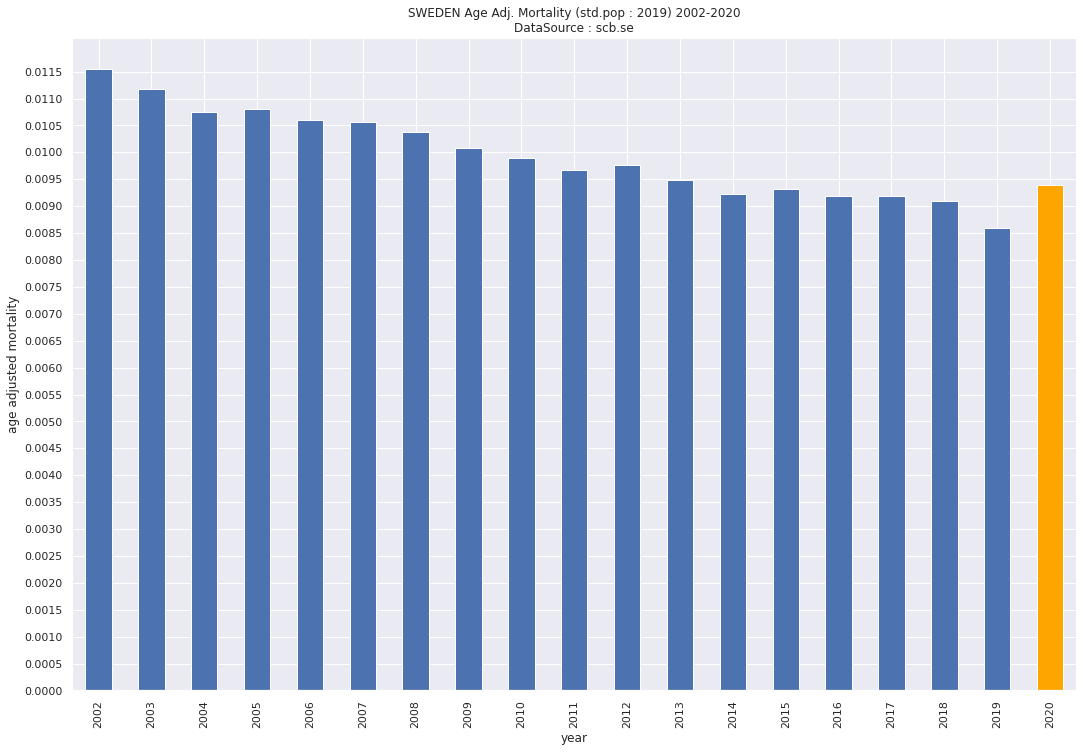

In [231]:
title = 'SWEDEN Age Adj. Mortality (std.pop : 2019) 2002-2020\nDataSource : scb.se'
colors = ['b'] * len (age_adj_mortality)
colors[-1] = 'orange'

age_adj_mortality.plot(kind='bar',figsize=(18,12),color=colors,title=title)
plt.ylabel('age adjusted mortality')
_= plt.yticks(np.arange(0,0.012,0.0005))

plt.savefig('SCB_excess_age_adj_mortality.jpg',format='jpg')

In [232]:
### lets compute non-age-adj mortality ###
no_bins['mortality'] = no_bins['dead'] / no_bins['pop']
no_bins

pop   dead  mortality
year                            
2002   8939367  95009   0.010628
2003   8973472  92961   0.010360
2004   9008883  90532   0.010049
2005   9042663  91710   0.010142
2006   9107935  91177   0.010011
2007   9174464  91729   0.009998
2008   9248976  91449   0.009887
2009   9331619  90080   0.009653
2010   9408320  90487   0.009618
2011   9476105  89938   0.009491
2012   9546448  91938   0.009631
2013   9633589  90402   0.009384
2014   9737559  88976   0.009137
2015   9838418  90907   0.009240
2016   9967637  90982   0.009128
2017  10104036  91972   0.009103
2018  10215309  92185   0.009024
2019  10319473  88766   0.008602
2020  10378483  98124   0.009455

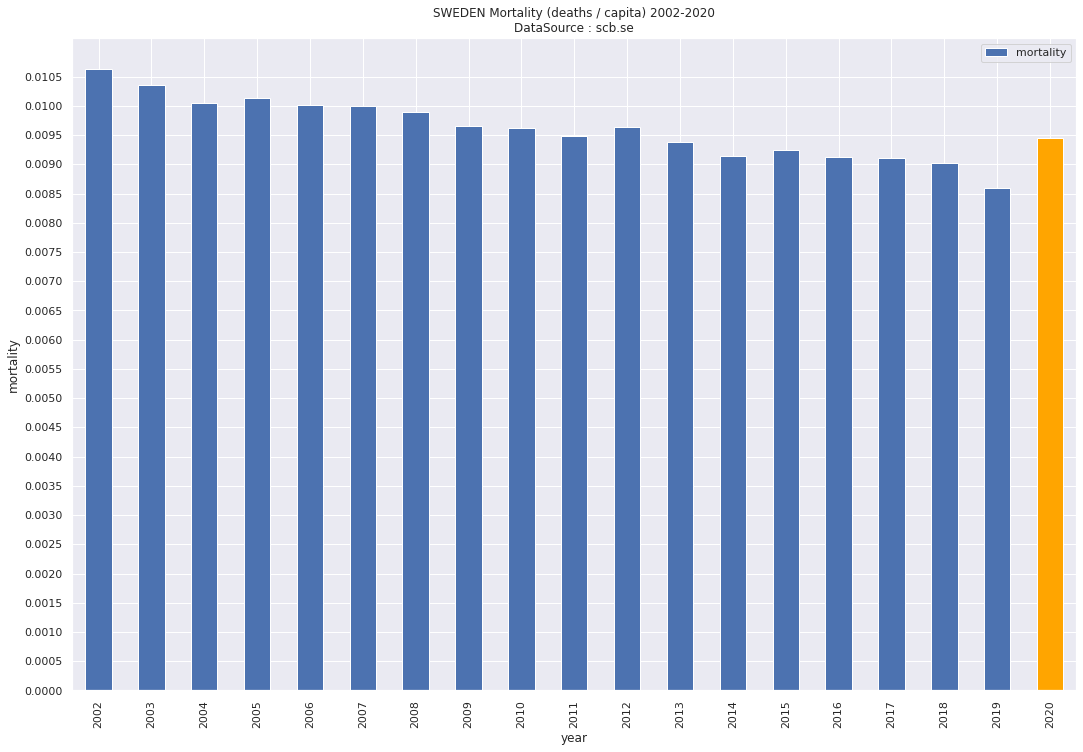

In [233]:
title = 'SWEDEN Mortality (deaths / capita) 2002-2020\nDataSource : scb.se'
colors = ['b'] * len (age_adj_mortality)
colors[-1] = 'orange'

no_bins.plot(y='mortality',kind='bar',figsize=(18,12),color=colors,title=title)
plt.ylabel('mortality')
_= plt.yticks(np.arange(0,0.011,0.0005))
plt.savefig('SCB_excess_mortality.jpg',format='jpg')

In [234]:
### age adj Mortality baselines ###

age_adj_grp_mort_base_15_18 = scb_prel_binned.loc['2015':'2018','mortality'].groupby('scb_prel_age_bin').mean()
age_adj_grp_mort_base_15_19 = scb_prel_binned.loc['2015' :'2019','mortality'].groupby('scb_prel_age_bin').mean()

print ('base_15_18_mortality :',age_adj_grp_mort_base_15_18)
print ()
print ('base_15_19_mortality :',age_adj_grp_mort_base_15_19)

base_15_18_mortality : scb_prel_age_bin
-64      0.001345
65-79    0.017735
80-89    0.075992
90+      0.222988
Name: mortality, dtype: float64

base_15_19_mortality : scb_prel_age_bin
-64      0.001322
65-79    0.017616
80-89    0.074638
90+      0.220437
Name: mortality, dtype: float64


In [235]:
### compute expected age grp deaths given mortality per age group is baseline mortality ###
scb_prel_binned['exp_dead_base_15_18'] = scb_prel_binned['pop'] * age_adj_grp_mort_base_15_18
scb_prel_binned['exp_dead_base_15_19'] = scb_prel_binned['pop'] * age_adj_grp_mort_base_15_19

In [236]:
### compute excess age grp deaths as diff actual age grp deaths - expected age grp deaths ### 
scb_prel_binned['excess_15_18'] = scb_prel_binned['dead'] - scb_prel_binned['exp_dead_base_15_18']
scb_prel_binned['excess_15_19'] = scb_prel_binned['dead'] - scb_prel_binned['exp_dead_base_15_19'] 

scb_prel_binned

pop   dead  mortality    std_deaths  \
year scb_prel_age_bin                                            
2002 -64               7391436  13119   0.001775  14626.151245   
     65-79             1068690  26997   0.025262  38737.331395   
     80-89              407646  37509   0.092014  40667.552869   
     90+                 71595  17384   0.242810  25125.033648   
2003 -64               7418748  13094   0.001765  14544.535841   
...                        ...    ...        ...           ...   
2019 90+                103476  21754   0.210232  21754.000000   
2020 -64               8273794  10455   0.001264  10413.038696   
     65-79             1549655  28795   0.018582  28493.644337   
     80-89              451009  34574   0.076659  33881.307251   
     90+                104025  24300   0.233598  24171.754867   

                       exp_dead_base_15_18  exp_dead_base_15_19  excess_15_18  \
year scb_prel_age_bin                                                           
2002 -64                       9944.606010          9774.530228   3174.393990   
     65-79                    18953.357600         18825.582503   8043.642400   
     80-89                    30977.897726         30425.885423   6531.102274   
     90+                      15964.816766         15782.170066   1419.183234   
2003 -64                       9981.352196          9810.647969   3112.647804   
...                                    ...                  ...           ...   
2019 90+                      23073.893144         22809.914515  -1319.893144   
2020 -64                      11131.750520         10941.371819   -676.750520   
     65-79                    27483.335084         27298.054677   1311.664916   
     80-89                    34273.145513         33662.413366    300.854487   
     90+                      23196.313486         22930.934298   1103.686514   

                       excess_15_19  
year scb_prel_age_bin                
2002 -64                3344.469772  
     65-79              8171.417497  
     80-89              7083.114577  
     90+                1601.829934  
2003 -64                3283.352031  
...                             ...  
2019 90+               -1055.914515  
2020 -64                -486.371819  
     65-79              1496.945323  
     80-89               911.586634  
     90+                1369.065702  

[76 rows x 8 columns]

In [237]:
### compute yearly sums of total excess deaths based on age groups ###
age_grp_based_excess_deaths = scb_prel_binned.groupby('year')[['excess_15_18','excess_15_19']].sum()
age_grp_based_excess_deaths

excess_15_18  excess_15_19
year                            
2002  19168.321898  20200.831780
2003  16339.332617  17382.853677
2004  12923.715810  13980.103041
2005  13445.851641  14511.065135
2006  12088.672854  13163.438516
2007  11854.006058  12935.595441
2008  10585.282835  11676.185685
2009   8043.391028   9143.735164
2010   6486.723211   7604.604993
2011   4379.990978   5510.419023
2012   5365.485834   6503.479548
2013   2797.580107   3942.753480
2014    162.112686   1318.243781
2015   1069.433712   2235.423110
2016    -21.774596   1158.532978
2017    -29.188433   1164.036996
2018  -1065.420784    145.052733
2019  -6177.153341  -4941.722673
2020   2039.455396   3291.225840

In [238]:
### compute non-age-adj baselines ###
mort_15_18_base = no_bins.loc['2015':'2018']['mortality'].mean()
mort_15_19_base = no_bins.loc['2015' : '2019']['mortality'].mean()

print ('non-age-adj-mort_base_15_18 :',mort_15_18_base)
print ()
print ('non-age_adj-mort_base_15_19 :',mort_15_19_base)

non-age-adj-mort_base_15_18 : 0.009123610988730598

non-age_adj-mort_base_15_19 : 0.00901924796048858


In [239]:
### compute expected deaths given these baselines ###
no_bins['exp_dead_base_15_18'] = no_bins['pop'] * mort_15_18_base
no_bins['exp_dead_base_15_19'] = no_bins['pop'] * mort_15_19_base

no_bins

pop   dead  mortality  exp_dead_base_15_18  exp_dead_base_15_19
year                                                                      
2002   8939367  95009   0.010628         81559.306993         80626.367583
2003   8973472  92961   0.010360         81870.467746         80933.969035
2004   9008883  90532   0.010049         82193.543935         81253.349624
2005   9042663  91710   0.010142         82501.739514         81558.019820
2006   9107935  91177   0.010011         83097.255851         82146.724173
2007   9174464  91729   0.009998         83704.240566         82746.765721
2008   9248976  91449   0.009887         84384.059068         83418.807925
2009   9331619  90080   0.009653         85138.061651         84164.185634
2010   9408320  90487   0.009618         85837.851737         84855.970972
2011   9476105  89938   0.009491         86456.295708         85467.340695
2012   9546448  91938   0.009631         87098.077876         86101.781654
2013   9633589  90402   0.009384         87893.118461         86887.727940
2014   9737559  88976   0.009137         88841.700296         87825.459151
2015   9838418  90907   0.009240         89761.898577         88735.131481
2016   9967637  90982   0.009128         90940.842465         89900.589683
2017  10104036  91972   0.009103         92185.293880         91130.806086
2018  10215309  92185   0.009024         93200.505446         92134.404864
2019  10319473  88766   0.008602         94150.857261         93073.885809
2020  10378483  98124   0.009455         94689.241545         93606.111631

In [240]:
### compute excess deaths given the two expectations ###

no_bins['excess_15_18'] = no_bins['dead'] - no_bins['exp_dead_base_15_18']
no_bins['excess_15_19'] = no_bins['dead'] - no_bins['exp_dead_base_15_19']

no_bins

pop   dead  mortality  exp_dead_base_15_18  exp_dead_base_15_19  \
year                                                                         
2002   8939367  95009   0.010628         81559.306993         80626.367583   
2003   8973472  92961   0.010360         81870.467746         80933.969035   
2004   9008883  90532   0.010049         82193.543935         81253.349624   
2005   9042663  91710   0.010142         82501.739514         81558.019820   
2006   9107935  91177   0.010011         83097.255851         82146.724173   
2007   9174464  91729   0.009998         83704.240566         82746.765721   
2008   9248976  91449   0.009887         84384.059068         83418.807925   
2009   9331619  90080   0.009653         85138.061651         84164.185634   
2010   9408320  90487   0.009618         85837.851737         84855.970972   
2011   9476105  89938   0.009491         86456.295708         85467.340695   
2012   9546448  91938   0.009631         87098.077876         86101.781654   
2013   9633589  90402   0.009384         87893.118461         86887.727940   
2014   9737559  88976   0.009137         88841.700296         87825.459151   
2015   9838418  90907   0.009240         89761.898577         88735.131481   
2016   9967637  90982   0.009128         90940.842465         89900.589683   
2017  10104036  91972   0.009103         92185.293880         91130.806086   
2018  10215309  92185   0.009024         93200.505446         92134.404864   
2019  10319473  88766   0.008602         94150.857261         93073.885809   
2020  10378483  98124   0.009455         94689.241545         93606.111631   

      excess_15_18  excess_15_19  
year                              
2002  13449.693007  14382.632417  
2003  11090.532254  12027.030965  
2004   8338.456065   9278.650376  
2005   9208.260486  10151.980180  
2006   8079.744149   9030.275827  
2007   8024.759434   8982.234279  
2008   7064.940932   8030.192075  
2009   4941.938349   5915.814366  
2010   4649.148263   5631.029028  
2011   3481.704292   4470.659305  
2012   4839.922124   5836.218346  
2013   2508.881539   3514.272060  
2014    134.299704   1150.540849  
2015   1145.101423   2171.868519  
2016     41.157535   1081.410317  
2017   -213.293880    841.193914  
2018  -1015.505446     50.595136  
2019  -5384.857261  -4307.885809  
2020   3434.758455   4517.888369

In [241]:
### finally, let's compute the excess for absolute deaths, with the same baseline years ###
abs_base_15_18 = no_bins.loc['2015' : '2018','dead'].mean()
abs_base_15_19 = no_bins.loc['2015' : '2019','dead'].mean()

print ('abs_base_15_18 :',abs_base_15_18)
print ('abs_base_15_19 :',abs_base_15_19)

abs_base_15_18 : 91511.5
abs_base_15_19 : 90962.4


In [242]:
abs_excess = pd.DataFrame({'15_18_base' : no_bins['dead'] - abs_base_15_18,
                          '15_19_base' : no_bins['dead'] - abs_base_15_19})
abs_excess


15_18_base  15_19_base
year                        
2002      3497.5      4046.6
2003      1449.5      1998.6
2004      -979.5      -430.4
2005       198.5       747.6
2006      -334.5       214.6
2007       217.5       766.6
2008       -62.5       486.6
2009     -1431.5      -882.4
2010     -1024.5      -475.4
2011     -1573.5     -1024.4
2012       426.5       975.6
2013     -1109.5      -560.4
2014     -2535.5     -1986.4
2015      -604.5       -55.4
2016      -529.5        19.6
2017       460.5      1009.6
2018       673.5      1222.6
2019     -2745.5     -2196.4
2020      6612.5      7161.6

In [243]:
### summary of excess deaths, computed in different ways, with two different baselines (15-18,15-19) ###

print ('\n2020 excess deaths :\n'.upper())

print ('Absolute excess deaths cmp baseline 15-18 :',abs_excess.loc['2020','15_18_base'].astype(int))
print ('\nAbsolute excess deaths cmp baseline 15-19 :',abs_excess.loc['2020','15_19_base'].astype(int))
print ('\nPopulation adjusted excess deaths cmp baseline 15-18 :',no_bins.loc['2020','excess_15_18'].astype(int))
print ('\nPopulation adjusted excess deaths cmp baseline 15-19 :',no_bins.loc['2020','excess_15_19'].astype(int))

print ('\nAge adjusted excess deaths cmp baseline 15-18 :',
       age_grp_based_excess_deaths.loc['2020','excess_15_18'].astype(int))

print ('\nAge adjusted excess deaths cmp baseline 15-19 :',
       age_grp_based_excess_deaths.loc['2020','excess_15_19'].astype(int))

print ('\n2019 death deficit :\n'.upper())

print ('Absolute death deficit cmp baseline 15-18 :',abs_excess.loc['2019','15_18_base'].astype(int))
print ('\nAbsolute death deficit cmp baseline 15-19 :',abs_excess.loc['2019','15_19_base'].astype(int))
print ('\nPopulation adjusted death deficit cmp baseline 15-18 :',no_bins.loc['2019','excess_15_18'].astype(int))
print ('\nPopulation adjusted death deficit cmp baseline 15-19 :',no_bins.loc['2019','excess_15_19'].astype(int))

print ('\nAge adjusted death deficit cmp baseline 15-18 :',
       age_grp_based_excess_deaths.loc['2019','excess_15_18'].astype(int))

print ('\nAge adjusted death deficit cmp baseline 15-19 :',
       age_grp_based_excess_deaths.loc['2019','excess_15_19'].astype(int))





2020 EXCESS DEATHS :

Absolute excess deaths cmp baseline 15-18 : 6612

Absolute excess deaths cmp baseline 15-19 : 7161

Population adjusted excess deaths cmp baseline 15-18 : 3434

Population adjusted excess deaths cmp baseline 15-19 : 4517

Age adjusted excess deaths cmp baseline 15-18 : 2039

Age adjusted excess deaths cmp baseline 15-19 : 3291

2019 DEATH DEFICIT :

Absolute death deficit cmp baseline 15-18 : -2745

Absolute death deficit cmp baseline 15-19 : -2196

Population adjusted death deficit cmp baseline 15-18 : -5384

Population adjusted death deficit cmp baseline 15-19 : -4307

Age adjusted death deficit cmp baseline 15-18 : -6177

Age adjusted death deficit cmp baseline 15-19 : -4941


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'population')

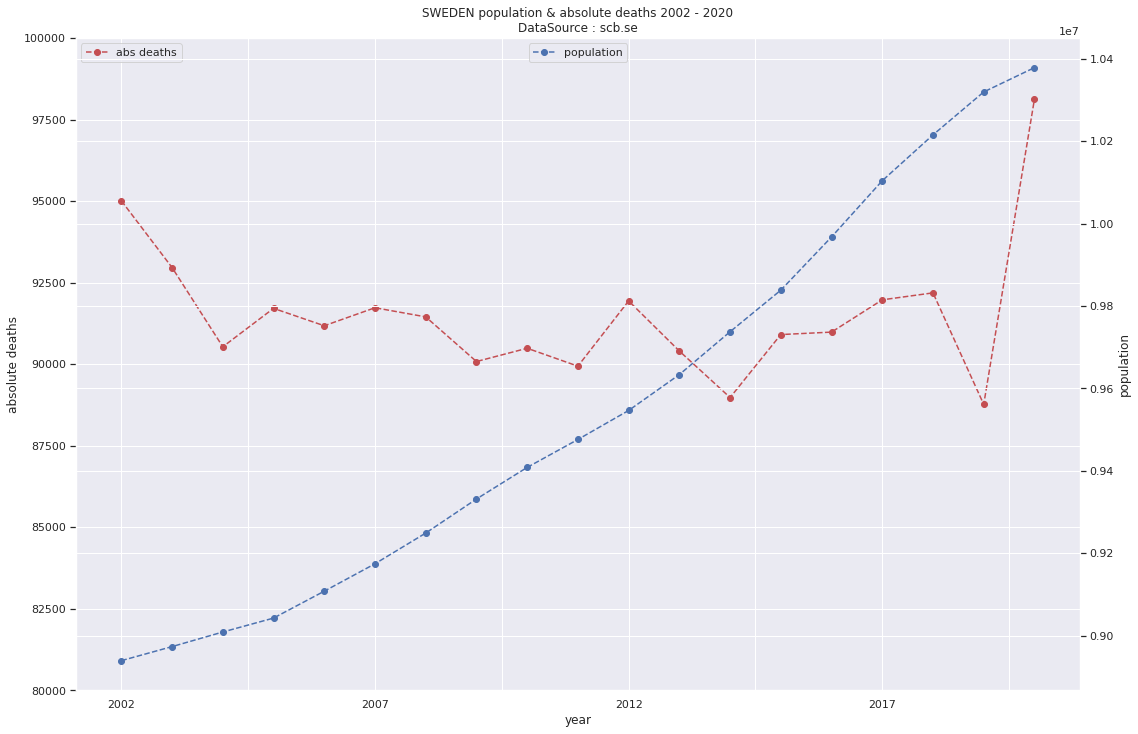

In [244]:
title = 'SWEDEN population & absolute deaths 2002 - 2020\nDataSource : scb.se'
ax = no_bins['dead'].plot(style='ro--',figsize=(18,12),label='abs deaths',title=title)
ax.set_ylim([80000,100000])

ax2 = plt.twinx()

no_bins['pop'].plot(ax=ax2,style='bo--',label='population')

ax.legend(loc='upper left')
ax2.legend(loc='upper center')

ax.set_ylabel('absolute deaths')
ax2.set_ylabel('population')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'population adj. absolute excess deaths')

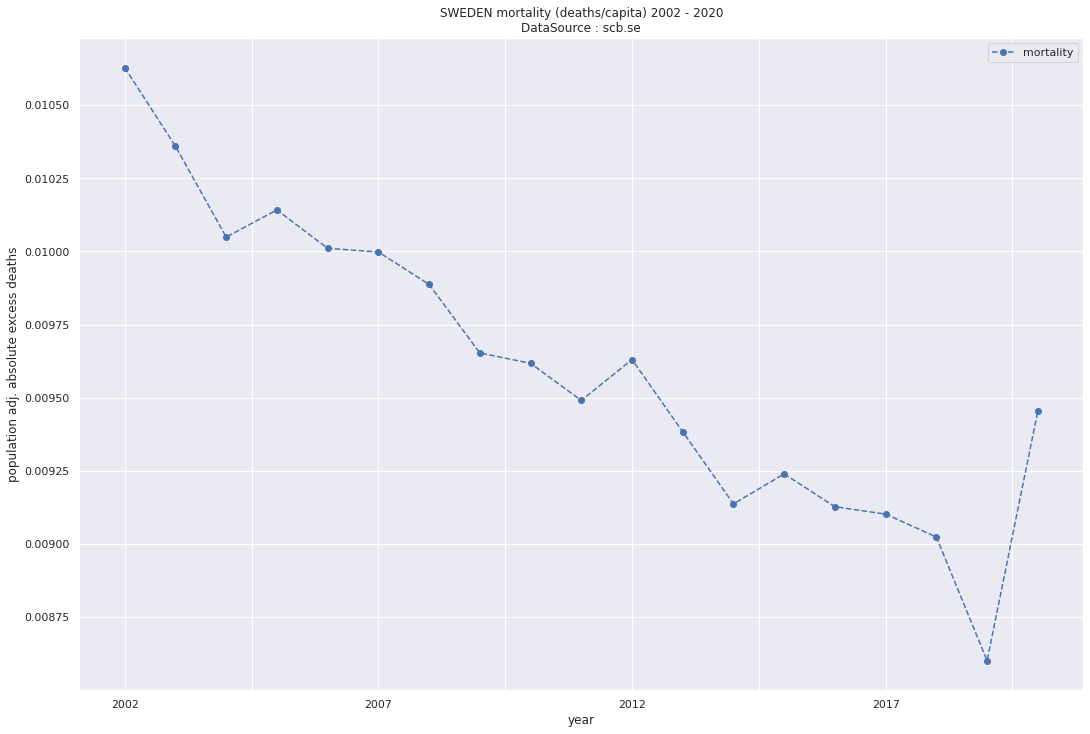

In [245]:
title = 'SWEDEN mortality (deaths/capita) 2002 - 2020\nDataSource : scb.se'
no_bins.plot(y='mortality',figsize=(18,12),style='o--',title=title)
plt.ylabel('population adj. absolute excess deaths')



/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'age adj. mortality')

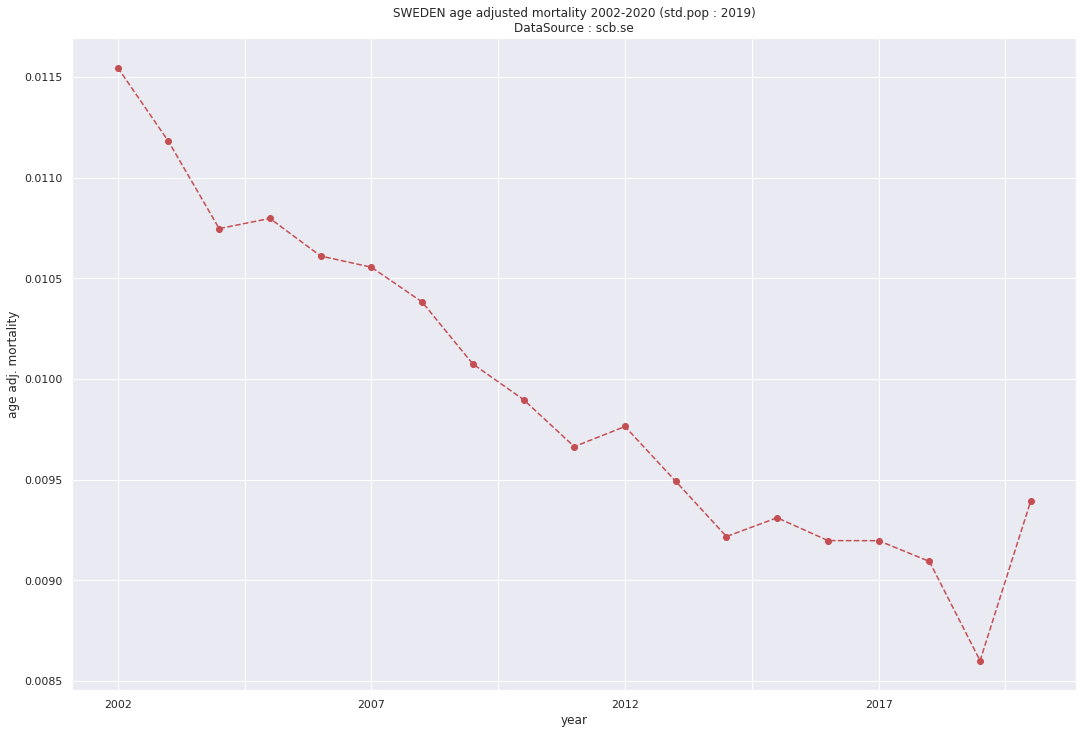

In [246]:
title = 'SWEDEN age adjusted mortality 2002-2020 (std.pop : 2019)\nDataSource : scb.se'
age_adj_mortality.plot(figsize=(18,12),style='ro--',title=title)
plt.ylabel('age adj. mortality')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'absolute excess deaths')

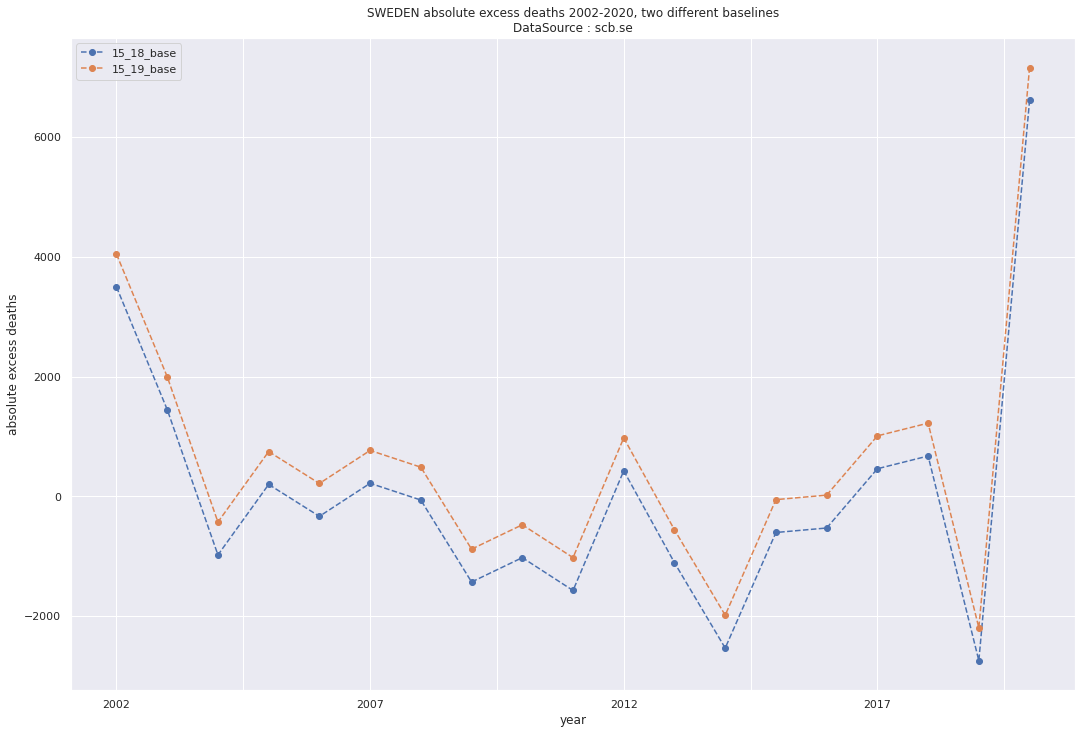

In [247]:
title = 'SWEDEN absolute excess deaths 2002-2020, two different baselines\nDataSource : scb.se'
abs_excess.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('absolute excess deaths')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


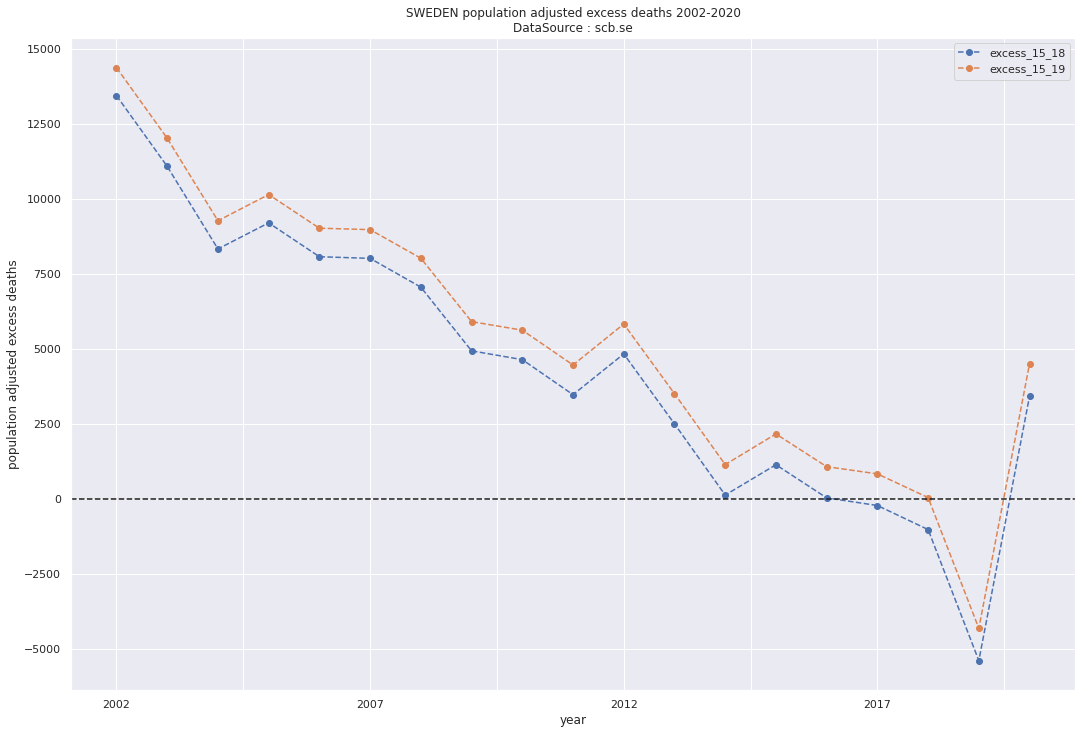

In [248]:
title = 'SWEDEN population adjusted excess deaths 2002-2020\nDataSource : scb.se'
no_bins.plot(y=['excess_15_18','excess_15_19'],style='o--',figsize=(18,12),title=title)
plt.ylabel('population adjusted excess deaths')
plt.axhline(0,ls='dashed',color='k')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


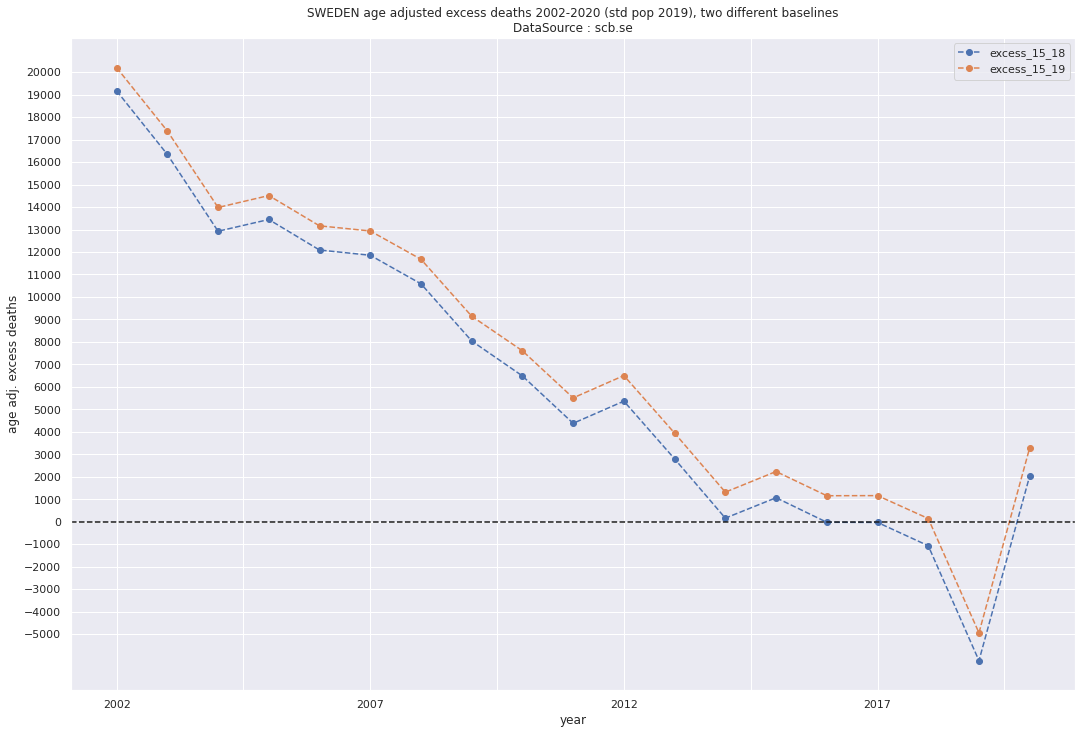

In [249]:
title = 'SWEDEN age adjusted excess deaths 2002-2020 (std pop 2019), two different baselines\nDataSource : scb.se'
age_grp_based_excess_deaths.plot(figsize=(18,12),style='o--',title=title)
plt.ylabel('age adj. excess deaths')
plt.axhline(0,ls='dashed',color='k')
_= plt.yticks(np.arange(-5000,21000,1000))
plt.savefig('SCB_excess_excess_deaths_2002_2020.jpg',format='jpg')

In [250]:
age_mortality_flat = scb_prel_binned['mortality'].unstack()
age_mortality_flat

scb_prel_age_bin     -64       65-79     80-89     90+  
year                                                    
2002              0.001775  0.025262  0.092014  0.242810
2003              0.001765  0.024400  0.089277  0.231547
2004              0.001755  0.023107  0.085865  0.222825
2005              0.001756  0.022879  0.086357  0.229101
2006              0.001738  0.021950  0.085737  0.228341
2007              0.001714  0.021194  0.086511  0.232604
2008              0.001694  0.020333  0.085905  0.232355
2009              0.001649  0.019541  0.084310  0.223789
2010              0.001589  0.019294  0.083360  0.218603
2011              0.001523  0.018544  0.082073  0.217216
2012              0.001487  0.018397  0.083093  0.227864
2013              0.001467  0.017944  0.080028  0.222045
2014              0.001417  0.017553  0.077480  0.215420
2015              0.001393  0.017732  0.078093  0.221373
2016              0.001363  0.017759  0.075700  0.222263
2017              0.001328  0.017585  0.076037  0.226129
2018              0.001298  0.017865  0.074139  0.222186
2019              0.001230  0.017137  0.069221  0.210232
2020              0.001264  0.018582  0.076659  0.233598

In [251]:
### age group mortality growth vs base  15-18 ###
age_mort_growth_vs_base = age_mortality_flat / age_adj_grp_mort_base_15_18
age_mort_growth_vs_base

scb_prel_age_bin     -64       65-79     80-89     90+  
year                                                    
2002              1.319208  1.424391  1.210831  1.088894
2003              1.311846  1.375820  1.174817  1.038383
2004              1.304698  1.302921  1.129923  0.999272
2005              1.305212  1.290019  1.136397  1.027416
2006              1.291817  1.237641  1.128240  1.024008
2007              1.273923  1.195034  1.138425  1.043124
2008              1.258886  1.146456  1.130447  1.042009
2009              1.225490  1.101807  1.109456  1.003592
2010              1.181007  1.087869  1.096959  0.980335
2011              1.131628  1.045609  1.080020  0.974117
2012              1.105058  1.037313  1.093440  1.021868
2013              1.090676  1.011791  1.053115  0.995773
2014              1.053053  0.989741  1.019573  0.966059
2015              1.035174  0.999837  1.027646  0.992760
2016              1.012828  1.001352  0.996152  0.996749
2017              0.987076  0.991507  1.000588  1.014087
2018              0.964923  1.007304  0.975614  0.996405
2019              0.914488  0.966292  0.910902  0.942797
2020              0.939205  1.047726  1.008778  1.047580

In [252]:
### non-age-adj growth vs base 15-18 ###
no_bins['mortality'] / no_bins.loc['2015' : '2019','mortality'].mean()


year
2002    1.178386
2003    1.148603
2004    1.114194
2005    1.124476
2006    1.109929
2007    1.108551
2008    1.096264
2009    1.070289
2010    1.066360
2011    1.052308
2012    1.067783
2013    1.040446
2014    1.013100
2015    1.024476
2016    1.012029
2017    1.009231
2018    1.000549
2019    0.953715
2020    1.048265
Name: mortality, dtype: float64

In [253]:
### abs growth ### 
scb_prel_daily['2020'].sum() / scb_prel_daily['2015-2019'].sum()

1.0764309409720394

In [254]:
#### sanity check ####
(scb_prel_binned.loc['2020','pop'] * scb_prel_binned.loc['2020','mortality']).sum()

98124.0

<ipython-input-255-98d66c9bd995>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[rows[i],i%2].set_xticklabels(x_labels,rotation=90)


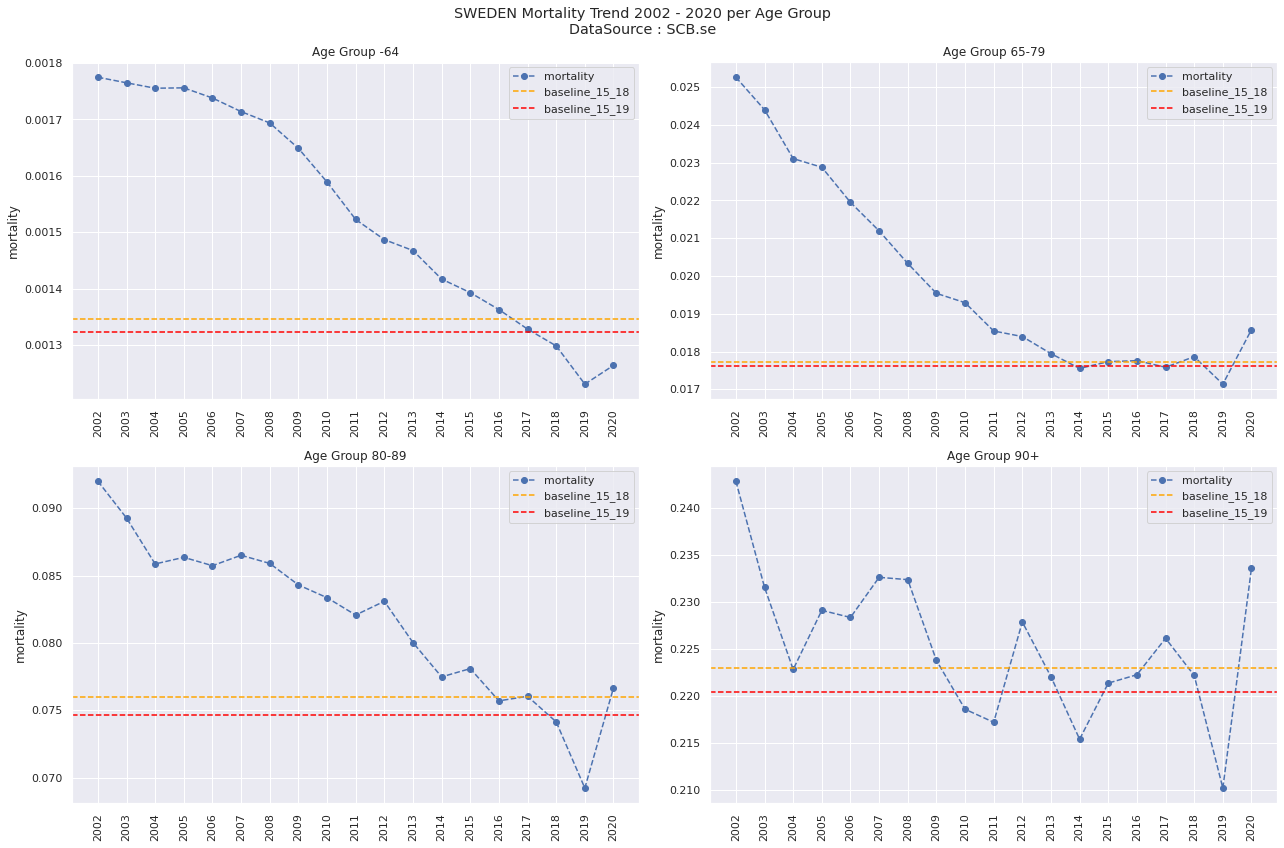

In [255]:
fig,axes = plt.subplots(2,2,figsize=(18,12))

x_labels = [age_mortality_flat.index[i] for i in range(len(age_mortality_flat))]

rows = [0,0,1,1]

plt.suptitle('SWEDEN Mortality Trend 2002 - 2020 per Age Group\nDataSource : SCB.se')

for i,grp in enumerate(age_mortality_flat.columns):
    
    axes[rows[i],i%2].plot(age_mortality_flat[grp],'o--')
    axes[rows[i],i%2].set_title('Age Group {}'.format(grp))
    axes[rows[i],i%2].set_xticklabels(x_labels,rotation=90)
    axes[rows[i],i%2].set_ylabel('mortality')
    
    axes[rows[i],i%2].axhline(age_adj_grp_mort_base_15_18.iloc[i],
                              ls='dashed',color='orange',label='baseline_15_18')
    
    axes[rows[i],i%2].axhline(age_adj_grp_mort_base_15_19.iloc[i],
                              ls='dashed',color='red',label='baseline_15_19')
    
    axes[rows[i],i%2].legend(['mortality','baseline_15_18','baseline_15_19'],loc='upper right')
    
plt.tight_layout()
plt.savefig('Age_grp_mortality_trends.jpg',format='jpg')

In [256]:
excess_vals = [abs_excess.loc['2020'].values,
 no_bins.loc['2020',['excess_15_18','excess_15_19']].values,
 age_grp_based_excess_deaths.loc['2020',['excess_15_18','excess_15_19']].values ]

excess = pd.DataFrame(excess_vals)
excess.columns = ['excess_rel_baseline_2015_2018','excess_rel_baseline_2015_2019']
excess.index = ['abs_deaths','pop_adj_deaths','age_adj_deaths']
excess = excess.astype(int)
excess

excess_rel_baseline_2015_2018  excess_rel_baseline_2015_2019
abs_deaths                               6612                           7161
pop_adj_deaths                           3434                           4517
age_adj_deaths                           2039                           3291

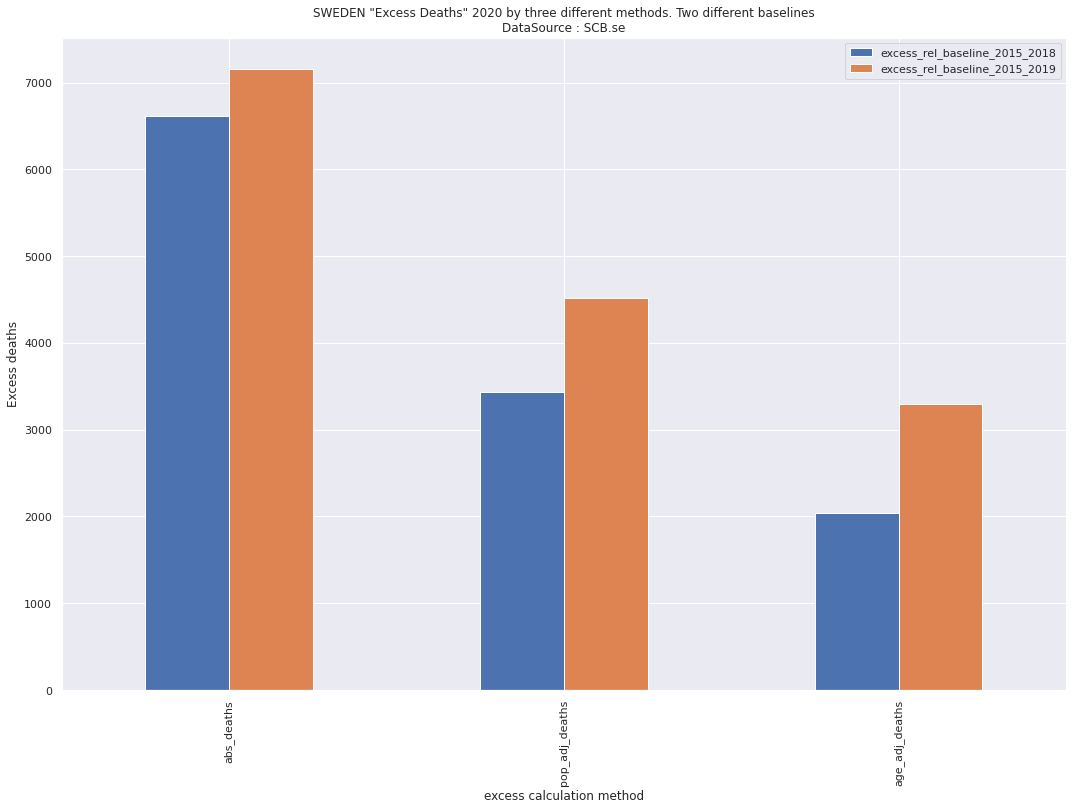

In [257]:
title = 'SWEDEN "Excess Deaths" 2020 by three different methods. Two different baselines\nDataSource : SCB.se'
excess.plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('Excess deaths')
plt.xlabel('excess calculation method')

plt.savefig('SCB_excess_excess_deaths.jpg',format='jpg')

In [258]:
#### let's do one for seasonal deaths as well ####
### SECTION ###
scb_prel_daily

2015     2016     2017     2018     2019     2020     2021 2015-2019  \
0    298.149  250.403  347.424  282.707   309.11  261.086   328.99   297.512   
1    274.903  277.998  324.877  320.744  284.381  310.425  365.886   296.488   
2    283.999  299.461  317.703  303.267  279.229  263.141  347.438   296.693   
3    258.732  265.733  312.579  292.987  290.563  280.616  313.616   284.007   
4     270.86  265.733  311.554  299.155  283.351  272.392  360.761   286.053   
..       ...      ...      ...      ...      ...      ...      ...       ...   
361  229.423  254.491  277.734  246.726  245.227  359.764        0   250.654   
362  276.924  267.777  279.784  268.314  221.529  388.545        0   262.931   
363  295.117  280.042  282.858   270.37  251.409  323.787        0   276.027   
364   286.02   313.77  281.833  238.502  232.863  333.038        0   270.707   
365  257.722  295.373  309.504   265.23   253.47  349.485        0   276.231   

    2016-2020  
0     290.114  
1     303.665  
2     292.577  
3     288.471  
4     286.418  
..        ...  
361   276.768  
362   285.186  
363   281.696  
364   280.053  
365   294.631  

[366 rows x 9 columns]

In [259]:
### find out the last reported day of 2021, and define last_good_day ###

days_of_2021 = len(scb_prel_daily['2021'].loc[scb_prel_daily['2021'] != 0 ])
last_data_day = pd.date_range('2021-01-01',periods=days_of_2021)[-1]
last_good_day = last_data_day - pd.DateOffset(weeks=2)
last_good_day

Timestamp('2021-02-05 00:00:00')

In [260]:
#### leap_day_idx : 60:th day of year in the prel datafame ####
leap_day_idx = 59
leap_year_mask = scb_prel_daily.iloc[leap_day_idx] != 0
leap_years = scb_prel_daily.columns[leap_year_mask][:-2].values
leap_years


array(['2016', '2020'], dtype=object)

In [261]:
#### serialize the dataframe by years ####

serialized_daily_15_21 = []

for c in scb_prel_daily.columns[:-2]:
    if c not in leap_years:
        scb_prel_daily[c].drop(leap_day_idx,inplace=True) # drop the leap day for non-leap years #
        
    serialized_daily_15_21.extend(scb_prel_daily[c])

serialized_daily_15_21 = pd.DataFrame(serialized_daily_15_21)
serialized_daily_15_21.columns = ['dead']

In [262]:
#### since scb_prel_daily has 366 days for each year, even those without leap days, ####
#### we can't do a straight datetimeindex for 2015-2021 using pd.date_range(). ####
#### Instead, we build it up year-by-year #### 

def build_multi_year_idx(start_year,end_year):
    
    serialized_idx = list(pd.date_range(str(start_year) + '-01-01',str(start_year) + '-12-31'))
    
    for y in range(start_year + 1,end_year + 1):
        serialized_idx.extend(list(pd.date_range(str(y) + '-01-01',str(y) + '-12-31')))
    return serialized_idx
        
serialized_idx = pd.DatetimeIndex(build_multi_year_idx(2015,2021))
serialized_idx

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=2557, freq=None)

In [263]:
### assume population 2021 initially is same as 2020 ###
pop_df.at['2021','pop'] = pop_df.loc['2020','pop']


In [264]:
#### add year,month,day explicit for convenience ####
#### compute daily mortality ####

serialized_daily_15_21.index = serialized_idx

### skip the last two weeks of data ###
serialized_daily_stable = serialized_daily_15_21.loc[:last_good_day].copy()
serialized_daily_stable['year'] = serialized_daily_stable.index.year.astype(str)

serialized_daily_stable['month'] = serialized_daily_stable.index.month
serialized_daily_stable['day'] = serialized_daily_stable.index.day

serialized_daily_stable['daily_mortality'] = serialized_daily_stable.apply(
    lambda row : row.dead / pop_df.loc[row.year,'pop'],axis=1)

serialized_daily_stable

dead  year  month  day  daily_mortality
2015-01-01  298.148521  2015      1    1         0.000030
2015-01-02  274.903043  2015      1    2         0.000028
2015-01-03  283.999099  2015      1    3         0.000029
2015-01-04  258.732276  2015      1    4         0.000026
2015-01-05  270.860351  2015      1    5         0.000028
...                ...   ...    ...  ...              ...
2021-02-01  276.720264  2021      2    1         0.000027
2021-02-02  259.297137  2021      2    2         0.000025
2021-02-03  261.346916  2021      2    3         0.000025
2021-02-04  278.770044  2021      2    4         0.000027
2021-02-05  241.874009  2021      2    5         0.000023

[2228 rows x 5 columns]

In [265]:
#### define season e.g. as starting from oct 1:st to sep last ####

season_start = 10 # month number
season_end = 9

#### this drops the first season of the first year (2015) from the data ####

def seasonal(df,start_year,next_year):
    first_part = df.loc[(df['month'] >= season_start) & (df['year'] == start_year)]
    second_part = df.loc[(df['month'] <= season_end) & (df['year'] == next_year)]
    
    return pd.concat([first_part,second_part])



In [266]:
#### collect the different seasons into a single df ####
all_seasons_df = pd.DataFrame()

years = scb_prel_daily.columns.values

for y in range(len(years[:-2]) - 1):
    season_df = pd.DataFrame(seasonal(serialized_daily_stable,years[y],years[y+1]))
    season_df['season'] = years[y] + '/' + years[y+1]
    all_seasons_df = pd.concat([all_seasons_df,season_df])
    
all_seasons_df

dead  year  month  day  daily_mortality     season
2015-10-01  234.476125  2015     10    1         0.000024  2015/2016
2015-10-02  250.646892  2015     10    2         0.000025  2015/2016
2015-10-03  239.529490  2015     10    3         0.000024  2015/2016
2015-10-04  216.284012  2015     10    4         0.000022  2015/2016
2015-10-05  207.187955  2015     10    5         0.000021  2015/2016
...                ...   ...    ...  ...              ...        ...
2021-02-01  276.720264  2021      2    1         0.000027  2020/2021
2021-02-02  259.297137  2021      2    2         0.000025  2020/2021
2021-02-03  261.346916  2021      2    3         0.000025  2020/2021
2021-02-04  278.770044  2021      2    4         0.000027  2020/2021
2021-02-05  241.874009  2021      2    5         0.000023  2020/2021

[1955 rows x 6 columns]

In [267]:
all_seasons_df.loc[all_seasons_df['season'] == '2016/2017']

dead  year  month  day  daily_mortality     season
2016-10-01  248.358508  2016     10    1         0.000025  2016/2017
2016-10-02  220.763118  2016     10    2         0.000022  2016/2017
2016-10-03  223.829272  2016     10    3         0.000022  2016/2017
2016-10-04  236.093890  2016     10    4         0.000024  2016/2017
2016-10-05  238.137993  2016     10    5         0.000024  2016/2017
...                ...   ...    ...  ...              ...        ...
2017-09-26  216.243141  2017      9   26         0.000021  2016/2017
2017-09-27  230.591028  2017      9   27         0.000023  2016/2017
2017-09-28  215.218292  2017      9   28         0.000021  2016/2017
2017-09-29  241.864367  2017      9   29         0.000024  2016/2017
2017-09-30  226.491632  2017      9   30         0.000022  2016/2017

[365 rows x 6 columns]

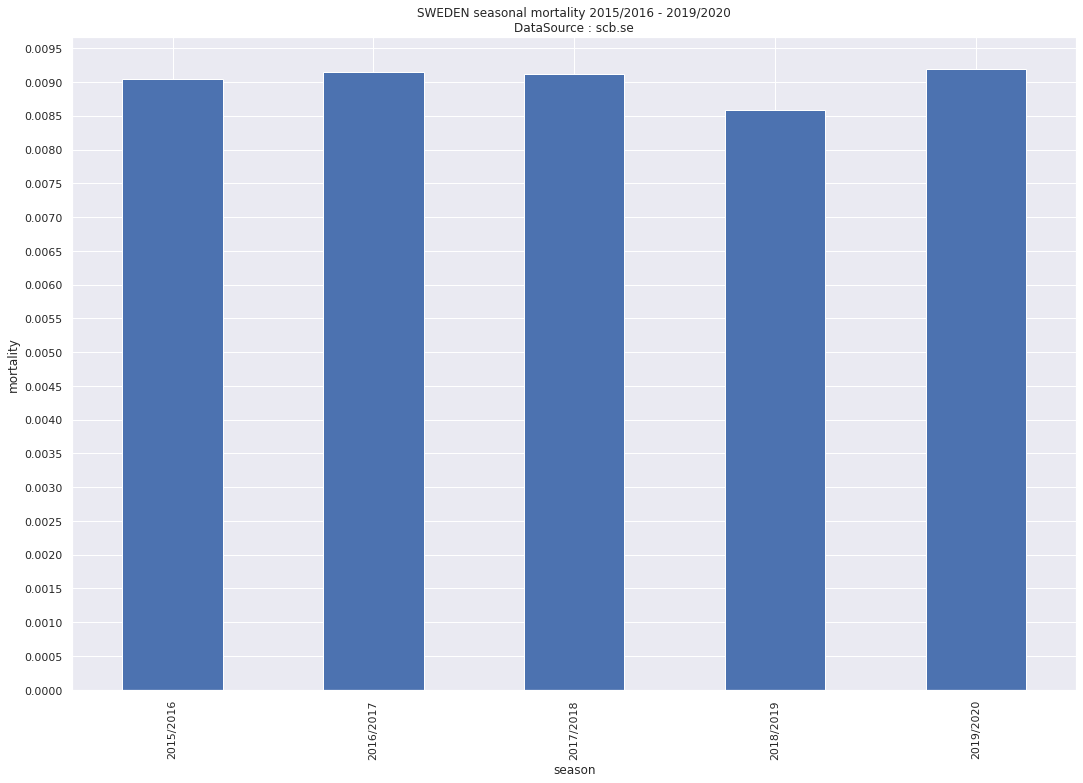

In [268]:
title = 'SWEDEN seasonal mortality 2015/2016 - 2019/2020\nDataSource : scb.se'
seasonal_mortality = all_seasons_df.groupby('season')['daily_mortality'].sum()
seasonal_mortality[:-1].plot(figsize=(18,12),kind='bar',title=title)
plt.yticks(np.arange(0,0.01,0.0005))
plt.ylabel('mortality')
plt.savefig('seasonal_deaths.jpg',format='jpg')


2015-01-31     8729.182285
2015-02-28     8153.098703
2015-03-31     8710.990172
2015-04-30     7776.117692
2015-05-31     7389.029951
                  ...     
2020-09-30     6773.836017
2020-10-31     7256.947235
2020-11-30     8245.783388
2020-12-31    10235.790448
2021-01-31    10093.115419
Freq: M, Name: dead, Length: 73, dtype: float64

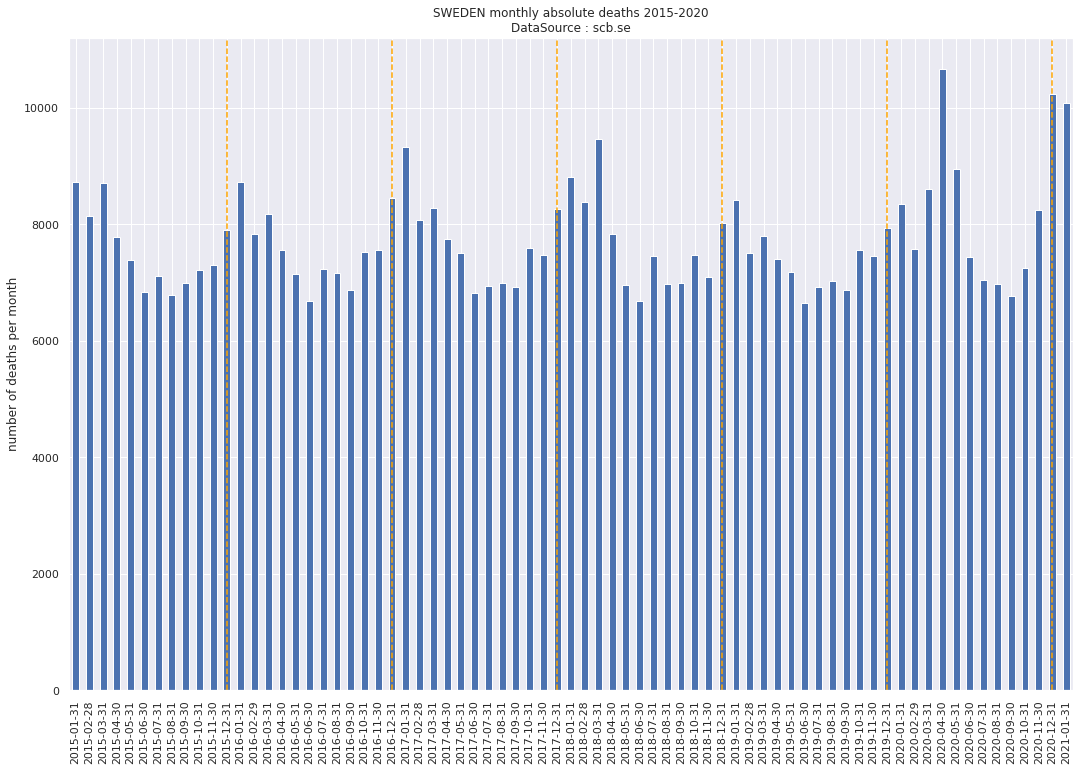

In [269]:
title = 'SWEDEN monthly absolute deaths 2015-2020\nDataSource : scb.se'
monthly_dead = serialized_daily_stable.resample('M')['dead'].sum()[:-1]
monthly_dead.plot(kind='bar',figsize=(18,12),style='o--',title=title)
x_labels = [ monthly_dead.index[i].date() for i in range(len(monthly_dead))]
plt.xticks(range(len(monthly_dead)),x_labels)
[ plt.axvline(11 + i * 12,color='orange',ls='dashed') for i in range(0,6) ]

plt.ylabel('number of deaths per month')
monthly_dead

2015-01-31    0.000887
2015-02-28    0.000829
2015-03-31    0.000885
2015-04-30    0.000790
2015-05-31    0.000751
                ...   
2020-09-30    0.000653
2020-10-31    0.000699
2020-11-30    0.000795
2020-12-31    0.000986
2021-01-31    0.000973
Freq: M, Name: daily_mortality, Length: 73, dtype: float64

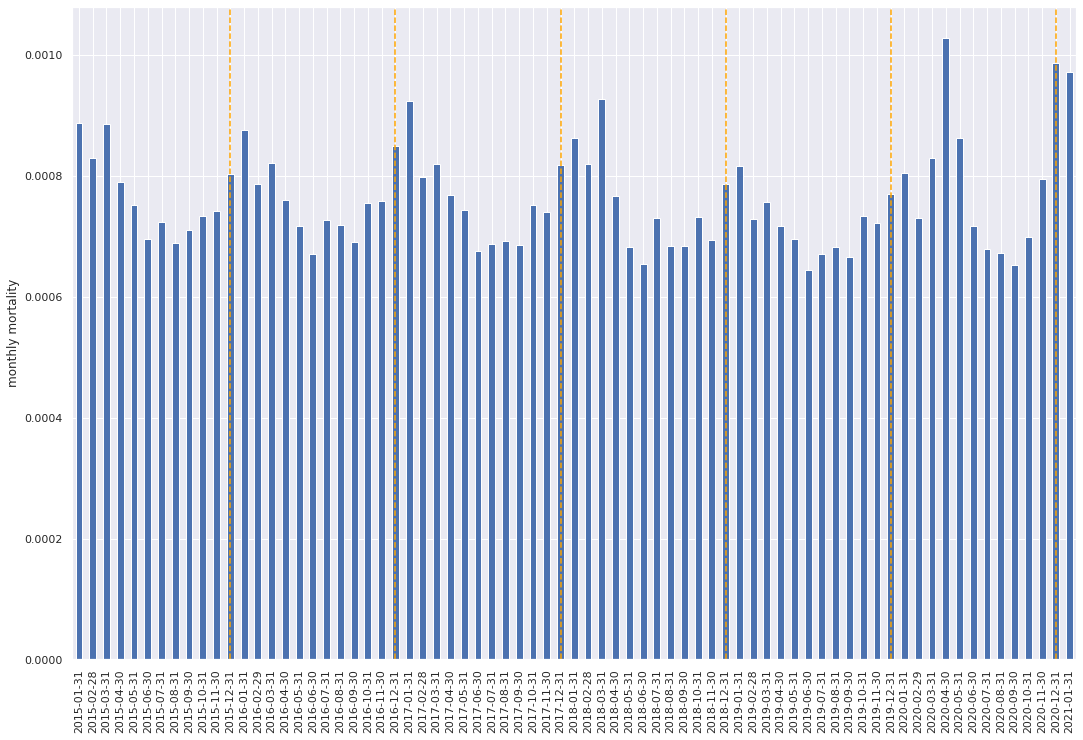

In [270]:
title = 'SWEDEN monthly mortality 2015 - 2020\nDataSource : scb.se'
monthly_mortality = serialized_daily_stable.resample('M')['daily_mortality'].sum()[:-1]
monthly_mortality.plot(kind='bar',figsize=(18,12))
plt.xticks(range(len(monthly_mortality)),x_labels)
plt.ylabel('monthly mortality')
[ plt.axvline(11 + i * 12,color='orange',ls='dashed') for i in range(0,6) ]
monthly_mortality

In [271]:
#### summaries for Prof. Levitt #### 

summary_age_adj_flat = scb_prel_binned.reset_index().groupby('year')[['pop','dead','std_deaths',
                                               'exp_dead_base_15_18','exp_dead_base_15_19',
                                               'excess_15_18','excess_15_19']].sum()

summary_age_adj_flat.to_excel('scb_yearly_age_adjusted_deaths_summary.xlsx')
scb_prel_binned.to_excel('scb_age_binned_data_2002_2020.xlsx')

In [272]:
### cmp mortality vs age adj. mortality std.pop 2019 ###

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


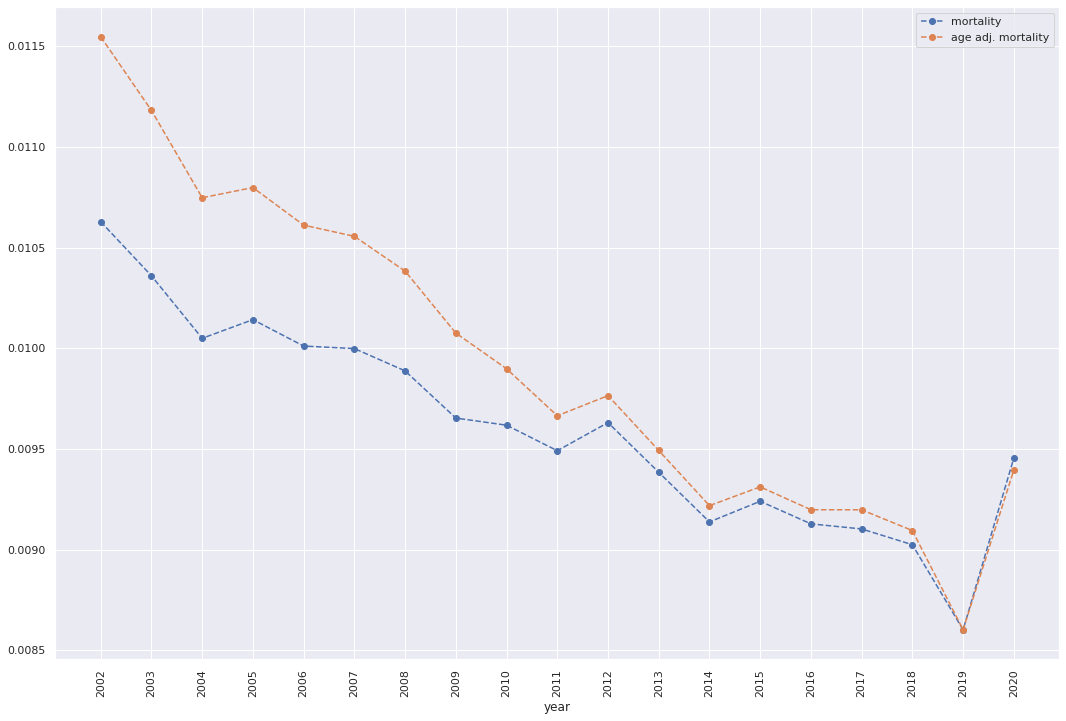

In [273]:
ax = no_bins.plot(y='mortality',figsize=(18,12),style='o--')
age_adj_mortality.plot(ax=ax,style='o--')

x_labels = [ no_bins.index[i] for i in range(len(no_bins)) ]
ax.set_xticks(range(len(no_bins)))
_= ax.set_xticklabels(labels=x_labels,rotation=90)
ax.legend(['mortality','age adj. mortality'])


In [274]:
##### NEXT - AGE BINNED CORRECTED DAILY TIMELINE 2015-2021 ytd #####
##### NOTE the scb data error notice on top of this notebook ####

In [275]:
#### create a corrected age binned timeline 2015 and forward ####
#### all data inc. 2021 YTD #####

### get the age group binned prel death data again ###
scb_prel_age_TD = scb_prel_file.parse('Tabell 2',skiprows=7,usecols=[0,1,4,5,6,7,9,10,11,12])

# scb_prel_age_TD = scb_prel_age_TD[::-1] # reverse order
# scb_prel_age_TD.drop(['År','DagMånad'],axis=1,inplace=True)

scb_prel_age_TD

År        DagMånad  M 0-64 år  M 65-79 år  M 80-89 år  M 90+ år  \
0     2021     19 februari          1           5           2         3   
1     2021     18 februari          1           5           5         5   
2     2021     17 februari          4           9          14         5   
3     2021     16 februari          9          23          14         9   
4     2021     15 februari          6          32          36        14   
...    ...             ...        ...         ...         ...       ...   
2244  2019  Okänd dödsdag         732         771         242        41   
2245  2018  Okänd dödsdag         698         752         249        46   
2246  2017  Okänd dödsdag         645         620         198        49   
2247  2016  Okänd dödsdag         582         572         162        34   
2248  2015  Okänd dödsdag         307         280          81        22   

      K 0-64 år  K 65-79 år  K 80-89 år  K 90+ år  
0             0           1           0         5  
1             1           6           6        10  
2             2           8          10        10  
3             5          14          20         8  
4             5          16          26        29  
...         ...         ...         ...       ...  
2244        259         338         175        58  
2245        217         315         175        61  
2246        213         276         168        61  
2247        169         244         153        47  
2248         81         112          56        21  

[2249 rows x 10 columns]

In [276]:
#### unknowns ####
unknowns_TD = scb_prel_age_TD.loc[scb_prel_age_TD['DagMånad'].str.strip() == 'Okänd dödsdag']
unknowns_TD = unknowns_TD.drop('DagMånad',axis=1).set_index('År')

scb_prel_age_TD = (scb_prel_age_TD[scb_prel_age_TD['DagMånad'].str.strip() != 'Okänd dödsdag']).copy()

scb_prel_age_TD

År     DagMånad  M 0-64 år  M 65-79 år  M 80-89 år  M 90+ år  \
0     2021  19 februari          1           5           2         3   
1     2021  18 februari          1           5           5         5   
2     2021  17 februari          4           9          14         5   
3     2021  16 februari          9          23          14         9   
4     2021  15 februari          6          32          36        14   
...    ...          ...        ...         ...         ...       ...   
2237  2015    5 januari          8          44          34        28   
2238  2015    4 januari         16          31          40        22   
2239  2015    3 januari         24          48          49        25   
2240  2015    2 januari         16          49          63        25   
2241  2015    1 januari         25          35          48        33   

      K 0-64 år  K 65-79 år  K 80-89 år  K 90+ år  
0             0           1           0         5  
1             1           6           6        10  
2             2           8          10        10  
3             5          14          20         8  
4             5          16          26        29  
...         ...         ...         ...       ...  
2237         16          34          56        48  
2238          6          26          61        54  
2239         16          32          37        50  
2240          7          26          48        38  
2241         12          41          53        48  

[2242 rows x 10 columns]

In [277]:
#### map swedish month names to month numbers ####
swe_2_eng_month = dict(zip(['januari','februari','mars','april','maj','juni',
                           'juli','augusti','september','oktober','november','december'],
                          list(range(1,13))))
    
scb_prel_age_TD[['day','month']] = scb_prel_age_TD['DagMånad'].str.split(expand=True)
scb_prel_age_TD['month'] = scb_prel_age_TD['month'].apply(lambda m : swe_2_eng_month[m])
scb_prel_age_TD = scb_prel_age_TD.drop('DagMånad',axis=1)
scb_prel_age_TD.rename(columns={'År':'year'},inplace=True)

scb_prel_age_TD

year  M 0-64 år  M 65-79 år  M 80-89 år  M 90+ år  K 0-64 år  \
0     2021          1           5           2         3          0   
1     2021          1           5           5         5          1   
2     2021          4           9          14         5          2   
3     2021          9          23          14         9          5   
4     2021          6          32          36        14          5   
...    ...        ...         ...         ...       ...        ...   
2237  2015          8          44          34        28         16   
2238  2015         16          31          40        22          6   
2239  2015         24          48          49        25         16   
2240  2015         16          49          63        25          7   
2241  2015         25          35          48        33         12   

      K 65-79 år  K 80-89 år  K 90+ år day  month  
0              1           0         5  19      2  
1              6           6        10  18      2  
2              8          10        10  17      2  
3             14          20         8  16      2  
4             16          26        29  15      2  
...          ...         ...       ...  ..    ...  
2237          34          56        48   5      1  
2238          26          61        54   4      1  
2239          32          37        50   3      1  
2240          26          48        38   2      1  
2241          41          53        48   1      1  

[2242 rows x 11 columns]

In [278]:
#### create DatetimeIndex ####
scb_prel_age_TD['date'] = pd.to_datetime(scb_prel_age_TD[['year','month','day']])
scb_prel_age_TD = scb_prel_age_TD.drop(['year','day','month'],axis=1).set_index('date')
scb_prel_age_TD

M 0-64 år  M 65-79 år  M 80-89 år  M 90+ år  K 0-64 år  \
date                                                                 
2021-02-19          1           5           2         3          0   
2021-02-18          1           5           5         5          1   
2021-02-17          4           9          14         5          2   
2021-02-16          9          23          14         9          5   
2021-02-15          6          32          36        14          5   
...               ...         ...         ...       ...        ...   
2015-01-05          8          44          34        28         16   
2015-01-04         16          31          40        22          6   
2015-01-03         24          48          49        25         16   
2015-01-02         16          49          63        25          7   
2015-01-01         25          35          48        33         12   

            K 65-79 år  K 80-89 år  K 90+ år  
date                                          
2021-02-19           1           0         5  
2021-02-18           6           6        10  
2021-02-17           8          10        10  
2021-02-16          14          20         8  
2021-02-15          16          26        29  
...                ...         ...       ...  
2015-01-05          34          56        48  
2015-01-04          26          61        54  
2015-01-03          32          37        50  
2015-01-02          26          48        38  
2015-01-01          41          53        48  

[2242 rows x 8 columns]

In [279]:
#### reverse order ####
scb_prel_age_TD = scb_prel_age_TD[::-1]
scb_prel_age_TD

M 0-64 år  M 65-79 år  M 80-89 år  M 90+ år  K 0-64 år  \
date                                                                 
2015-01-01         25          35          48        33         12   
2015-01-02         16          49          63        25          7   
2015-01-03         24          48          49        25         16   
2015-01-04         16          31          40        22          6   
2015-01-05          8          44          34        28         16   
...               ...         ...         ...       ...        ...   
2021-02-15          6          32          36        14          5   
2021-02-16          9          23          14         9          5   
2021-02-17          4           9          14         5          2   
2021-02-18          1           5           5         5          1   
2021-02-19          1           5           2         3          0   

            K 65-79 år  K 80-89 år  K 90+ år  
date                                          
2015-01-01          41          53        48  
2015-01-02          26          48        38  
2015-01-03          32          37        50  
2015-01-04          26          61        54  
2015-01-05          34          56        48  
...                ...         ...       ...  
2021-02-15          16          26        29  
2021-02-16          14          20         8  
2021-02-17           8          10        10  
2021-02-18           6           6        10  
2021-02-19           1           0         5  

[2242 rows x 8 columns]

In [280]:
#### combine both genders to single death count ####
scb_prel_age_TD = scb_prel_age_TD.groupby(combine_ages,axis=1).sum()


In [281]:
scb_prel_age_TD

-64  65-79  80-89  90+
date                              
2015-01-01   37     76    101   81
2015-01-02   23     75    111   63
2015-01-03   40     80     86   75
2015-01-04   22     57    101   76
2015-01-05   24     78     90   76
...         ...    ...    ...  ...
2021-02-15   11     48     62   43
2021-02-16   14     37     34   17
2021-02-17    6     17     24   15
2021-02-18    2     11     11   15
2021-02-19    1      6      2    8

[2242 rows x 4 columns]

In [282]:
scb_prel_age_TD.groupby(scb_prel_age_TD.index.year).sum()

-64  65-79  80-89    90+
date                            
2015  10584  25316  31923  22124
2016  10119  25366  31116  22418
2017   9878  25444  31622  22798
2018   9687  26049  31376  22560
2019   9148  25170  30177  21655
2020   9493  27628  34163  24177
2021   1194   3870   4981   3575

In [283]:
dead_age_scb_prel_df.loc['2015']

dead
scb_prel_age_bin       
-64               10972
65-79             25708
80-89             32060
90+               22167

In [284]:
#### combine genders for unknown death dates ####
unknowns_TD = unknowns_TD.groupby(combine_ages,axis=1).sum()
unknowns_TD

-64  65-79  80-89  90+
År                          
2021  128    146     49   16
2020  962   1167    411  123
2019  991   1109    417   99
2018  915   1067    424  107
2017  858    896    366  110
2016  751    816    315   81
2015  388    392    137   43

In [285]:
unknowns_TD

-64  65-79  80-89  90+
År                          
2021  128    146     49   16
2020  962   1167    411  123
2019  991   1109    417   99
2018  915   1067    424  107
2017  858    896    366  110
2016  751    816    315   81
2015  388    392    137   43

In [286]:
unknowns_TD.loc[2020]

-64       962
65-79    1167
80-89     411
90+       123
Name: 2020, dtype: int64

In [287]:
#### get the deaths with known dates from the timeline ####
knowns_TD = scb_prel_age_TD.groupby(
    scb_prel_age_TD.index.get_level_values(0).year)[['-64','65-79','80-89','90+']].sum()

knowns_TD

-64  65-79  80-89    90+
date                            
2015  10584  25316  31923  22124
2016  10119  25366  31116  22418
2017   9878  25444  31622  22798
2018   9687  26049  31376  22560
2019   9148  25170  30177  21655
2020   9493  27628  34163  24177
2021   1194   3870   4981   3575

In [288]:
unknowns_TD + knowns_TD

-64  65-79  80-89    90+
2015  10972  25708  32060  22167
2016  10870  26182  31431  22499
2017  10736  26340  31988  22908
2018  10602  27116  31800  22667
2019  10139  26279  30594  21754
2020  10455  28795  34574  24300
2021   1322   4016   5030   3591

In [289]:
### compute daily proportion of all known deaths ###
###

def calc_daily_proportion(dead):
    return dead / dead.sum() 

prop_age_TD = scb_prel_age_TD.groupby(
    scb_prel_age_TD.index.get_level_values(0).year).transform(calc_daily_proportion)


### create groups by year ###
g = prop_age_TD.groupby(prop_age_TD.index.get_level_values(0).year)

### df to store all corrected daily data for all years ###
grp_daily_corrected = pd.DataFrame()

### for each year, multiply the daily proportions with the unknowns and add the knowns ###
for grp in g.groups.keys():
    
    foo = g.get_group(grp) * unknowns_TD.loc[grp] + scb_prel_age_TD.loc[str(grp)]
    grp_daily_corrected = pd.concat([grp_daily_corrected,foo])
    


In [290]:
### check that yearly totals are still correct ###
grp_daily_corrected.groupby(grp_daily_corrected.index.get_level_values(0).year).sum().sum(axis=1)

date
2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    98124.0
2021    13959.0
dtype: float64

<AxesSubplot:xlabel='date'>

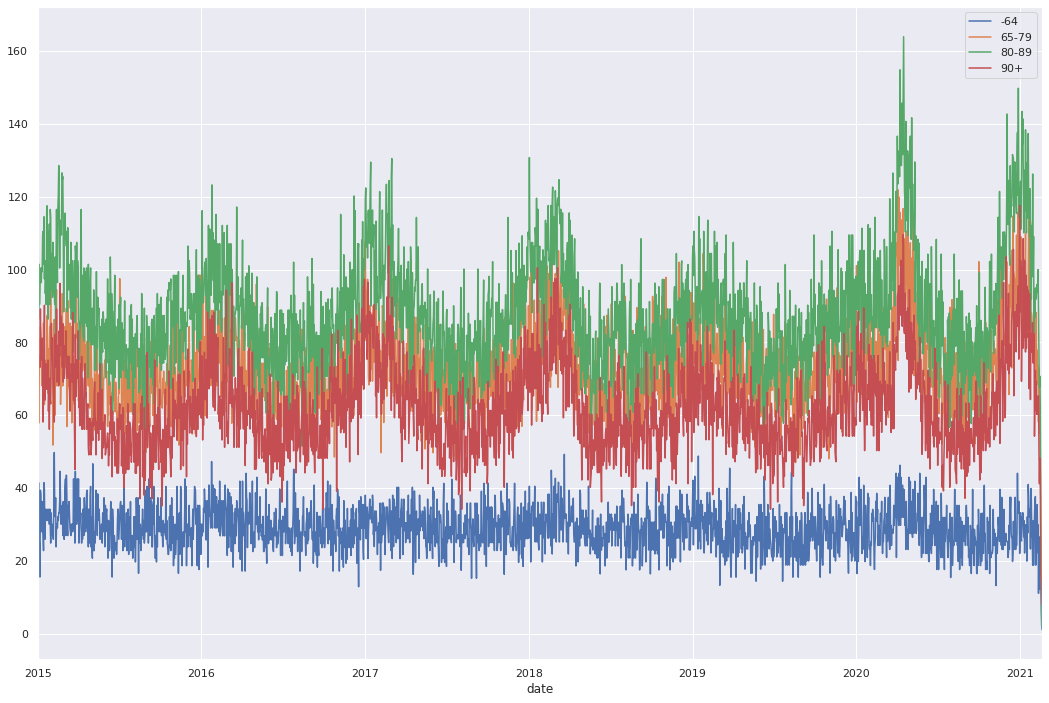

In [291]:
grp_daily_corrected.plot(figsize=(18,12))

<AxesSubplot:xlabel='date'>

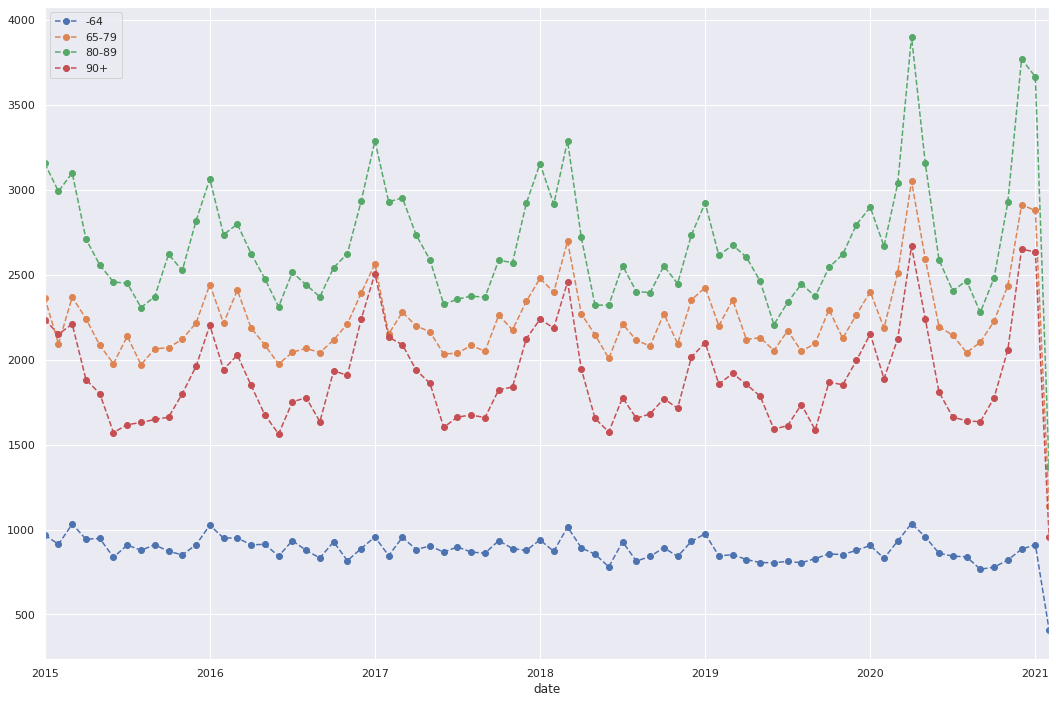

In [292]:
#### monthly deaths ####
grp_daily_corrected_monthly = grp_daily_corrected.resample('M').sum()
grp_daily_corrected_monthly.plot(figsize=(18,12),style='o--')

In [293]:
pop_age_scb_prel_df

pop
year scb_prel_age_bin         
2002 -64               7391436
     65-79             1068690
     80-89              407646
     90+                 71595
2003 -64               7418748
...                        ...
2019 90+                103476
2020 -64               8273794
     65-79             1549655
     80-89              451009
     90+                104025

[76 rows x 1 columns]

In [294]:
### add population for 2021 ###
### for now assume population 2021 == population 2020. UPDATE when new 2021 pop numbers arrive ###

pop_2021 = pop_age_scb_prel_df.loc['2020']
pop_2021.name='2021'
idx = pd.MultiIndex.from_arrays([['2021'] * 4,['-64','65-79','80-89','90+']])
pop_2021.index = idx
pop_age_scb_prel_df = pd.concat([pop_age_scb_prel_df,pop_2021])
pop_age_scb_prel_df

pop
year scb_prel_age_bin         
2002 -64               7391436
     65-79             1068690
     80-89              407646
     90+                 71595
2003 -64               7418748
...                        ...
2020 90+                104025
2021 -64               8273794
     65-79             1549655
     80-89              451009
     90+                104025

[80 rows x 1 columns]

In [295]:
### check total population sizes ###
pop_age_scb_prel_df.groupby('year').sum()

pop
year          
2002   8939367
2003   8973472
2004   9008883
2005   9042663
2006   9107935
2007   9174464
2008   9248976
2009   9331619
2010   9408320
2011   9476105
2012   9546448
2013   9633589
2014   9737559
2015   9838418
2016   9967637
2017  10104036
2018  10215309
2019  10319473
2020  10378483
2021  10378483

In [296]:
### HERE scb data error illustrated! 
grp_daily_corrected.loc['2015'].sum()

-64      10972.0
65-79    25708.0
80-89    32060.0
90+      22167.0
dtype: float64

In [297]:
### vs HERE! 
scb_prel_binned.loc['2015','dead']

scb_prel_age_bin
-64      10972
65-79    25708
80-89    32060
90+      22167
Name: dead, dtype: int64

In [298]:
grp_daily_corrected.loc['2015'].sum() / pop_age_scb_prel_df.loc['2015','pop']

-64      0.001393
65-79    0.017732
80-89    0.078093
90+      0.221373
dtype: float64

In [299]:
#### BUG !!!! Identifed : scb data error, see top of notebook.
#### FOR SOME REASON, CALCULATING MORTALITY THIS WAY (DAILY) RESULTS IN age grp 90+ ALL YEARS BUT 2020 
#### HAVING DIFFERENT OUTCOME COMPARED TO WHEN CALCULATED ON YEARLY BASIS AS FOR  scb_prel_binned.
#### can it be a rounding error....? 

#### compute binned daily mortality for each year ####
gg = grp_daily_corrected.groupby(grp_daily_corrected.index.get_level_values(0).year)

mortality_all_grp_TD = pd.DataFrame().astype('uint64')

for grp in gg.groups.keys():
    foo = gg.get_group(grp)
    year = foo.index.get_level_values(0).year[0] # use the first index year for the pop.lookup below #
    pop = pop_age_scb_prel_df.loc[str(year),'pop']

    mortality_all_grp_TD = pd.concat([mortality_all_grp_TD,foo.div(pop,axis=1)])
    
mortality_all_grp_TD

-64     65-79     80-89       90+
date                                                  
2015-01-01  4.868823e-06  0.000053  0.000247  0.000810
2015-01-02  3.026566e-06  0.000053  0.000272  0.000630
2015-01-03  5.263592e-06  0.000056  0.000210  0.000750
2015-01-04  2.894976e-06  0.000040  0.000247  0.000760
2015-01-05  3.158155e-06  0.000055  0.000220  0.000760
...                  ...       ...       ...       ...
2021-02-15  1.472025e-06  0.000032  0.000139  0.000415
2021-02-16  1.873486e-06  0.000025  0.000076  0.000164
2021-02-17  8.029226e-07  0.000011  0.000054  0.000145
2021-02-18  2.676409e-07  0.000007  0.000025  0.000145
2021-02-19  1.338204e-07  0.000004  0.000004  0.000077

[2242 rows x 4 columns]

In [300]:
### check yearly mortality per age group ###
mortality_all_grp_TD.groupby(mortality_all_grp_TD.index.year).sum()

-64     65-79     80-89       90+
date                                        
2015  0.001393  0.017732  0.078093  0.221373
2016  0.001363  0.017759  0.075700  0.222263
2017  0.001328  0.017585  0.076037  0.226129
2018  0.001298  0.017865  0.074139  0.222186
2019  0.001230  0.017137  0.069221  0.210232
2020  0.001264  0.018582  0.076659  0.233598
2021  0.000160  0.002592  0.011153  0.034521

last_date :  2021-02-19 00:00:00
last_good_date :  2021-02-05 00:00:00


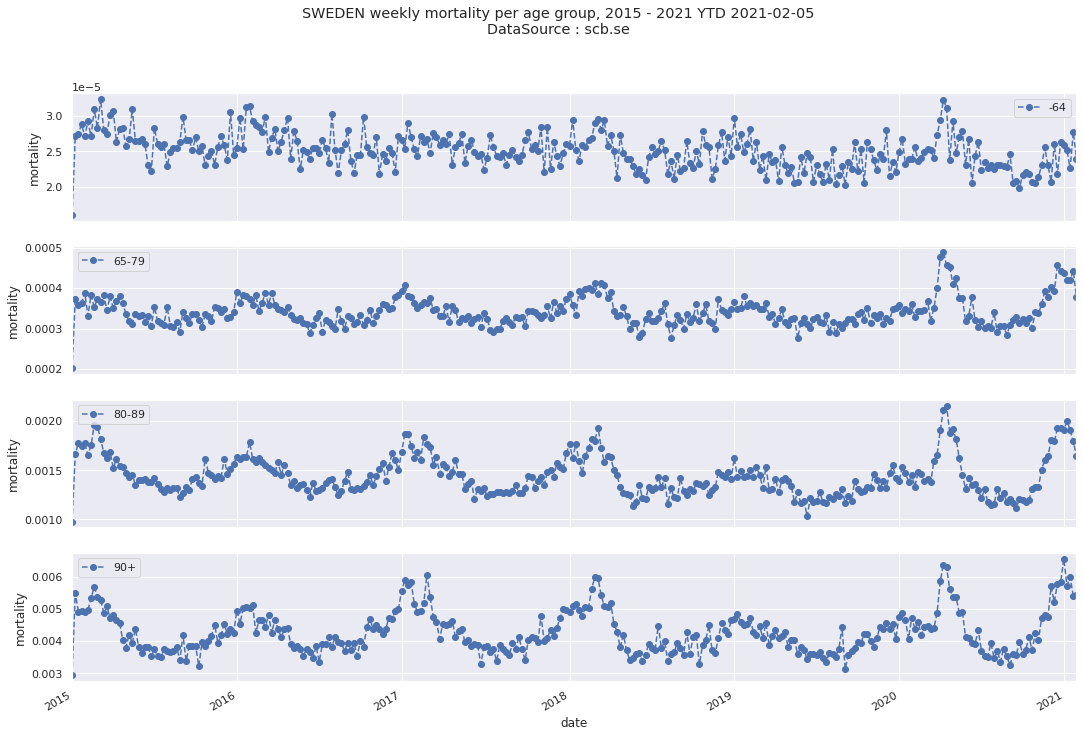

In [301]:
### plot weekly mortality per age grp over the years 2015-2021 YTD, skip last two weeks to be updated) ###
last_date = mortality_all_grp_TD.index[-1]
last_good_date = last_date - pd.DateOffset(weeks=2)
print ('last_date : ',last_date)
print ('last_good_date : ',last_good_date)

weekly_age_mortality = mortality_all_grp_TD.resample('W').sum()
title='SWEDEN weekly mortality per age group, 2015 - 2021 YTD {}\nDataSource : scb.se'.format(last_good_date.date())
axes = weekly_age_mortality.loc[:last_good_date].plot(figsize=(18,12),style='o--',subplots=True,title=title)

for ax in axes:
    ax.set_ylabel('mortality')

last_date :  2021-02-19 00:00:00
last_good_date :  2021-01-31 00:00:00


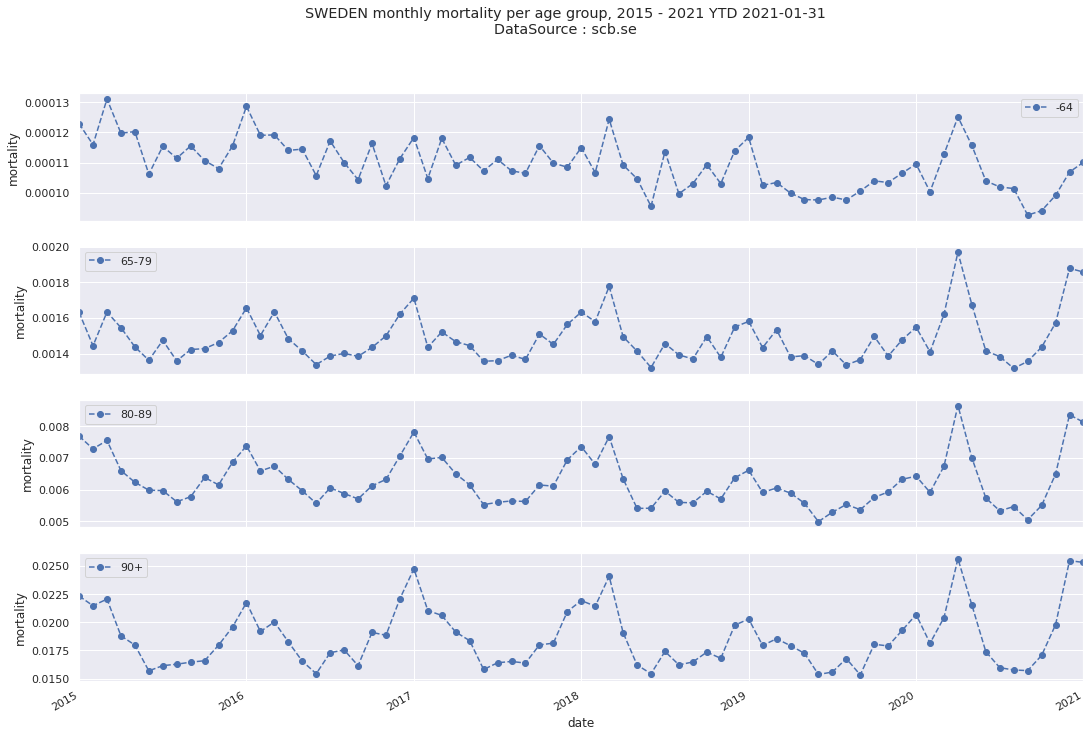

In [302]:
from pandas.tseries.offsets import MonthEnd

### plot monthly mortality per age grp over the years 2015-2021 YTD, skip last two weeks to be updated) ###
last_date = mortality_all_grp_TD.index[-1]
last_good_date = last_date - MonthEnd(1)

print ('last_date : ',last_date)
print ('last_good_date : ',last_good_date)

monthly_age_mortality = mortality_all_grp_TD.resample('M').sum()

title='SWEDEN monthly mortality per age group, 2015 - 2021 YTD {}\nDataSource : scb.se'.format(last_good_date.date())
axes = monthly_age_mortality.loc[:last_good_date].plot(figsize=(18,12),style='o--',subplots=True,title=title)

for ax in axes:
    ax.set_ylabel('mortality')

In [303]:
### other stuff ###


In [304]:
### age grp daily mortality from 2015 to latest scb latest update ###
mortality_all_grp_TD

-64     65-79     80-89       90+
date                                                  
2015-01-01  4.868823e-06  0.000053  0.000247  0.000810
2015-01-02  3.026566e-06  0.000053  0.000272  0.000630
2015-01-03  5.263592e-06  0.000056  0.000210  0.000750
2015-01-04  2.894976e-06  0.000040  0.000247  0.000760
2015-01-05  3.158155e-06  0.000055  0.000220  0.000760
...                  ...       ...       ...       ...
2021-02-15  1.472025e-06  0.000032  0.000139  0.000415
2021-02-16  1.873486e-06  0.000025  0.000076  0.000164
2021-02-17  8.029226e-07  0.000011  0.000054  0.000145
2021-02-18  2.676409e-07  0.000007  0.000025  0.000145
2021-02-19  1.338204e-07  0.000004  0.000004  0.000077

[2242 rows x 4 columns]

In [305]:
#### BUG !!!! Identified : error in scb data - see note on top of notebook. 
#### FOR SOME REASON, CALCULATING MORTALITY THIS WAY (DAILY) RESULTS IN age grp 90+ ALL YEARS BUT 2020 
#### HAVING DIFFERENT OUTCOME COMPARED TO WHEN CALCULATED ON YEARLY BASIS AS FOR  scb_prel_binned.
#### can it be a rounding error....? 

mortality_all_grp_TD.groupby(mortality_all_grp_TD.index.year).sum()

-64     65-79     80-89       90+
date                                        
2015  0.001393  0.017732  0.078093  0.221373
2016  0.001363  0.017759  0.075700  0.222263
2017  0.001328  0.017585  0.076037  0.226129
2018  0.001298  0.017865  0.074139  0.222186
2019  0.001230  0.017137  0.069221  0.210232
2020  0.001264  0.018582  0.076659  0.233598
2021  0.000160  0.002592  0.011153  0.034521

In [306]:
### create a 2015-2018 daily mortality baseline ###
mortality_all_grp_2015_2018 = mortality_all_grp_TD.loc[:'2018']

### min,max,mean for each day of year ###
baseline_15_18_min_max_mean = mortality_all_grp_2015_2018.groupby([mortality_all_grp_2015_2018.index.month,
                                    mortality_all_grp_2015_2018.index.day]).agg(['min','max','mean'])

baseline_15_18_min_max_mean.index=pd.date_range('2020-01-01','2020-12-31')
baseline_15_18_min_max_mean

-64                         65-79                      \
                 min       max      mean       min       max      mean   
2020-01-01  0.000003  0.000005  0.000004  0.000052  0.000072  0.000058   
2020-01-02  0.000003  0.000005  0.000004  0.000047  0.000057  0.000051   
2020-01-03  0.000003  0.000005  0.000004  0.000055  0.000064  0.000060   
2020-01-04  0.000003  0.000004  0.000004  0.000040  0.000063  0.000053   
2020-01-05  0.000002  0.000004  0.000003  0.000055  0.000067  0.000060   
...              ...       ...       ...       ...       ...       ...   
2020-12-27  0.000002  0.000004  0.000003  0.000047  0.000057  0.000053   
2020-12-28  0.000003  0.000004  0.000004  0.000045  0.000062  0.000052   
2020-12-29  0.000003  0.000004  0.000004  0.000046  0.000068  0.000054   
2020-12-30  0.000004  0.000004  0.000004  0.000048  0.000059  0.000054   
2020-12-31  0.000003  0.000004  0.000004  0.000050  0.000060  0.000054   

               80-89                           90+                      
                 min       max      mean       min       max      mean  
2020-01-01  0.000195  0.000284  0.000245  0.000585  0.000813  0.000720  
2020-01-02  0.000238  0.000305  0.000276  0.000630  0.000843  0.000749  
2020-01-03  0.000210  0.000280  0.000252  0.000650  0.000843  0.000747  
2020-01-04  0.000219  0.000252  0.000240  0.000525  0.000863  0.000729  
2020-01-05  0.000219  0.000262  0.000233  0.000635  0.000760  0.000724  
...              ...       ...       ...       ...       ...       ...  
2020-12-27  0.000187  0.000226  0.000199  0.000600  0.000674  0.000652  
2020-12-28  0.000201  0.000252  0.000223  0.000571  0.000942  0.000717  
2020-12-29  0.000198  0.000248  0.000224  0.000664  0.000837  0.000774  
2020-12-30  0.000203  0.000262  0.000235  0.000463  0.000962  0.000708  
2020-12-31  0.000201  0.000260  0.000234  0.000680  0.000803  0.000727  

[366 rows x 12 columns]

In [307]:
### drop leap day from non-leap years, create one df for leap years, one for non-leap years ###
baseline_15_18_min_max_mean_no_leap = baseline_15_18_min_max_mean.drop(pd.Timestamp('2020-02-29'))
baseline_15_18_min_max_mean_leap = baseline_15_18_min_max_mean
baseline_15_18_min_max_mean_no_leap.index=range(1,366)
baseline_15_18_min_max_mean_leap

-64                         65-79                      \
                 min       max      mean       min       max      mean   
2020-01-01  0.000003  0.000005  0.000004  0.000052  0.000072  0.000058   
2020-01-02  0.000003  0.000005  0.000004  0.000047  0.000057  0.000051   
2020-01-03  0.000003  0.000005  0.000004  0.000055  0.000064  0.000060   
2020-01-04  0.000003  0.000004  0.000004  0.000040  0.000063  0.000053   
2020-01-05  0.000002  0.000004  0.000003  0.000055  0.000067  0.000060   
...              ...       ...       ...       ...       ...       ...   
2020-12-27  0.000002  0.000004  0.000003  0.000047  0.000057  0.000053   
2020-12-28  0.000003  0.000004  0.000004  0.000045  0.000062  0.000052   
2020-12-29  0.000003  0.000004  0.000004  0.000046  0.000068  0.000054   
2020-12-30  0.000004  0.000004  0.000004  0.000048  0.000059  0.000054   
2020-12-31  0.000003  0.000004  0.000004  0.000050  0.000060  0.000054   

               80-89                           90+                      
                 min       max      mean       min       max      mean  
2020-01-01  0.000195  0.000284  0.000245  0.000585  0.000813  0.000720  
2020-01-02  0.000238  0.000305  0.000276  0.000630  0.000843  0.000749  
2020-01-03  0.000210  0.000280  0.000252  0.000650  0.000843  0.000747  
2020-01-04  0.000219  0.000252  0.000240  0.000525  0.000863  0.000729  
2020-01-05  0.000219  0.000262  0.000233  0.000635  0.000760  0.000724  
...              ...       ...       ...       ...       ...       ...  
2020-12-27  0.000187  0.000226  0.000199  0.000600  0.000674  0.000652  
2020-12-28  0.000201  0.000252  0.000223  0.000571  0.000942  0.000717  
2020-12-29  0.000198  0.000248  0.000224  0.000664  0.000837  0.000774  
2020-12-30  0.000203  0.000262  0.000235  0.000463  0.000962  0.000708  
2020-12-31  0.000201  0.000260  0.000234  0.000680  0.000803  0.000727  

[366 rows x 12 columns]

In [308]:
### concatenate the leap and non-leap baselines for the period of 2015 - 2021 ###
baseline_stats = pd.concat([baseline_15_18_min_max_mean_no_leap,baseline_15_18_min_max_mean_leap,
                          baseline_15_18_min_max_mean_no_leap,baseline_15_18_min_max_mean_no_leap,
                          baseline_15_18_min_max_mean_no_leap,baseline_15_18_min_max_mean_leap,
                          baseline_15_18_min_max_mean_no_leap],axis=0)

baseline_stats.index = pd.date_range('2015-01-01','2021-12-31')

baseline_stats

-64                         65-79                      \
                 min       max      mean       min       max      mean   
2015-01-01  0.000003  0.000005  0.000004  0.000052  0.000072  0.000058   
2015-01-02  0.000003  0.000005  0.000004  0.000047  0.000057  0.000051   
2015-01-03  0.000003  0.000005  0.000004  0.000055  0.000064  0.000060   
2015-01-04  0.000003  0.000004  0.000004  0.000040  0.000063  0.000053   
2015-01-05  0.000002  0.000004  0.000003  0.000055  0.000067  0.000060   
...              ...       ...       ...       ...       ...       ...   
2021-12-27  0.000002  0.000004  0.000003  0.000047  0.000057  0.000053   
2021-12-28  0.000003  0.000004  0.000004  0.000045  0.000062  0.000052   
2021-12-29  0.000003  0.000004  0.000004  0.000046  0.000068  0.000054   
2021-12-30  0.000004  0.000004  0.000004  0.000048  0.000059  0.000054   
2021-12-31  0.000003  0.000004  0.000004  0.000050  0.000060  0.000054   

               80-89                           90+                      
                 min       max      mean       min       max      mean  
2015-01-01  0.000195  0.000284  0.000245  0.000585  0.000813  0.000720  
2015-01-02  0.000238  0.000305  0.000276  0.000630  0.000843  0.000749  
2015-01-03  0.000210  0.000280  0.000252  0.000650  0.000843  0.000747  
2015-01-04  0.000219  0.000252  0.000240  0.000525  0.000863  0.000729  
2015-01-05  0.000219  0.000262  0.000233  0.000635  0.000760  0.000724  
...              ...       ...       ...       ...       ...       ...  
2021-12-27  0.000187  0.000226  0.000199  0.000600  0.000674  0.000652  
2021-12-28  0.000201  0.000252  0.000223  0.000571  0.000942  0.000717  
2021-12-29  0.000198  0.000248  0.000224  0.000664  0.000837  0.000774  
2021-12-30  0.000203  0.000262  0.000235  0.000463  0.000962  0.000708  
2021-12-31  0.000201  0.000260  0.000234  0.000680  0.000803  0.000727  

[2557 rows x 12 columns]

In [309]:
#### select the desired attribute from the multi-columns using xs ####
mean = baseline_stats.xs('mean',level=1,axis=1)
min_ = baseline_stats.xs('min',level=1,axis=1)
max_ = baseline_stats.xs('max',level=1,axis=1)


-64     65-79     80-89       90+
date                                              
2015-01-01  0.000005  0.000053  0.000247  0.000810
2015-01-02  0.000003  0.000053  0.000272  0.000630
2015-01-03  0.000005  0.000056  0.000210  0.000750
2015-01-04  0.000003  0.000040  0.000247  0.000760
2015-01-05  0.000003  0.000055  0.000220  0.000760
...              ...       ...       ...       ...
2021-02-01  0.000003  0.000057  0.000179  0.000792
2021-02-02  0.000004  0.000052  0.000208  0.000521
2021-02-03  0.000004  0.000048  0.000193  0.000618
2021-02-04  0.000005  0.000048  0.000210  0.000695
2021-02-05  0.000002  0.000043  0.000210  0.000589

[2228 rows x 4 columns]

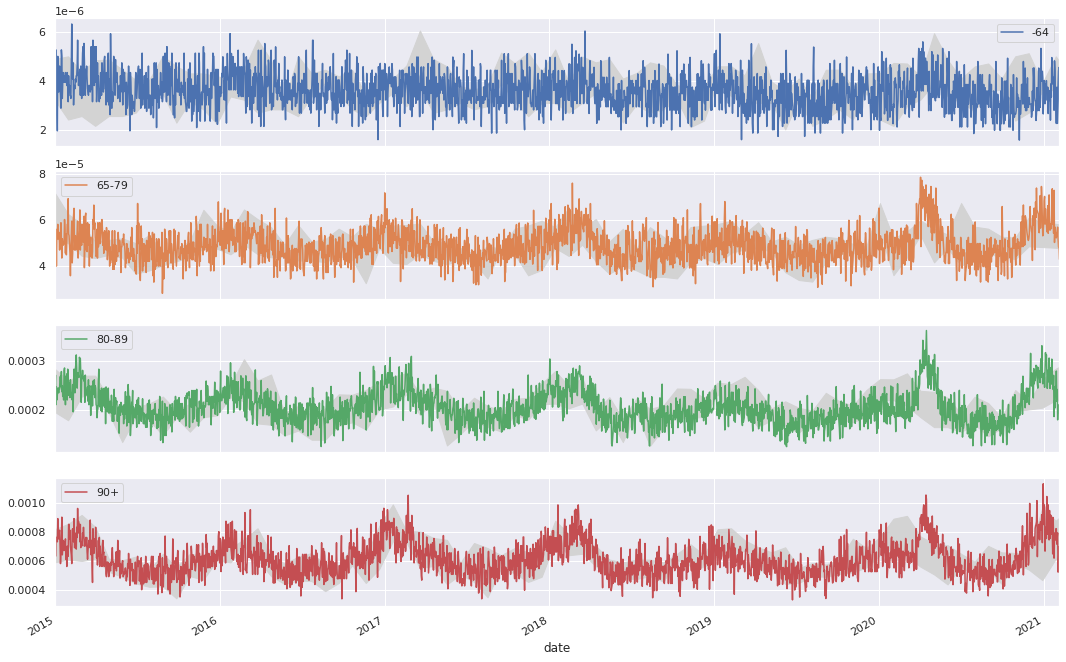

In [310]:
### reduce the daily fill shading to every 30:th day for clarity ###  
axes = mortality_all_grp_TD[:-14].plot(figsize=(18,12),subplots=True)
axes[0].fill_between(min_.index[::30],min_['-64'][::30],max_['-64'][::30],color='lightgrey')
axes[1].fill_between(min_.index[::30],min_['65-79'][::30],max_['65-79'][::30],color='lightgrey')
axes[2].fill_between(min_.index[::30],min_['80-89'][::30],max_['80-89'][::30],color='lightgrey')
axes[3].fill_between(min_.index[::30],min_['90+'][::30],max_['90+'][::30],color='lightgrey')

mortality_all_grp_TD[:-14]

In [311]:
weekly_age_mortality.index[-3]

Timestamp('2021-02-07 00:00:00', freq='W-SUN')

-64     65-79     80-89       90+
date                                              
2015-01-04  0.000016  0.000202  0.000976  0.002952
2015-01-11  0.000027  0.000373  0.001659  0.005493
2015-01-18  0.000028  0.000357  0.001776  0.004903
2015-01-25  0.000029  0.000364  0.001749  0.004923
2015-02-01  0.000027  0.000388  0.001771  0.004913
...              ...       ...       ...       ...
2021-01-10  0.000025  0.000419  0.002002  0.005716
2021-01-17  0.000023  0.000421  0.001905  0.005977
2021-01-24  0.000028  0.000443  0.001791  0.005398
2021-01-31  0.000024  0.000377  0.001641  0.005427
2021-02-07  0.000024  0.000349  0.001415  0.004461

[319 rows x 4 columns]

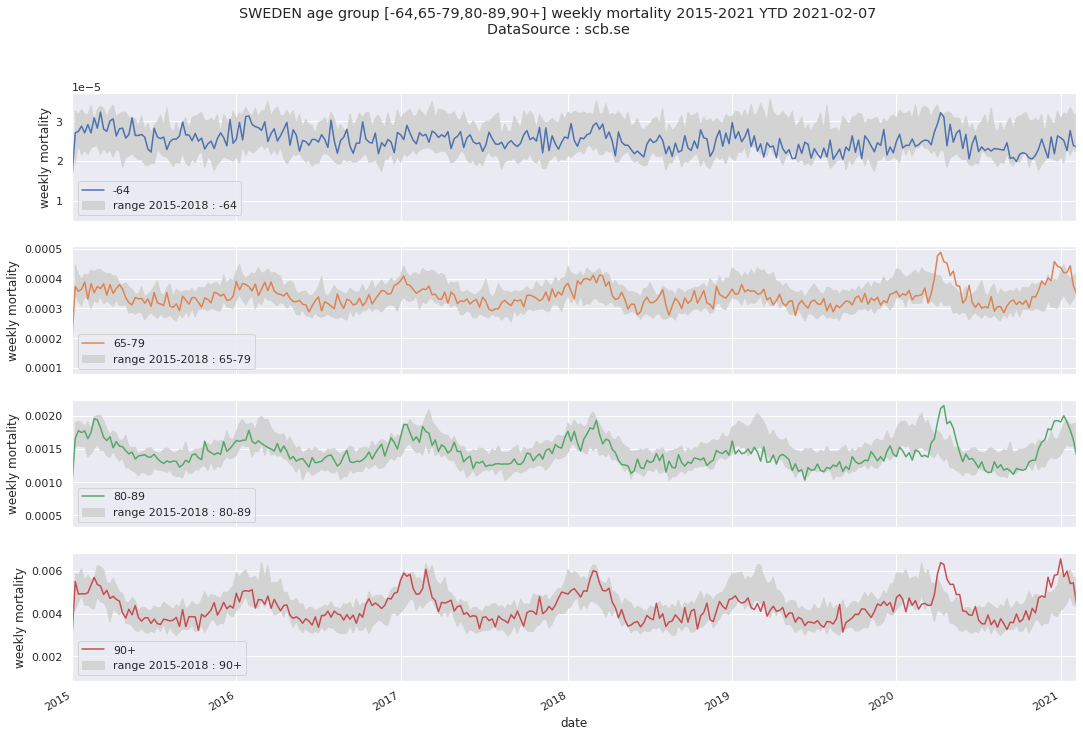

In [312]:
### resample on weekly basis ###
### the shadow for the years does not look exactly identical, since the week numbers are not aligned ###
### year by year ###
weekly_baseline_stats = baseline_stats.resample('W-WED').sum()

weekly_mean = weekly_baseline_stats.xs('mean',level=1,axis=1)
weekly_min_ = weekly_baseline_stats.xs('min',level=1,axis=1)
weekly_max_ = weekly_baseline_stats.xs('max',level=1,axis=1)

title='SWEDEN age group [-64,65-79,80-89,90+] weekly mortality 2015-2021 YTD {}\nDataSource : scb.se'.format(
    weekly_age_mortality.index[-3].date() )

axes = weekly_age_mortality[:-2].plot(figsize=(18,12),subplots=True,title=title)

axes[0].fill_between(weekly_min_.index,weekly_min_['-64'],weekly_max_['-64'],
                     color='lightgrey',label='range 2015-2018 : -64')

axes[1].fill_between(weekly_min_.index,weekly_min_['65-79'],weekly_max_['65-79'],
                     color='lightgrey',label='range 2015-2018 : 65-79')

axes[2].fill_between(weekly_min_.index,weekly_min_['80-89'],weekly_max_['80-89'],
                     color='lightgrey',label='range 2015-2018 : 80-89')

axes[3].fill_between(weekly_min_.index,weekly_min_['90+'],weekly_max_['90+'],
                     color='lightgrey',label='range 2015-2018 : 90+')

for a in axes:
    a.set_ylabel('weekly mortality')
    a.legend(loc='lower left')


plt.savefig('SCB_excess_weekly_age_mortality.jpg',format='jpg')

weekly_age_mortality[:-2]


-64     65-79     80-89       90+
date                                              
2015-01-31  0.000123  0.001631  0.007686  0.022333
2015-02-28  0.000116  0.001444  0.007285  0.021473
2015-03-31  0.000131  0.001633  0.007549  0.022063
2015-04-30  0.000120  0.001546  0.006600  0.018801
2015-05-31  0.000120  0.001438  0.006231  0.017981
...              ...       ...       ...       ...
2020-09-30  0.000093  0.001357  0.005051  0.015710
2020-10-31  0.000094  0.001437  0.005500  0.017063
2020-11-30  0.000099  0.001572  0.006489  0.019788
2020-12-31  0.000107  0.001878  0.008359  0.025479
2021-01-31  0.000110  0.001858  0.008126  0.025318

[73 rows x 4 columns]

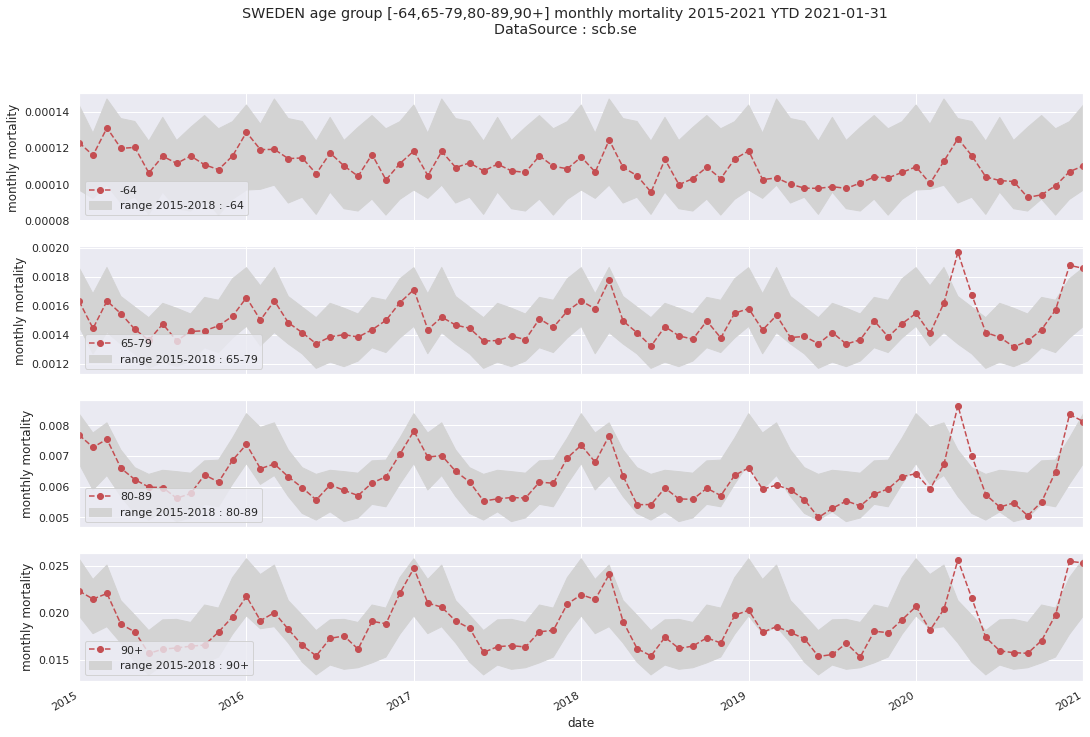

In [313]:
monthly_age_mortality = mortality_all_grp_TD.resample('M').sum()

monthly_baseline_stats = baseline_stats.resample('M').sum()
monthly_mean = monthly_baseline_stats.xs('mean',level=1,axis=1)
monthly_min_ = monthly_baseline_stats.xs('min',level=1,axis=1)
monthly_max_ = monthly_baseline_stats.xs('max',level=1,axis=1)

title='SWEDEN age group [-64,65-79,80-89,90+] monthly mortality 2015-2021 YTD {}\nDataSource : scb.se'.format(
    monthly_age_mortality.index[-2].date() )

axes = monthly_age_mortality[:-1].plot(figsize=(18,12),style='ro--',subplots=True,title=title)

axes[0].fill_between(monthly_min_.index,monthly_min_['-64'],monthly_max_['-64'],
                     color='lightgrey',label='range 2015-2018 : -64')

axes[1].fill_between(monthly_min_.index,monthly_min_['65-79'],monthly_max_['65-79'],
                     color='lightgrey',label='range 2015-2018 : 65-79')

axes[2].fill_between(monthly_min_.index,monthly_min_['80-89'],monthly_max_['80-89'],
                     color='lightgrey',label='range 2015-2018 : 80-89')

axes[3].fill_between(monthly_min_.index,monthly_min_['90+'],monthly_max_['90+'],
                     color='lightgrey',label='range 2015-2018 : 90+')

for a in axes:
    a.set_ylabel('monthly mortality')
    a.legend(loc='lower left')


plt.savefig('SCB_excess_monthly_age_mortality.jpg',format='jpg')

monthly_age_mortality[:-1]


In [314]:
last_data_day

Timestamp('2021-02-19 00:00:00', freq='D')

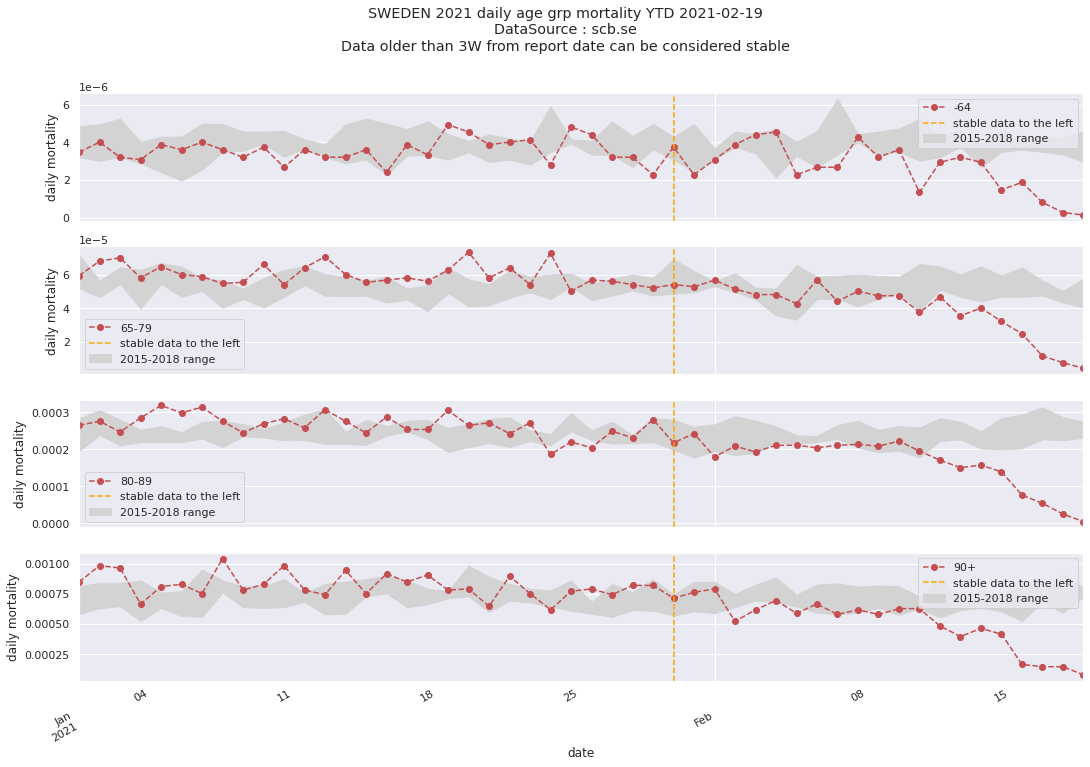

In [315]:
disclaimer = '\nData older than 3W from report date can be considered stable\n'
title = 'SWEDEN 2021 daily age grp mortality YTD {}\nDataSource : scb.se'.format(last_data_day.date()) + disclaimer

axes = mortality_all_grp_TD.loc['2021'][:last_data_day].plot(figsize=(18,12),
                                                             style='ro--',subplots=True,title=title)
min_2021 = min_.loc['2021': last_data_day]
max_2021 = max_.loc['2021' : last_data_day]

axes[0].fill_between(min_2021.index,min_2021['-64'],max_2021['-64'],color='lightgrey',label='2015-2018 range')
axes[1].fill_between(min_2021.index,min_2021['65-79'],max_2021['65-79'],color='lightgrey',label='2015-2018 range')
axes[2].fill_between(min_2021.index,min_2021['80-89'],max_2021['80-89'],color='lightgrey',label='2015-2018 range')
axes[3].fill_between(min_2021.index,min_2021['90+'],max_2021['90+'],color='lightgrey',label='2015-2018 range')

for a in axes:
    a.set_ylabel('daily mortality')
    a.axvline (mortality_all_grp_TD.index[-21],ls='dashed',color='orange',label='stable data to the left')
    a.legend()

plt.savefig('SCB_excess_daily_age_grp_2021_mortality.jpg',format='jpg')

In [316]:
monthly_age_grp_mortality = mortality_all_grp_TD.groupby(
    [mortality_all_grp_TD.index.year,mortality_all_grp_TD.index.month]).sum()

monthly_age_grp_mortality

-64     65-79     80-89       90+
date date                                        
2015 1     0.000123  0.001631  0.007686  0.022333
     2     0.000116  0.001444  0.007285  0.021473
     3     0.000131  0.001633  0.007549  0.022063
     4     0.000120  0.001546  0.006600  0.018801
     5     0.000120  0.001438  0.006231  0.017981
...             ...       ...       ...       ...
2020 10    0.000094  0.001437  0.005500  0.017063
     11    0.000099  0.001572  0.006489  0.019788
     12    0.000107  0.001878  0.008359  0.025479
2021 1     0.000110  0.001858  0.008126  0.025318
     2     0.000050  0.000734  0.003027  0.009202

[74 rows x 4 columns]

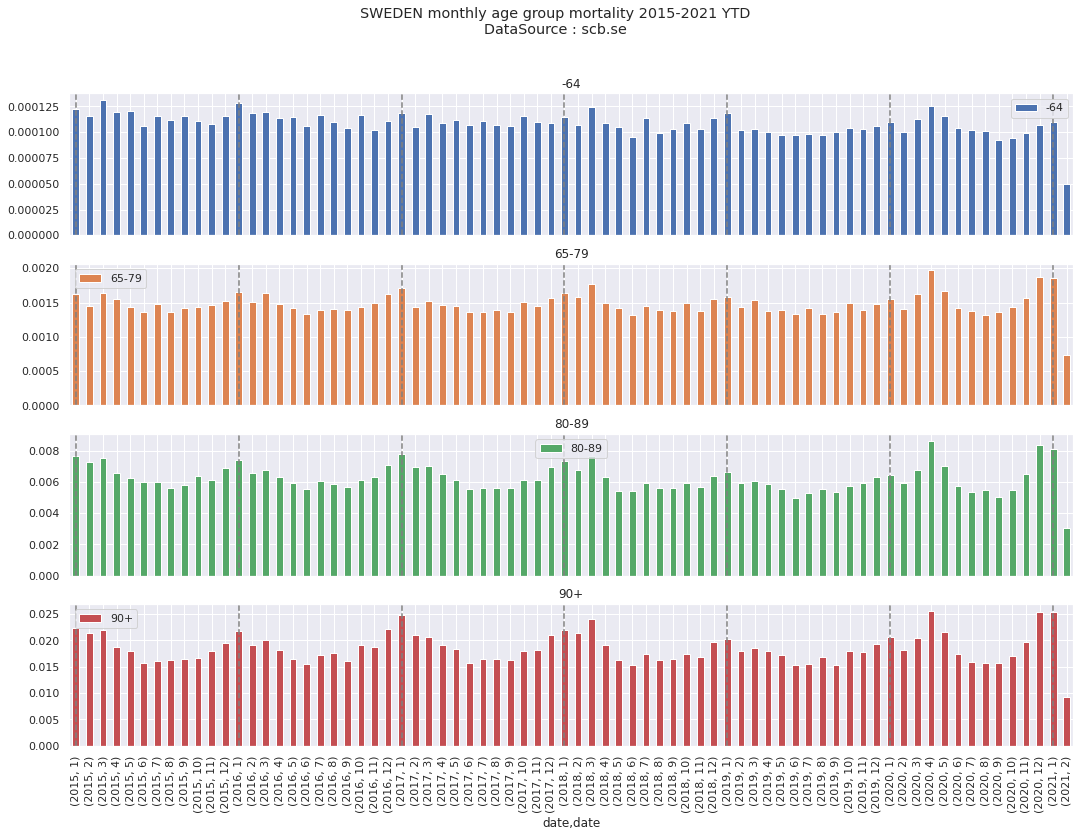

In [317]:
title = 'SWEDEN monthly age group mortality 2015-2021 YTD\nDataSource : scb.se'
axes = monthly_age_grp_mortality.plot(kind='bar',figsize=(18,12),subplots=True,title=title)

for a in axes:
    for i in range(len(monthly_age_grp_mortality)):
        a.axvline(i*12,ls='dashed',color='grey')

-64     65-79     80-89       90+
date                                              
2020-01-31  0.000110  0.001548  0.006424  0.020686
2020-02-29  0.000100  0.001410  0.005915  0.018145
2020-03-31  0.000113  0.001620  0.006736  0.020416
2020-04-30  0.000125  0.001969  0.008650  0.025643
2020-05-31  0.000116  0.001674  0.007001  0.021537
2020-06-30  0.000104  0.001416  0.005735  0.017392
2020-07-31  0.000102  0.001383  0.005332  0.015971
2020-08-31  0.000101  0.001318  0.005466  0.015768
2020-09-30  0.000093  0.001357  0.005051  0.015710
2020-10-31  0.000094  0.001437  0.005500  0.017063
2020-11-30  0.000099  0.001572  0.006489  0.019788
2020-12-31  0.000107  0.001878  0.008359  0.025479

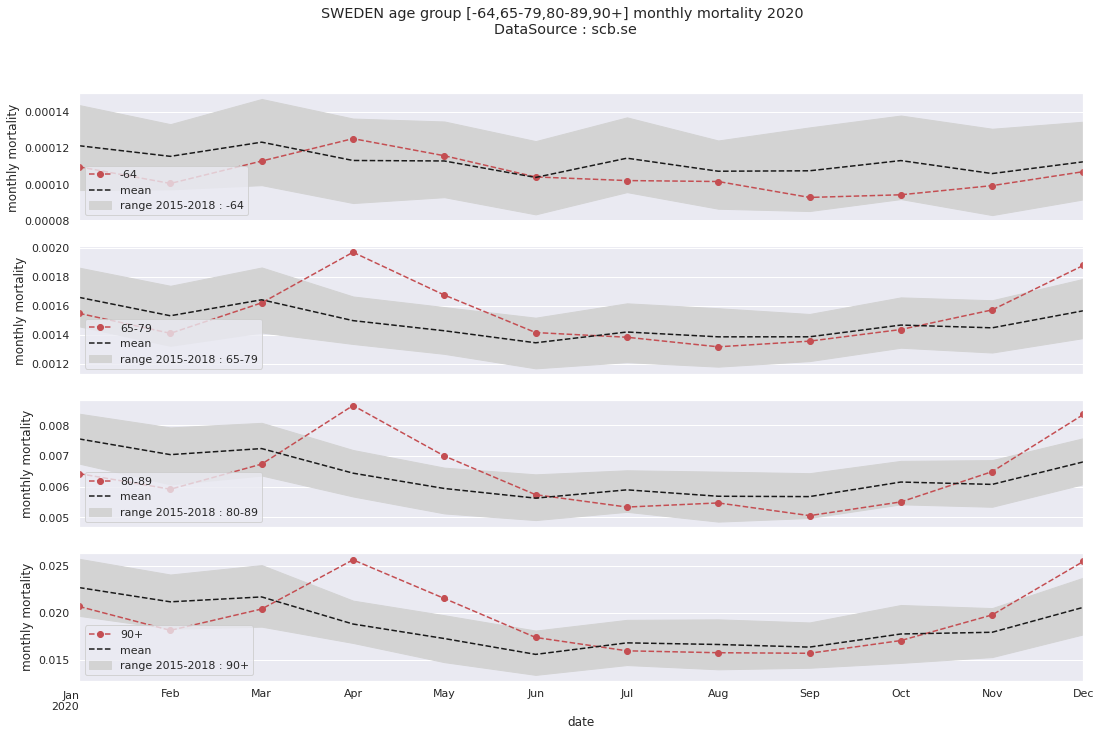

In [318]:


title='SWEDEN age group [-64,65-79,80-89,90+] monthly mortality 2020 \nDataSource : scb.se' 

monthly_age_mortality_2020 = monthly_age_mortality.loc['2020-01-01' : '2020-12-31']

monthly_mean_2020 = monthly_baseline_stats.loc['2020-01-01' :'2020-12-31'].xs('mean',level=1,axis=1)
monthly_min_2020 = monthly_baseline_stats.loc['2020-01-01' : '2020-12-31'].xs('min',level=1,axis=1)
monthly_max_2020 = monthly_baseline_stats.loc['2020-01-01' : '2020-12-31'].xs('max',level=1,axis=1)

axes = monthly_age_mortality_2020.plot(figsize=(18,12),style='ro--',subplots=True,title=title)

axes[0].fill_between(monthly_min_2020.index,monthly_min_2020['-64'],monthly_max_2020['-64'],
                     color='lightgrey',label='range 2015-2018 : -64')

monthly_mean_2020.plot(ax=axes[0],y='-64',style='k--',label='mean')


axes[1].fill_between(monthly_min_2020.index,monthly_min_2020['65-79'],monthly_max_2020['65-79'],
                     color='lightgrey',label='range 2015-2018 : 65-79')

monthly_mean_2020.plot(ax=axes[1],y='65-79',style='k--',label='mean')


axes[2].fill_between(monthly_min_2020.index,monthly_min_2020['80-89'],monthly_max_2020['80-89'],
                     color='lightgrey',label='range 2015-2018 : 80-89')

monthly_mean_2020.plot(ax=axes[2],y='80-89',style='k--',label='mean')


axes[3].fill_between(monthly_min_2020.index,monthly_min_2020['90+'],monthly_max_2020['90+'],
                     color='lightgrey',label='range 2015-2018 : 90+')

monthly_mean_2020.plot(ax=axes[3],y='90+',style='k--',label='mean')


for a in axes:
    a.set_ylabel('monthly mortality')
    a.legend(loc='lower left')


plt.savefig('SCB_excess_2020_monthly_age_mortality.jpg',format='jpg')



monthly_age_mortality_2020


In [319]:
monthly_age_grp_mortality

-64     65-79     80-89       90+
date date                                        
2015 1     0.000123  0.001631  0.007686  0.022333
     2     0.000116  0.001444  0.007285  0.021473
     3     0.000131  0.001633  0.007549  0.022063
     4     0.000120  0.001546  0.006600  0.018801
     5     0.000120  0.001438  0.006231  0.017981
...             ...       ...       ...       ...
2020 10    0.000094  0.001437  0.005500  0.017063
     11    0.000099  0.001572  0.006489  0.019788
     12    0.000107  0.001878  0.008359  0.025479
2021 1     0.000110  0.001858  0.008126  0.025318
     2     0.000050  0.000734  0.003027  0.009202

[74 rows x 4 columns]

In [320]:
### monthly mortality indexed by DatetimeIndex ###

monthly_age_grp_mortality_long = monthly_age_grp_mortality.copy()
monthly_age_grp_mortality_long.index = pd.date_range('2015',periods=len(monthly_age_grp_mortality),freq='M')

In [321]:
monthly_age_grp_mortality_long

-64     65-79     80-89       90+
2015-01-31  0.000123  0.001631  0.007686  0.022333
2015-02-28  0.000116  0.001444  0.007285  0.021473
2015-03-31  0.000131  0.001633  0.007549  0.022063
2015-04-30  0.000120  0.001546  0.006600  0.018801
2015-05-31  0.000120  0.001438  0.006231  0.017981
...              ...       ...       ...       ...
2020-10-31  0.000094  0.001437  0.005500  0.017063
2020-11-30  0.000099  0.001572  0.006489  0.019788
2020-12-31  0.000107  0.001878  0.008359  0.025479
2021-01-31  0.000110  0.001858  0.008126  0.025318
2021-02-28  0.000050  0.000734  0.003027  0.009202

[74 rows x 4 columns]

In [322]:
monthly_age_grp_mortality_long.groupby(monthly_age_grp_mortality_long.index.year).sum()

-64     65-79     80-89       90+
2015  0.001393  0.017732  0.078093  0.221373
2016  0.001363  0.017759  0.075700  0.222263
2017  0.001328  0.017585  0.076037  0.226129
2018  0.001298  0.017865  0.074139  0.222186
2019  0.001230  0.017137  0.069221  0.210232
2020  0.001264  0.018582  0.076659  0.233598
2021  0.000160  0.002592  0.011153  0.034521

In [323]:
### get the monthly age grp specific mortality for baseline 2015 - 2018 ###
baseline_monthly_mort = monthly_age_grp_mortality_long.loc['2015-01-01' : '2018-12-31']
baseline_mort_15_18 = baseline_monthly_mort.groupby([baseline_monthly_mort.index.month]).mean()
baseline_mort_15_18

-64     65-79     80-89       90+
1   0.000121  0.001658  0.007558  0.022692
2   0.000112  0.001490  0.006908  0.020784
3   0.000123  0.001642  0.007243  0.021698
4   0.000113  0.001498  0.006439  0.018819
5   0.000113  0.001428  0.005938  0.017277
6   0.000104  0.001345  0.005623  0.015592
7   0.000114  0.001420  0.005894  0.016817
8   0.000107  0.001386  0.005685  0.016643
9   0.000107  0.001387  0.005673  0.016366
10  0.000113  0.001467  0.006149  0.017760
11  0.000106  0.001448  0.006072  0.017943
12  0.000112  0.001566  0.006809  0.020597

In [324]:
nr_years = len(pop_age_scb_prel_df.index.get_level_values(0).unique())

In [325]:
### create a repeating baseline based on the above monthly baseline ###
baseline_mort_monthly = pd.concat([baseline_mort_15_18] * nr_years)
baseline_mort_monthly.index = pd.date_range('2002-01-01','2021-12-31',freq='M')

In [326]:

baseline_mort_monthly.loc['2020']

-64     65-79     80-89       90+
2020-01-31  0.000121  0.001658  0.007558  0.022692
2020-02-29  0.000112  0.001490  0.006908  0.020784
2020-03-31  0.000123  0.001642  0.007243  0.021698
2020-04-30  0.000113  0.001498  0.006439  0.018819
2020-05-31  0.000113  0.001428  0.005938  0.017277
2020-06-30  0.000104  0.001345  0.005623  0.015592
2020-07-31  0.000114  0.001420  0.005894  0.016817
2020-08-31  0.000107  0.001386  0.005685  0.016643
2020-09-30  0.000107  0.001387  0.005673  0.016366
2020-10-31  0.000113  0.001467  0.006149  0.017760
2020-11-30  0.000106  0.001448  0.006072  0.017943
2020-12-31  0.000112  0.001566  0.006809  0.020597

In [327]:
pop_age_scb_prel_df_long = pd.DataFrame(
    np.tile(pop_age_scb_prel_df.unstack().droplevel(0,axis=1).values,12).reshape((-1,4)),
columns=monthly_age_grp_mortality_long.columns,index=pd.date_range('2002-01-01','2021-12-31',freq='M'))

In [328]:
pop_age_scb_prel_df_long

-64    65-79   80-89     90+
2002-01-31  7391436  1068690  407646   71595
2002-02-28  7391436  1068690  407646   71595
2002-03-31  7391436  1068690  407646   71595
2002-04-30  7391436  1068690  407646   71595
2002-05-31  7391436  1068690  407646   71595
...             ...      ...     ...     ...
2021-08-31  8273794  1549655  451009  104025
2021-09-30  8273794  1549655  451009  104025
2021-10-31  8273794  1549655  451009  104025
2021-11-30  8273794  1549655  451009  104025
2021-12-31  8273794  1549655  451009  104025

[240 rows x 4 columns]

In [329]:

monthly_expected_deaths = baseline_mort_monthly * pop_age_scb_prel_df_long
print (monthly_expected_deaths.sum(axis=1).groupby(monthly_expected_deaths.index.year).sum())
monthly_expected_deaths

2002    75840.678102
2003    76621.667383
2004    77608.284190
2005    78264.148359
2006    79088.327146
2007    79874.993942
2008    80863.717165
2009    82036.608972
2010    84000.276789
2011    85558.009022
2012    86572.514166
2013    87604.419893
2014    88813.887314
2015    89837.566288
2016    91003.774596
2017    92001.188433
2018    93250.420784
2019    94943.153341
2020    96084.544604
2021    96084.544604
dtype: float64


-64        65-79        80-89          90+
2002-01-31  895.856960  1771.855988  3081.113023  1624.602795
2002-02-28  824.855902  1592.771525  2816.069581  1488.028752
2002-03-31  910.352158  1754.317352  2952.615996  1553.463060
2002-04-30  835.603880  1600.814847  2624.975313  1347.311974
2002-05-31  833.623317  1526.134957  2420.717947  1236.958761
...                ...          ...          ...          ...
2021-08-31  886.275398  2148.307412  2563.770669  1731.338928
2021-09-30  888.275808  2148.620272  2558.725643  1702.457695
2021-10-31  934.934656  2273.825621  2773.353440  1847.517759
2021-11-30  875.535171  2244.417509  2738.401087  1866.508304
2021-12-31  929.385593  2426.657409  3070.997426  2142.556831

[240 rows x 4 columns]

In [330]:
grp_daily_corrected_monthly

-64        65-79        80-89          90+
date                                                          
2015-01-31   968.239607  2365.062885  3155.484134  2236.338094
2015-02-28   913.296674  2093.928583  2990.780315  2150.170946
2015-03-31  1032.512472  2368.109338  3099.243805  2209.285617
2015-04-30   943.359788  2241.173803  2709.578674  1882.652007
2015-05-31   947.506425  2084.789224  2557.930646  1800.492632
...                 ...          ...          ...          ...
2020-10-31   778.645844  2226.224120  2480.486901  1774.984489
2020-11-30   820.496682  2435.714312  2926.792378  2058.419159
2020-12-31   884.374276  2910.975641  3769.813834  2650.415684
2021-01-31   911.227806  2878.652196  3664.699859  2633.734825
2021-02-28   410.772194  1137.347804  1365.300141   957.265175

[74 rows x 4 columns]

In [331]:
monthly_excess = grp_daily_corrected_monthly.sub(
    monthly_expected_deaths.loc['2015':last_good_date],axis=0)
monthly_excess.dropna()

-64       65-79       80-89         90+
2015-01-31   13.415077  -38.643823   52.527607  -35.859354
2015-02-28   34.146672  -66.831447  154.746253   68.988307
2015-03-31   62.238634  -11.804387  125.695284   36.585428
2015-04-30   52.754349   69.502171   65.993638   -1.721723
2015-05-31   59.011914   14.428621  120.051056   70.460806
...                ...         ...         ...         ...
2020-09-30 -121.744679  -46.422683 -280.644854  -68.185453
2020-10-31 -156.288811  -47.601500 -292.866539  -72.533269
2020-11-30  -55.038489  191.296802  188.391291  191.910855
2020-12-31  -45.011317  484.318232  698.816408  507.858854
2021-01-31  -91.572725  309.370654  255.836033  273.244487

[73 rows x 4 columns]

In [332]:

yearly_age_grp_excess = monthly_excess.groupby(monthly_excess.index.year).sum()
print (yearly_age_grp_excess.sum(axis=1))
yearly_age_grp_excess

2015    1069.433712
2016     -21.774596
2017     -29.188433
2018   -1065.420784
2019   -6177.153341
2020    2039.455396
2021     746.878448
dtype: float64


-64        65-79        80-89          90+
2015  372.814886    -4.198450   862.484948  -161.667673
2016  137.673198    35.344036  -121.398413   -73.393418
2017 -140.573609  -225.612974    18.784621   318.213528
2018 -385.409534   196.624360  -794.858785   -81.776825
2019 -948.073068  -916.706723 -2992.480406 -1319.893144
2020 -676.750520  1311.664916   300.854487  1103.686514
2021  -91.572725   309.370654   255.836033   273.244487

In [333]:
monthly_excess.groupby([monthly_excess.index.year,monthly_excess.index.month]).cumsum()

-64       65-79       80-89         90+
2015-01-31   13.415077  -38.643823   52.527607  -35.859354
2015-02-28   34.146672  -66.831447  154.746253   68.988307
2015-03-31   62.238634  -11.804387  125.695284   36.585428
2015-04-30   52.754349   69.502171   65.993638   -1.721723
2015-05-31   59.011914   14.428621  120.051056   70.460806
...                ...         ...         ...         ...
2020-10-31 -156.288811  -47.601500 -292.866539  -72.533269
2020-11-30  -55.038489  191.296802  188.391291  191.910855
2020-12-31  -45.011317  484.318232  698.816408  507.858854
2021-01-31  -91.572725  309.370654  255.836033  273.244487
2021-02-28         NaN         NaN         NaN         NaN

[74 rows x 4 columns]

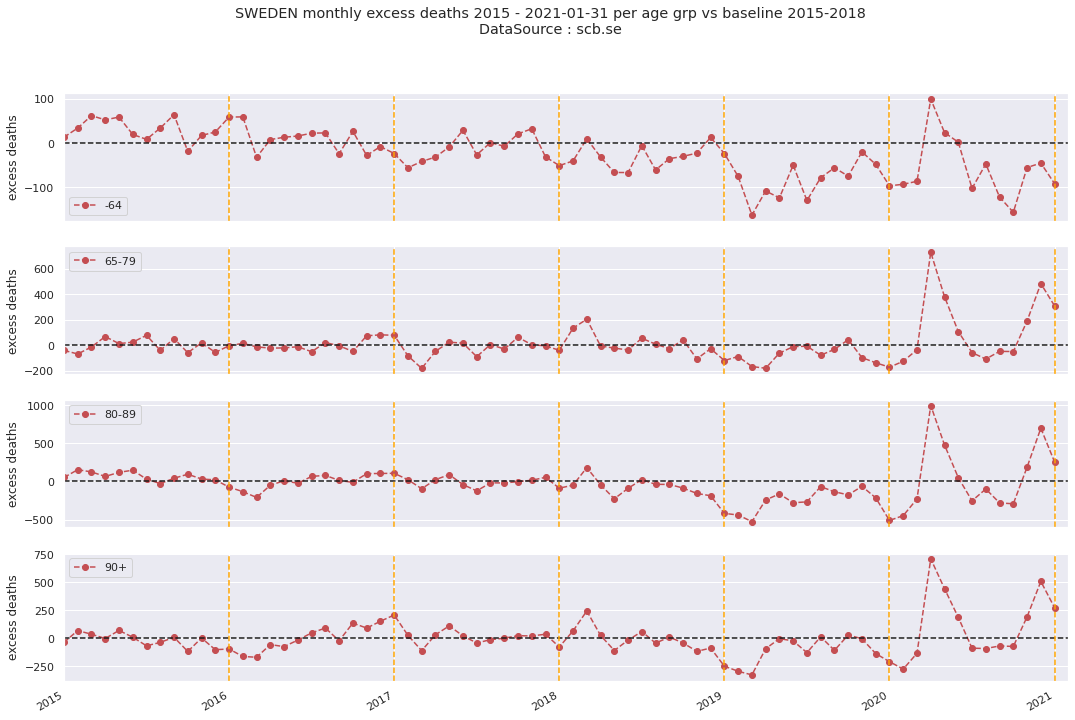

In [334]:
from pandas.tseries.offsets import MonthEnd
title='SWEDEN monthly excess deaths 2015 - {} per age grp vs baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())

axes = monthly_excess.plot(figsize=(18,12),style='ro--',subplots=True,title=title)

for a in axes:
    a.set_ylabel('excess deaths')
    a.axhline(0,ls='dashed',color='k')
    
    for i in range(len(monthly_excess.index))[::12]:
        a.axvline(monthly_excess.index[i],ls='dashed',color='orange')
        
plt.savefig('SCB_timeline_age_grp_monthly_excess.jpg',format='jpg')

In [335]:
monthly_cum_excess = monthly_excess.groupby(monthly_excess.index.year).cumsum()
monthly_cum_excess

-64        65-79       80-89          90+
2015-01-31   13.415077   -38.643823   52.527607   -35.859354
2015-02-28   47.561749  -105.475269  207.273860    33.128953
2015-03-31  109.800383  -117.279657  332.969144    69.714381
2015-04-30  162.554731   -47.777486  398.962783    67.992659
2015-05-31  221.566645   -33.348865  519.013839   138.453465
...                ...          ...         ...          ...
2020-10-31 -576.700714   636.049882 -586.353212   403.916806
2020-11-30 -631.739203   827.346684 -397.961921   595.827660
2020-12-31 -676.750520  1311.664916  300.854487  1103.686514
2021-01-31  -91.572725   309.370654  255.836033   273.244487
2021-02-28         NaN          NaN         NaN          NaN

[74 rows x 4 columns]

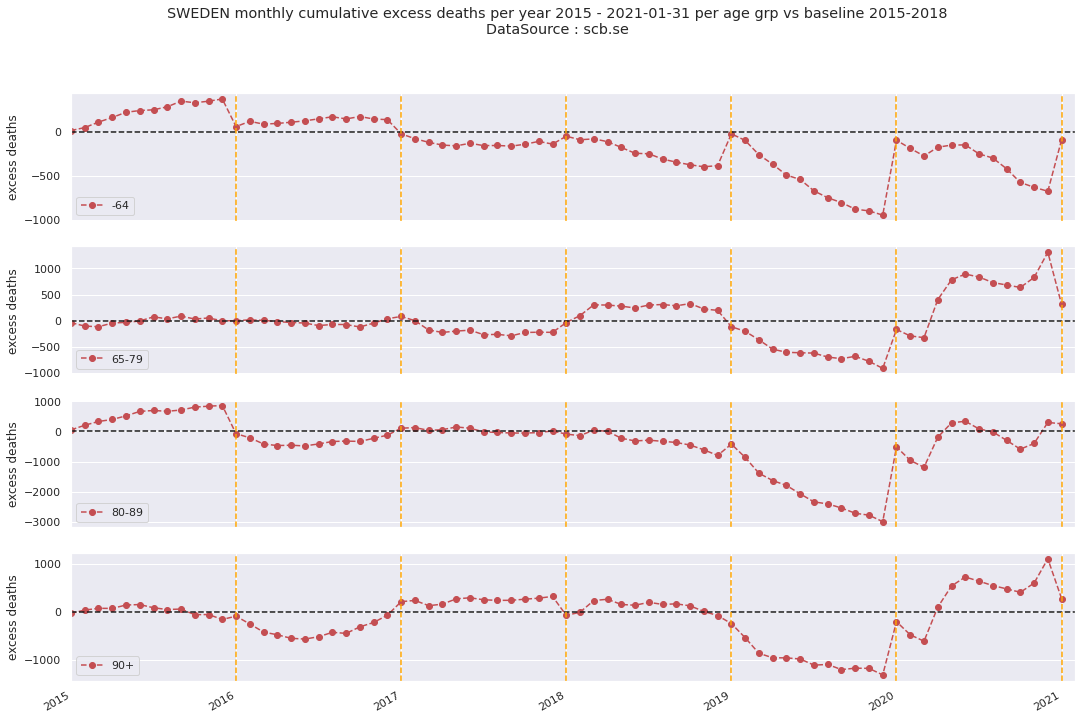

In [336]:
#### BUG! Identified : scb data error : see note on top of notebook ####
#### HOW CAN 90+ HAVE EXCESS DEATHS WHEN MORTALITY FOR THAT AGE GRP AS ABOVE IS BELOW SAME BASELINE....? ####
#### ONLY MORTALITY FOR 2020 IS IDENTICAL IN THE TWO COMPUTATIONS - MORTALITY FOR OTHER YEARS IS LOWER FOR ####
#### THE OTHER YEARS IN THE SECOND COMPUTATION ####

#### the first computation is correct ####

title='SWEDEN monthly cumulative excess deaths per year 2015 - {} per age grp vs baseline 2015-2018\nDataSource : scb.se'.format(
    (last_good_date + MonthEnd(0)).date())
axes = monthly_cum_excess.plot(figsize=(18,12),subplots=True,style='ro--',title=title)

for a in axes:
    a.axhline(0,ls='dashed',color='k')
    a.set_ylabel('excess deaths')
    a.legend(loc='lower left')
    
    for i in range(len(monthly_cum_excess.index))[::12]:
        a.axvline(monthly_cum_excess.index[i],ls='dashed',color='orange')
        
plt.savefig('SCB_timeline_age_grp_monthly_cumulative_excess.jpg',format='jpg')

In [337]:
#### scb data error, cmp next cell - this one has the correct data for all years ###
mort_by_official = age_mortality_flat.loc['2015':]
mort_by_official

scb_prel_age_bin     -64       65-79     80-89     90+  
year                                                    
2015              0.001393  0.017732  0.078093  0.221373
2016              0.001363  0.017759  0.075700  0.222263
2017              0.001328  0.017585  0.076037  0.226129
2018              0.001298  0.017865  0.074139  0.222186
2019              0.001230  0.017137  0.069221  0.210232
2020              0.001264  0.018582  0.076659  0.233598

In [338]:
#### scb data error - this one has only 2020 correct (all data from prel data scb excel tabell 2)
mort_by_prel = monthly_age_grp_mortality_long[:-1].groupby(monthly_age_grp_mortality_long.index[:-1].year).sum()
mort_by_prel

-64     65-79     80-89       90+
2015  0.001393  0.017732  0.078093  0.221373
2016  0.001363  0.017759  0.075700  0.222263
2017  0.001328  0.017585  0.076037  0.226129
2018  0.001298  0.017865  0.074139  0.222186
2019  0.001230  0.017137  0.069221  0.210232
2020  0.001264  0.018582  0.076659  0.233598
2021  0.000110  0.001858  0.008126  0.025318

In [339]:
official_2015_2019 = dead_age_scb_prel_df.loc['2015':].unstack()
official_2015_2019

dead                     
scb_prel_age_bin  -64    65-79  80-89  90+  
year                                        
2015              10972  25708  32060  22167
2016              10870  26182  31431  22499
2017              10736  26340  31988  22908
2018              10602  27116  31800  22667
2019              10139  26279  30594  21754
2020              10455  28795  34574  24300

In [340]:
prel_2015_2021 = grp_daily_corrected.groupby(grp_daily_corrected.index.year).sum()
prel_2015_2021

-64    65-79    80-89      90+
date                                    
2015  10972.0  25708.0  32060.0  22167.0
2016  10870.0  26182.0  31431.0  22499.0
2017  10736.0  26340.0  31988.0  22908.0
2018  10602.0  27116.0  31800.0  22667.0
2019  10139.0  26279.0  30594.0  21754.0
2020  10455.0  28795.0  34574.0  24300.0
2021   1322.0   4016.0   5030.0   3591.0

In [341]:
official_2015_2019.index = range(2015,2021)

official_2015_2019.index.name='year'

official_2015_2019 = official_2015_2019.droplevel(0,axis=1)

official_2015_2019

scb_prel_age_bin  -64    65-79  80-89  90+  
year                                        
2015              10972  25708  32060  22167
2016              10870  26182  31431  22499
2017              10736  26340  31988  22908
2018              10602  27116  31800  22667
2019              10139  26279  30594  21754
2020              10455  28795  34574  24300

In [342]:
prel_2015_2021 - official_2015_2019

-64         65-79         80-89           90+
2015  3.637979e-12  2.910383e-11 -2.146407e-10  1.455192e-11
2016 -1.273293e-11  1.091394e-11 -1.091394e-11 -1.818989e-11
2017 -1.818989e-12 -3.274181e-11  0.000000e+00 -2.182787e-11
2018  1.091394e-11 -7.275958e-12 -1.818989e-11  3.274181e-11
2019  3.637979e-12  2.182787e-11  3.274181e-11  7.275958e-12
2020 -1.455192e-11  0.000000e+00 -5.093170e-11  1.600711e-10
2021           NaN           NaN           NaN           NaN

In [343]:
official_2015_2019.sum(axis=1)

year
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
dtype: int64

In [344]:
prel_2015_2021.sum(axis=1)

date
2015    90907.0
2016    90982.0
2017    91972.0
2018    92185.0
2019    88766.0
2020    98124.0
2021    13959.0
dtype: float64

In [345]:
monthly_cum_excess

-64        65-79       80-89          90+
2015-01-31   13.415077   -38.643823   52.527607   -35.859354
2015-02-28   47.561749  -105.475269  207.273860    33.128953
2015-03-31  109.800383  -117.279657  332.969144    69.714381
2015-04-30  162.554731   -47.777486  398.962783    67.992659
2015-05-31  221.566645   -33.348865  519.013839   138.453465
...                ...          ...         ...          ...
2020-10-31 -576.700714   636.049882 -586.353212   403.916806
2020-11-30 -631.739203   827.346684 -397.961921   595.827660
2020-12-31 -676.750520  1311.664916  300.854487  1103.686514
2021-01-31  -91.572725   309.370654  255.836033   273.244487
2021-02-28         NaN          NaN         NaN          NaN

[74 rows x 4 columns]

In [346]:
monthly_cum_excess.sum(axis=1)

2015-01-31      -8.560492
2015-02-28     182.489293
2015-03-31     395.204252
2015-04-30     581.732687
2015-05-31     845.685084
                 ...     
2020-10-31    -123.087239
2020-11-30     393.473220
2020-12-31    2039.455396
2021-01-31     746.878448
2021-02-28       0.000000
Freq: M, Length: 74, dtype: float64

In [347]:
def plot_excess_timeline(df,title=''):
    
    year_grps = df.groupby(df.index.year)

    yrs = range(2015,2022)

    plt.figure(figsize=(18,12))
    plt.title(title)
    plt.ylabel('excess deaths')
    plt.xlabel('year')

    colors = ['blue','green','orange','red']

    for y in yrs:

        yg = year_grps.get_group(y)

        for i, ag in enumerate(yg.columns):

            if y == 2015:
                label = ag
            else:
                label = ''

            plt.plot(yg[ag],'o--',color=colors[i],label=label)
            
        if y != yrs[-1]:
            label = 'EOY' if y == yrs[0] else ''
            plt.axvline(yg.index[-1],color='k',ls='dashed',label=label)
    

    plt.legend()
    plt.axhline(0,color='k',ls='dashed')



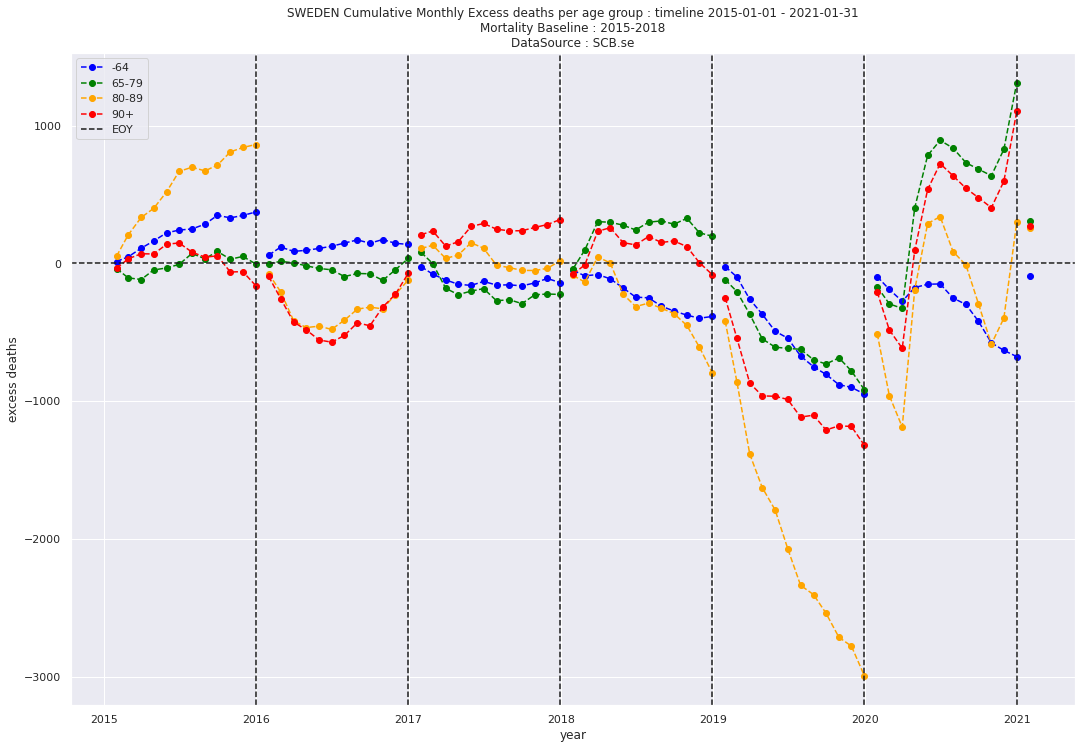

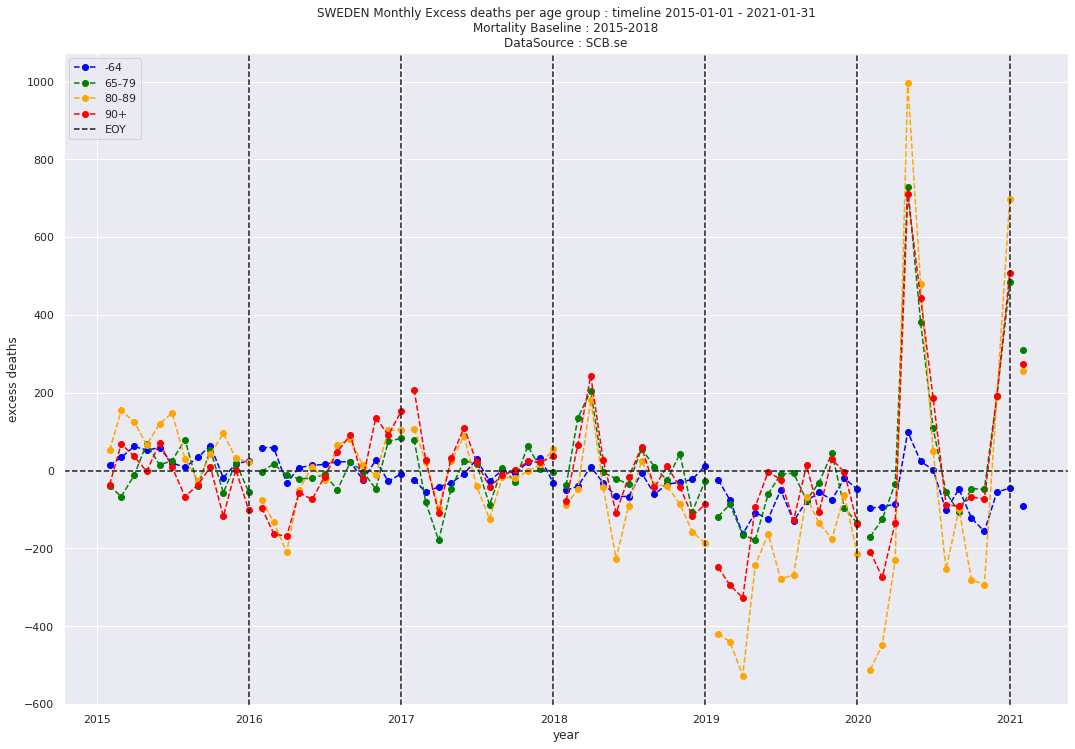

In [348]:
leg = '\nMortality Baseline : 2015-2018'
cred = '\nDataSource : SCB.se'
title = 'SWEDEN Cumulative Monthly Excess deaths per age group : timeline 2015-01-01 - {}'.format(
    monthly_cum_excess.index[-2].date()) + leg + cred

plot_excess_timeline(monthly_cum_excess,title)
plt.savefig('SCB_excess_cum_excess_2015_YTD_timeline.jpg',format='jpg')

title = 'SWEDEN Monthly Excess deaths per age group : timeline 2015-01-01 - {}'.format(
    monthly_cum_excess.index[-2].date()) + leg + cred

plot_excess_timeline(monthly_excess,title)
plt.savefig('SCB_excess_excess_2015_YTD_timeline.jpg',format='jpg')



In [349]:
##### FHM #####

In [350]:
fhm_file = pd.ExcelFile('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')
fhm_file.sheet_names

['Antal per dag region',
 'Antal avlidna per dag',
 'Antal intensivvårdade per dag',
 'Totalt antal per region',
 'Totalt antal per kön',
 'Totalt antal per åldersgrupp',
 'Veckodata Region',
 'Veckodata Kommun_stadsdel',
 'Veckodata Riket',
 'FOHM 23 Feb 2021']

In [351]:
fhm_daily_dead = fhm_file.parse(sheet_name='Antal avlidna per dag')
fhm_daily_dead.tail(20)

Datum_avliden  Antal_avlidna
330  2021-02-04 00:00:00             28
331  2021-02-05 00:00:00             34
332  2021-02-06 00:00:00             31
333  2021-02-07 00:00:00             27
334  2021-02-08 00:00:00             38
335  2021-02-09 00:00:00             24
336  2021-02-10 00:00:00             26
337  2021-02-11 00:00:00             30
338  2021-02-12 00:00:00             14
339  2021-02-13 00:00:00             16
340  2021-02-14 00:00:00             12
341  2021-02-15 00:00:00             10
342  2021-02-16 00:00:00              3
343  2021-02-17 00:00:00             10
344  2021-02-18 00:00:00              5
345  2021-02-19 00:00:00              0
346  2021-02-20 00:00:00              4
347  2021-02-21 00:00:00              3
348  2021-02-22 00:00:00              1
349       Uppgift saknas             39

In [352]:
fhm_daily_dead.sum()

Antal_avlidna    12713
dtype: int64

In [353]:
fhm_dead_unknowns = fhm_daily_dead.iloc[-1].copy()
fhm_daily_dead_knowns = fhm_daily_dead.iloc[:-1].copy()
fhm_dead_unknowns

Datum_avliden    Uppgift saknas
Antal_avlidna                39
Name: 349, dtype: object

In [354]:
fhm_daily_dead_knowns

Datum_avliden  Antal_avlidna
0    2020-03-11 00:00:00              1
1    2020-03-12 00:00:00              0
2    2020-03-13 00:00:00              1
3    2020-03-14 00:00:00              1
4    2020-03-15 00:00:00              2
..                   ...            ...
344  2021-02-18 00:00:00              5
345  2021-02-19 00:00:00              0
346  2021-02-20 00:00:00              4
347  2021-02-21 00:00:00              3
348  2021-02-22 00:00:00              1

[349 rows x 2 columns]

In [355]:
add_ons = fhm_dead_unknowns.loc['Antal_avlidna'] * (fhm_daily_dead_knowns['Antal_avlidna'] / 
                                                    fhm_daily_dead_knowns['Antal_avlidna'].sum())
#fhm_dead_unknowns.loc['Antal_avlidna']
fhm_daily_dead_corrected = add_ons + fhm_daily_dead_knowns['Antal_avlidna']
print (fhm_daily_dead_corrected.sum())
fhm_daily_dead_corrected

12713.0


0      1.003077
1      0.000000
2      1.003077
3      1.003077
4      2.006154
         ...   
344    5.015386
345    0.000000
346    4.012309
347    3.009231
348    1.003077
Name: Antal_avlidna, Length: 349, dtype: float64

In [356]:
### NOTE - using only the deaths with known dates, skipping the 40 with unknown date ###
fhm_daily_dead_knowns['Datum_avliden'] = pd.to_datetime(fhm_daily_dead_knowns['Datum_avliden'])
fhm_daily_dead_knowns.set_index('Datum_avliden',inplace=True)
fhm_daily_dead_knowns

Antal_avlidna
Datum_avliden               
2020-03-11                 1
2020-03-12                 0
2020-03-13                 1
2020-03-14                 1
2020-03-15                 2
...                      ...
2021-02-18                 5
2021-02-19                 0
2021-02-20                 4
2021-02-21                 3
2021-02-22                 1

[349 rows x 1 columns]

In [357]:
fhm_daily_dead_knowns.sum()

Antal_avlidna    12674
dtype: int64

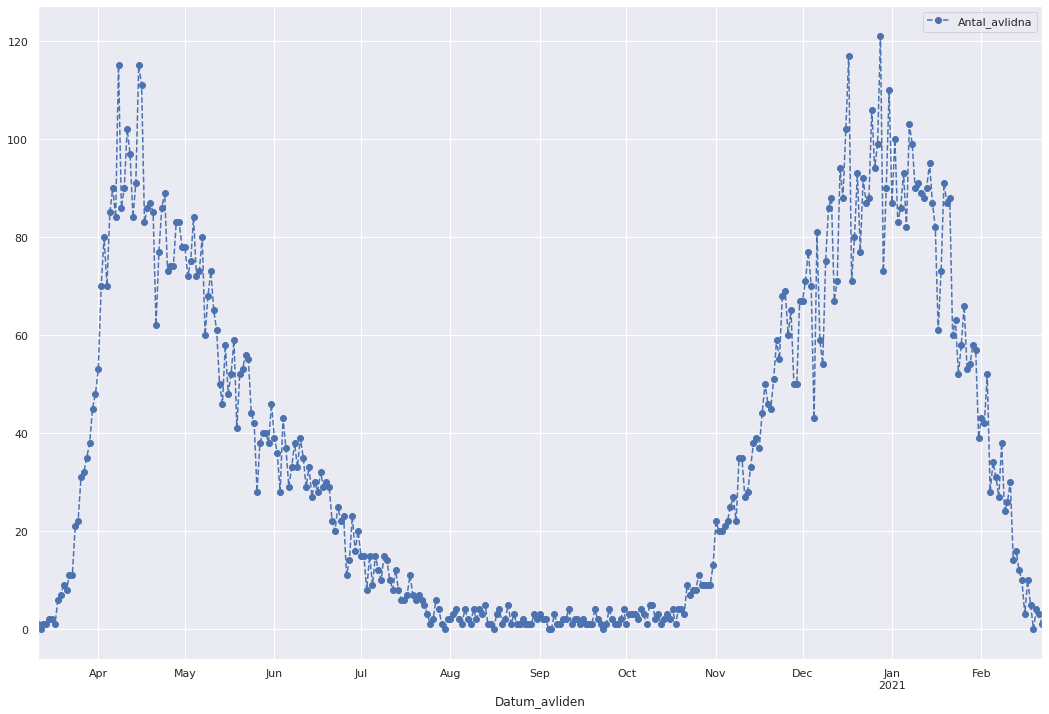

In [358]:
fhm_daily_dead_knowns.plot(figsize=(18,12),style='o--')
plt.savefig('SCB_excess_fhm_daily_dead.jpg',format='jpg')

In [359]:
fhm_weekly_dead = fhm_daily_dead_knowns.resample('W').sum()
fhm_weekly_dead

Antal_avlidna
Datum_avliden               
2020-03-15                 5
2020-03-22                44
2020-03-29               190
2020-04-05               451
2020-04-12               664
2020-04-19               657
2020-04-26               546
2020-05-03               543
2020-05-10               510
2020-05-17               380
2020-05-24               360
2020-05-31               272
2020-06-07               245
2020-06-14               234
2020-06-21               200
2020-06-28               138
2020-07-05                98
2020-07-12                84
2020-07-19                57
2020-07-26                30
2020-08-02                18
2020-08-09                18
2020-08-16                16
2020-08-23                19
2020-08-30                10
2020-09-06                12
2020-09-13                13
2020-09-20                12
2020-09-27                11
2020-10-04                17
2020-10-11                22
2020-10-18                16
2020-10-25                43
2020-11-01                82
2020-11-08               157
2020-11-15               235
2020-11-22               332
2020-11-29               417
2020-12-06               476
2020-12-13               500
2020-12-20               645
2020-12-27               643
2021-01-03               664
2021-01-10               644
2021-01-17               592
2021-01-24               514
2021-01-31               385
2021-02-07               257
2021-02-14               160
2021-02-21                35
2021-02-28                 1

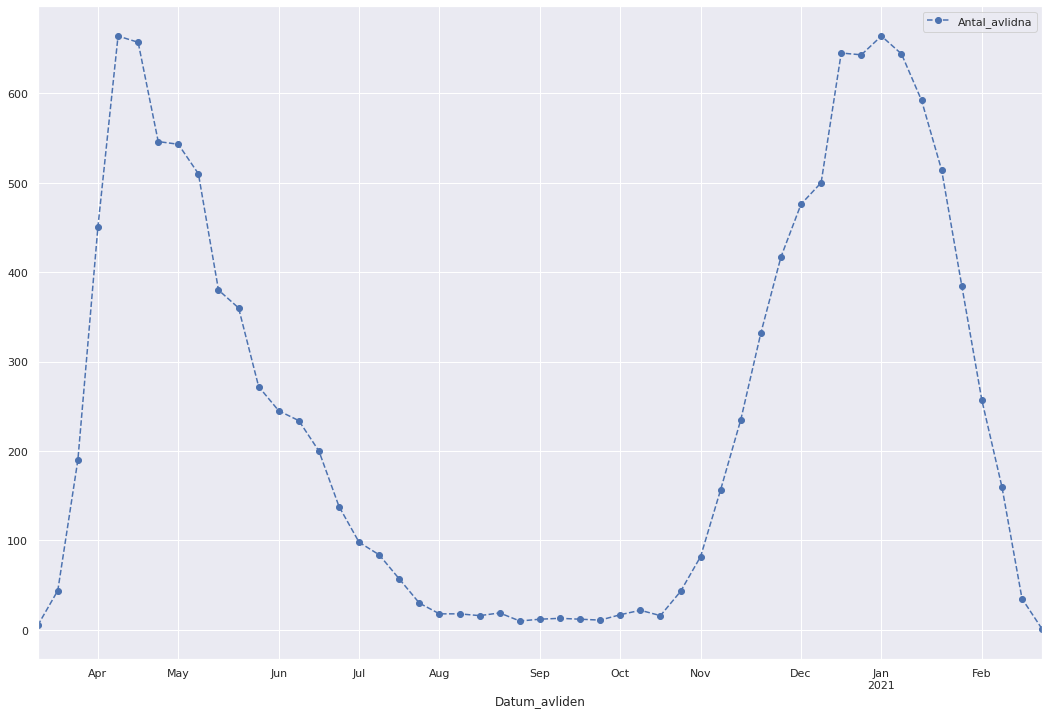

In [360]:
fhm_weekly_dead.plot(style='o--',figsize=(18,12))
plt.savefig('SCB_excess_fhm_weekly_dead.jpg',format='jpg')

In [361]:
fhm_positive = fhm_file.parse(sheet_name='Antal per dag region',usecols=[0,1],parse_dates=True,index_col=0)
fhm_positive


Totalt_antal_fall
Statistikdatum                   
2020-02-04                      1
2020-02-05                      0
2020-02-06                      0
2020-02-07                      0
2020-02-08                      0
...                           ...
2021-02-18                   4139
2021-02-19                   4030
2021-02-20                   2783
2021-02-21                   1596
2021-02-22                   2530

[385 rows x 1 columns]

In [362]:
fhm_weekly_positive = fhm_positive.resample('W').sum()
fhm_weekly_positive

Totalt_antal_fall
Statistikdatum                   
2020-02-09                      1
2020-02-16                      0
2020-02-23                      0
2020-03-01                     13
2020-03-08                    211
2020-03-15                    838
2020-03-22                    924
2020-03-29                   1957
2020-04-05                   3229
2020-04-12                   3740
2020-04-19                   3751
2020-04-26                   4202
2020-05-03                   3832
2020-05-10                   4153
2020-05-17                   3869
2020-05-24                   3659
2020-05-31                   4281
2020-06-07                   6021
2020-06-14                   7123
2020-06-21                   7073
2020-06-28                   7459
2020-07-05                   4275
2020-07-12                   2179
2020-07-19                   1622
2020-07-26                   1316
2020-08-02                   1556
2020-08-09                   2014
2020-08-16                   2052
2020-08-23                   1687
2020-08-30                   1200
2020-09-06                   1332
2020-09-13                   1592
2020-09-20                   2080
2020-09-27                   2919
2020-10-04                   3642
2020-10-11                   4278
2020-10-18                   5620
2020-10-25                   9155
2020-11-01                  18474
2020-11-08                  25405
2020-11-15                  31319
2020-11-22                  31944
2020-11-29                  35560
2020-12-06                  36839
2020-12-13                  43631
2020-12-20                  46178
2020-12-27                  37134
2021-01-03                  41329
2021-01-10                  39464
2021-01-17                  28955
2021-01-24                  23247
2021-01-31                  20673
2021-02-07                  19618
2021-02-14                  21306
2021-02-21                  23638
2021-02-28                   2530

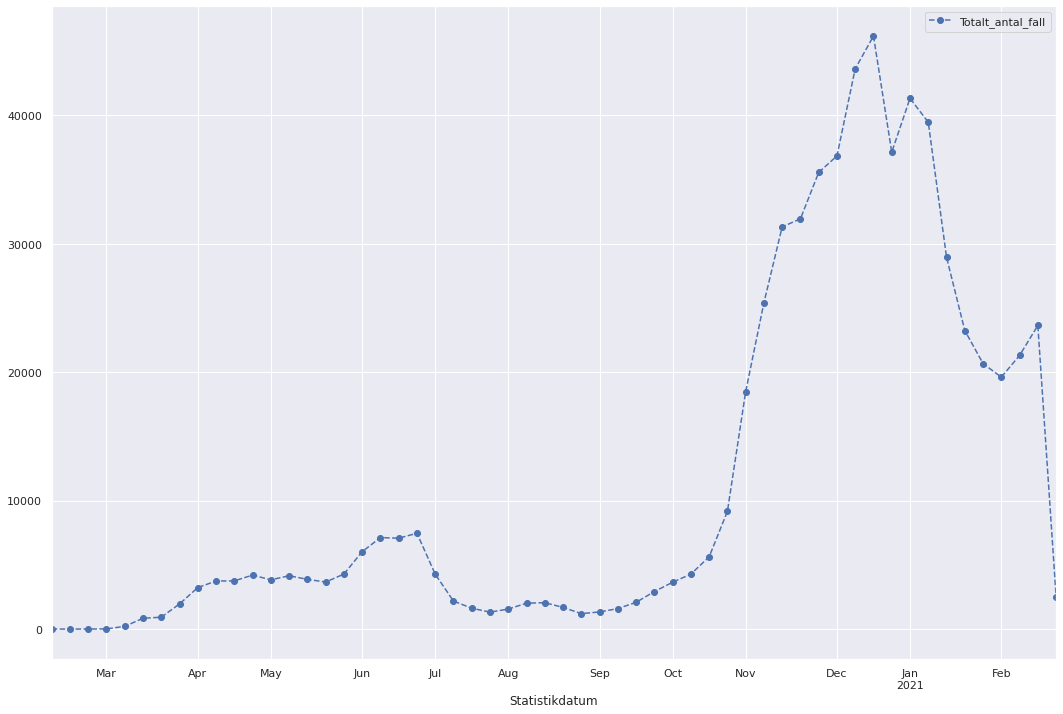

In [363]:
fhm_weekly_positive.plot(style='o--',figsize=(18,12))
plt.savefig('SCB_excess_fhm_weekly_positive.jpg',format='jpg')

In [364]:
fhm_icu = fhm_file.parse(sheet_name='Antal intensivvårdade per dag',parse_dates=True,index_col=0)
fhm_icu

Antal_intensivvårdade
Datum_vårdstart                       
2020-03-06                           1
2020-03-07                           1
2020-03-08                           1
2020-03-09                           0
2020-03-10                           2
...                                ...
2021-02-18                          12
2021-02-19                          12
2021-02-20                          13
2021-02-21                           9
2021-02-22                           8

[354 rows x 1 columns]

In [365]:
fhm_icu_weekly = fhm_icu.resample('W').sum()
fhm_icu_weekly

Antal_intensivvårdade
Datum_vårdstart                       
2020-03-08                           3
2020-03-15                          16
2020-03-22                          88
2020-03-29                         238
2020-04-05                         277
2020-04-12                         289
2020-04-19                         250
2020-04-26                         238
2020-05-03                         188
2020-05-10                         156
2020-05-17                         124
2020-05-24                         111
2020-05-31                         122
2020-06-07                         123
2020-06-14                          91
2020-06-21                          74
2020-06-28                          56
2020-07-05                          34
2020-07-12                          14
2020-07-19                          14
2020-07-26                          12
2020-08-02                          11
2020-08-09                          16
2020-08-16                          13
2020-08-23                           8
2020-08-30                           7
2020-09-06                           8
2020-09-13                           8
2020-09-20                           7
2020-09-27                           8
2020-10-04                          14
2020-10-11                          22
2020-10-18                          19
2020-10-25                          37
2020-11-01                          59
2020-11-08                         110
2020-11-15                         120
2020-11-22                         153
2020-11-29                         170
2020-12-06                         166
2020-12-13                         165
2020-12-20                         187
2020-12-27                         206
2021-01-03                         233
2021-01-10                         186
2021-01-17                         154
2021-01-24                         125
2021-01-31                         110
2021-02-07                         104
2021-02-14                         104
2021-02-21                          90
2021-02-28                           8

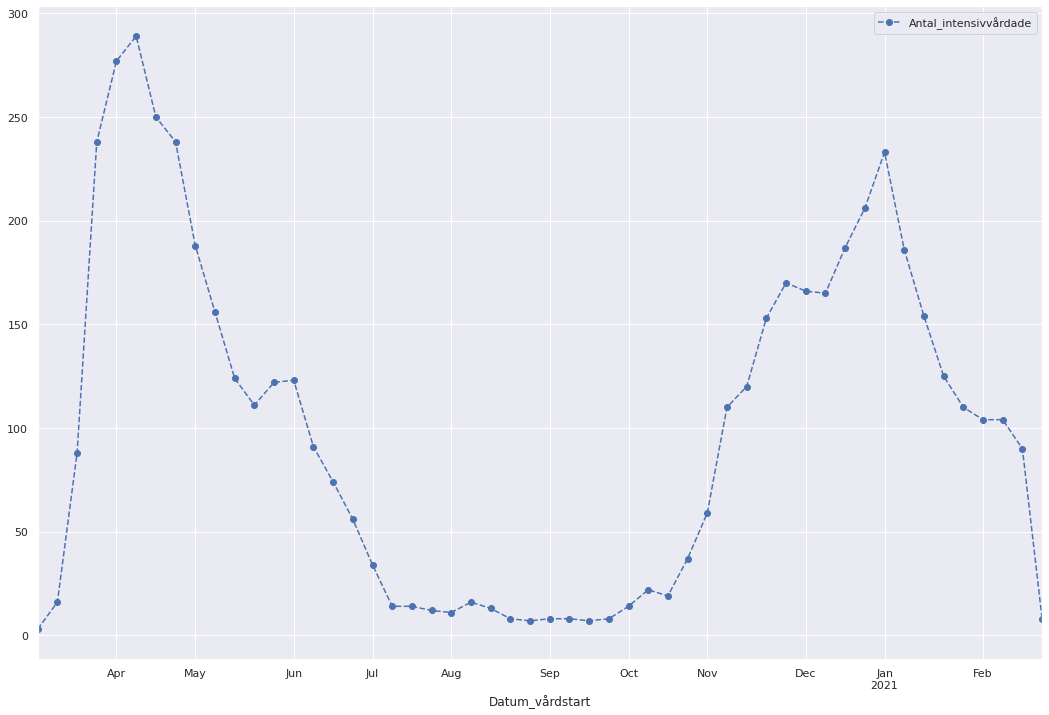

In [366]:
fhm_icu_weekly.plot(style='o--',figsize=(18,12))
plt.savefig('SCB_excess_fhm_weekly_icu.jpg',format='jpg')

In [367]:
fhm_age_grp_impact = fhm_file.parse(sheet_name='Totalt antal per åldersgrupp',skipfooter=1)
fhm_age_grp_impact['10_year_bin'] = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']
fhm_age_grp_impact.set_index('10_year_bin',inplace=True)
fhm_age_grp_impact.drop('Åldersgrupp',axis=1,inplace=True)
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      10342                            22   
10-19                    66883                            36   
20-29                   113422                           145   
30-39                   113722                           203   
40-49                   116270                           494   
50-59                   106423                          1117   
60-69                    56203                          1471   
70-79                    27610                          1315   
80-89                    21036                           336   
90+                      10119                             7   

             Totalt_antal_avlidna  
10_year_bin                        
0-9                             7  
10-19                           3  
20-29                          18  
30-39                          33  
40-49                          82  
50-59                         269  
60-69                         738  
70-79                        2679  
80-89                        5350  
90+                          3534

In [368]:
ten_year_bins = pd.cut(pop_age_df.loc['2020'].index,[-1,10,20,30,40,50,60,70,80,90,100],
       labels=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])

ten_year_bins

['0-9', '0-9', '0-9', '0-9', '0-9', ..., '90+', '90+', '90+', '90+', '90+']
Length: 101
Categories (10, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '60-69' < '70-79' < '80-89' < '90+']

In [369]:
twenty_twenty_pop = pop_age_df.loc['2020'].copy()
twenty_twenty_pop['10_year_bin'] = ten_year_bins
twenty_twenty_pop = twenty_twenty_pop.groupby('10_year_bin').sum()
twenty_twenty_pop

pop
10_year_bin         
0-9          1327950
10-19        1183324
20-29        1339497
30-39        1372716
40-49        1300090
50-59        1295380
60-69        1100438
70-79         969626
80-89         408291
90+            81171

In [370]:
dead_age_df

dead scb_prel_age_bin
year num_age                       
2002 0         313              -64
     1          24              -64
     2          25              -64
     3          10              -64
     4          10              -64
...            ...              ...
2020 96       1789              90+
     97       1270              90+
     98       1065              90+
     99        759              90+
     100      1247              90+

[1919 rows x 2 columns]

In [371]:
dead_age_df['10_y_bin'] = pd.cut(
    dead_age_df.index.get_level_values(1),[-1,9,19,29,39,49,59,69,79,89,100],labels=fhm_age_grp_impact.index.values)

dead_age_df

dead scb_prel_age_bin 10_y_bin
year num_age                                
2002 0         313              -64      0-9
     1          24              -64      0-9
     2          25              -64      0-9
     3          10              -64      0-9
     4          10              -64      0-9
...            ...              ...      ...
2020 96       1789              90+      90+
     97       1270              90+      90+
     98       1065              90+      90+
     99        759              90+      90+
     100      1247              90+      90+

[1919 rows x 3 columns]

In [372]:
baseline_15_18_10_y_deaths = dead_age_df.loc['2015' : '2018'].groupby(
    ['year','10_y_bin']).sum().groupby('10_y_bin').mean()


In [373]:
baseline_15_18_mort =  baseline_15_18_10_y_deaths['dead'] / twenty_twenty_pop['pop']
baseline_15_18_mort

10_y_bin
0-9      0.000279
10-19    0.000150
20-29    0.000484
30-39    0.000545
40-49    0.001128
50-59    0.002863
60-69    0.008925
70-79    0.020823
80-89    0.077934
90+      0.277935
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


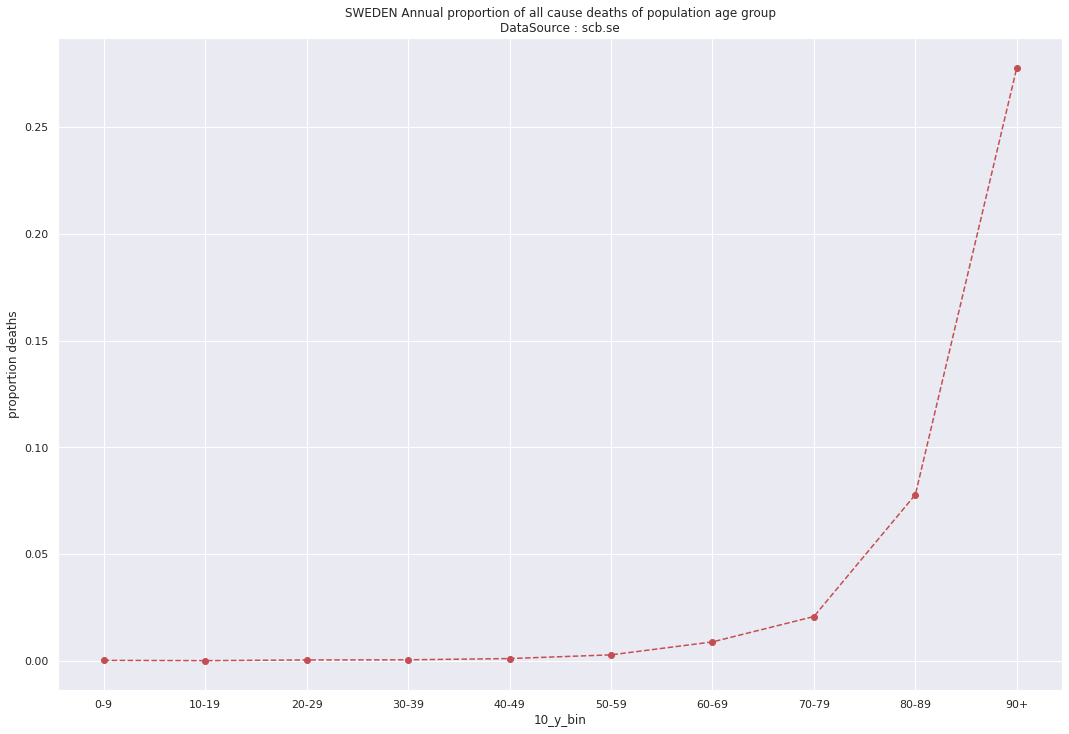

In [374]:
title = 'SWEDEN Annual proportion of all cause deaths of population age group\nDataSource : scb.se'
baseline_15_18_mort.plot(figsize=(18,12),style='ro--',title=title)
plt.xticks(range(len(baseline_15_18_mort)),baseline_15_18_mort.index)
plt.ylabel('proportion deaths')
plt.savefig('SCB_excess_proportion_all_cause_deaths.jpg',format='jpg')

In [375]:
### NOTE THAT SINCE THE AGE GRP IMPACT NUMBERS EXTEND TO 2021, THE FRACTION BELOW DOES NOT SHOW POPULATION 
### IMPACT 2020 ###

prop_impacted_YTD = fhm_age_grp_impact.div(twenty_twenty_pop['pop'],axis=0)
prop_impacted_YTD['CFR'] = fhm_age_grp_impact['Totalt_antal_avlidna'] / fhm_age_grp_impact['Totalt_antal_fall']

prop_impacted_YTD['baseline_15_18_all_cause_mortality'] = baseline_15_18_mort
prop_impacted_YTD['covid_base_ratio'] = prop_impacted_YTD['Totalt_antal_avlidna'] / prop_impacted_YTD['baseline_15_18_all_cause_mortality']
prop_impacted_YTD

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                   0.007788                      0.000017   
10-19                 0.056521                      0.000030   
20-29                 0.084675                      0.000108   
30-39                 0.082845                      0.000148   
40-49                 0.089432                      0.000380   
50-59                 0.082156                      0.000862   
60-69                 0.051073                      0.001337   
70-79                 0.028475                      0.001356   
80-89                 0.051522                      0.000823   
90+                   0.124663                      0.000086   

             Totalt_antal_avlidna       CFR  \
10_year_bin                                   
0-9                      0.000005  0.000677   
10-19                    0.000003  0.000045   
20-29                    0.000013  0.000159   
30-39                    0.000024  0.000290   
40-49                    0.000063  0.000705   
50-59                    0.000208  0.002528   
60-69                    0.000671  0.013131   
70-79                    0.002763  0.097030   
80-89                    0.013103  0.254326   
90+                      0.043538  0.349244   

             baseline_15_18_all_cause_mortality  covid_base_ratio  
10_year_bin                                                        
0-9                                    0.000279          0.018906  
10-19                                  0.000150          0.016854  
20-29                                  0.000484          0.027778  
30-39                                  0.000545          0.044103  
40-49                                  0.001128          0.055935  
50-59                                  0.002863          0.072536  
60-69                                  0.008925          0.075139  
70-79                                  0.020823          0.132685  
80-89                                  0.077934          0.168135  
90+                                    0.277935          0.156647

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


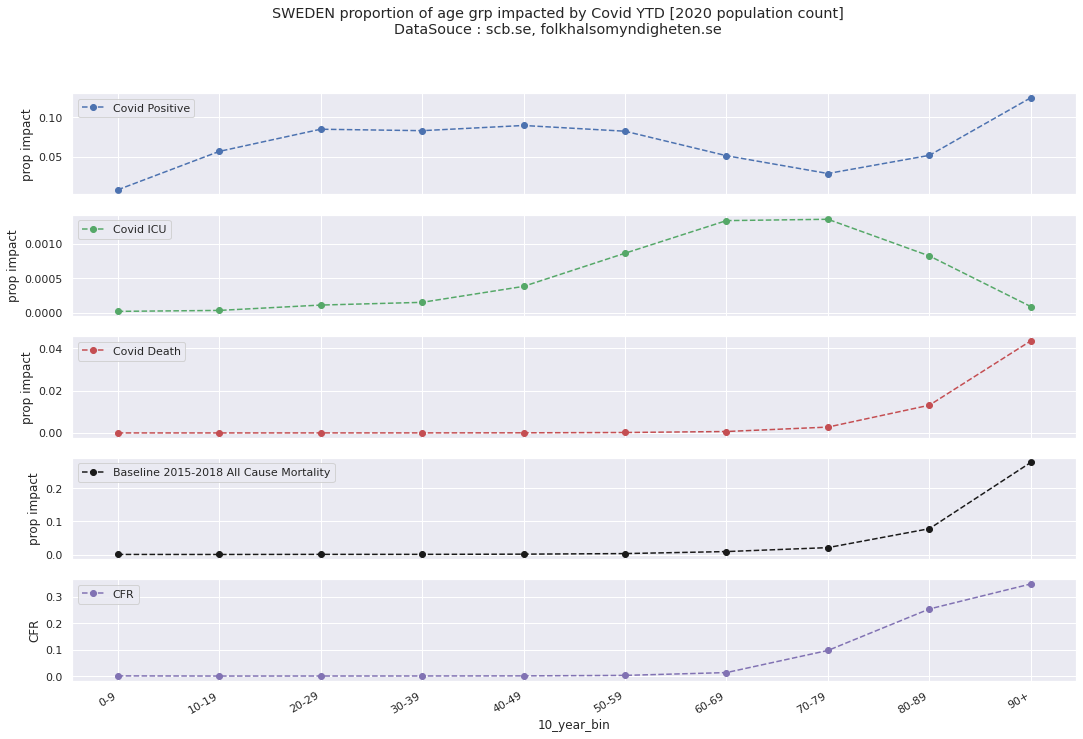

In [376]:
creds = '\nDataSouce : scb.se, folkhalsomyndigheten.se'
title = 'SWEDEN proportion of age grp impacted by Covid YTD [2020 population count]' + creds

legend = ['Covid Positive','Covid ICU','Covid Death','Baseline 2015-2018 All Cause Mortality','CFR']

axes = prop_impacted_YTD.plot(subplots=True,figsize=(18,12),style=['bo--','go--','ro--','ko--','mo--'],
                             title=title,label=legend,
                              y=['Totalt_antal_fall','Totalt_antal_intensivvårdade',
                                           'Totalt_antal_avlidna','baseline_15_18_all_cause_mortality','CFR'])


for i,a in enumerate(axes):
    a.set_xticks(range(len(prop_impacted_YTD)))
    a.set_xticklabels(prop_impacted_YTD.index)
    a.set_ylabel('prop impact')
    a.legend(loc='upper left')
    
axes[-1].set_ylabel('CFR')
plt.savefig('SCB_excess_covid_impact.jpg',format='jpg')

In [377]:
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      10342                            22   
10-19                    66883                            36   
20-29                   113422                           145   
30-39                   113722                           203   
40-49                   116270                           494   
50-59                   106423                          1117   
60-69                    56203                          1471   
70-79                    27610                          1315   
80-89                    21036                           336   
90+                      10119                             7   

             Totalt_antal_avlidna  
10_year_bin                        
0-9                             7  
10-19                           3  
20-29                          18  
30-39                          33  
40-49                          82  
50-59                         269  
60-69                         738  
70-79                        2679  
80-89                        5350  
90+                          3534

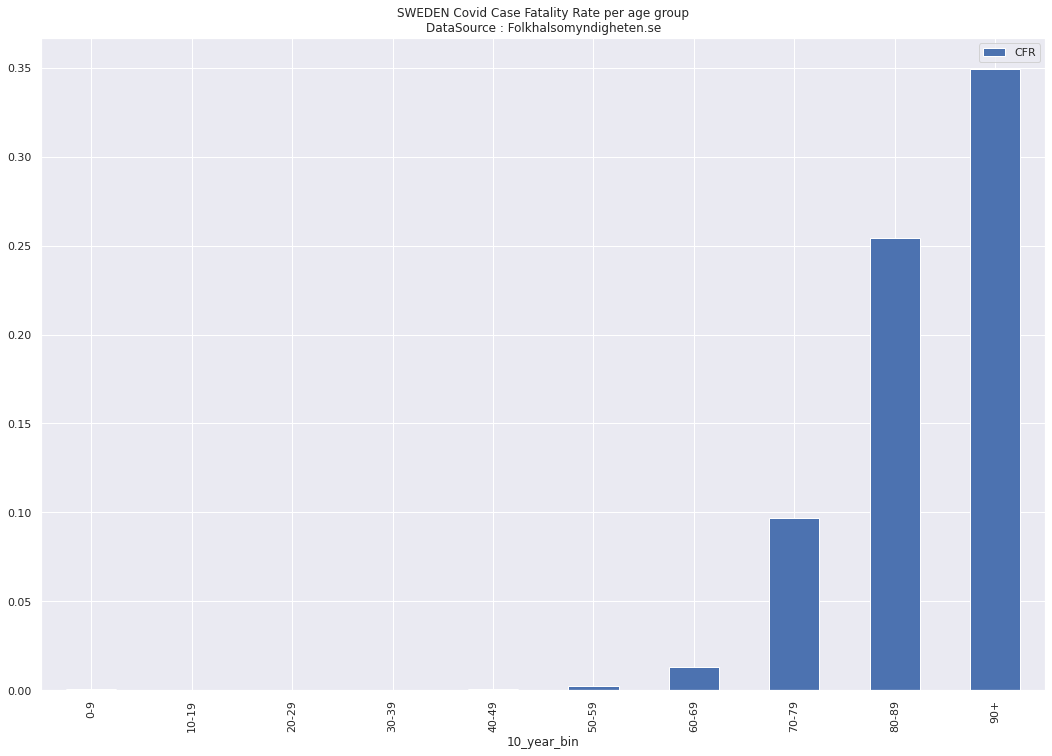

In [378]:
title = 'SWEDEN Covid Case Fatality Rate per age group\nDataSource : Folkhalsomyndigheten.se'
prop_impacted_YTD.plot(y='CFR',kind='bar',figsize=(18,12),title=title)
plt.savefig('scb_error_cfr.jpg',format='jpg')

In [379]:
fhm_age_grp_impact['bin_mid'] = range(5,100,10)
fhm_age_grp_impact

Totalt_antal_fall  Totalt_antal_intensivvårdade  \
10_year_bin                                                    
0-9                      10342                            22   
10-19                    66883                            36   
20-29                   113422                           145   
30-39                   113722                           203   
40-49                   116270                           494   
50-59                   106423                          1117   
60-69                    56203                          1471   
70-79                    27610                          1315   
80-89                    21036                           336   
90+                      10119                             7   

             Totalt_antal_avlidna  bin_mid  
10_year_bin                                 
0-9                             7        5  
10-19                           3       15  
20-29                          18       25  
30-39                          33       35  
40-49                          82       45  
50-59                         269       55  
60-69                         738       65  
70-79                        2679       75  
80-89                        5350       85  
90+                          3534       95

In [380]:
fhm_age_flat = np.repeat(fhm_age_grp_impact['bin_mid'],fhm_age_grp_impact['Totalt_antal_avlidna'])
fhm_age_flat

10_year_bin
0-9     5
0-9     5
0-9     5
0-9     5
0-9     5
       ..
90+    95
90+    95
90+    95
90+    95
90+    95
Name: bin_mid, Length: 12713, dtype: int64

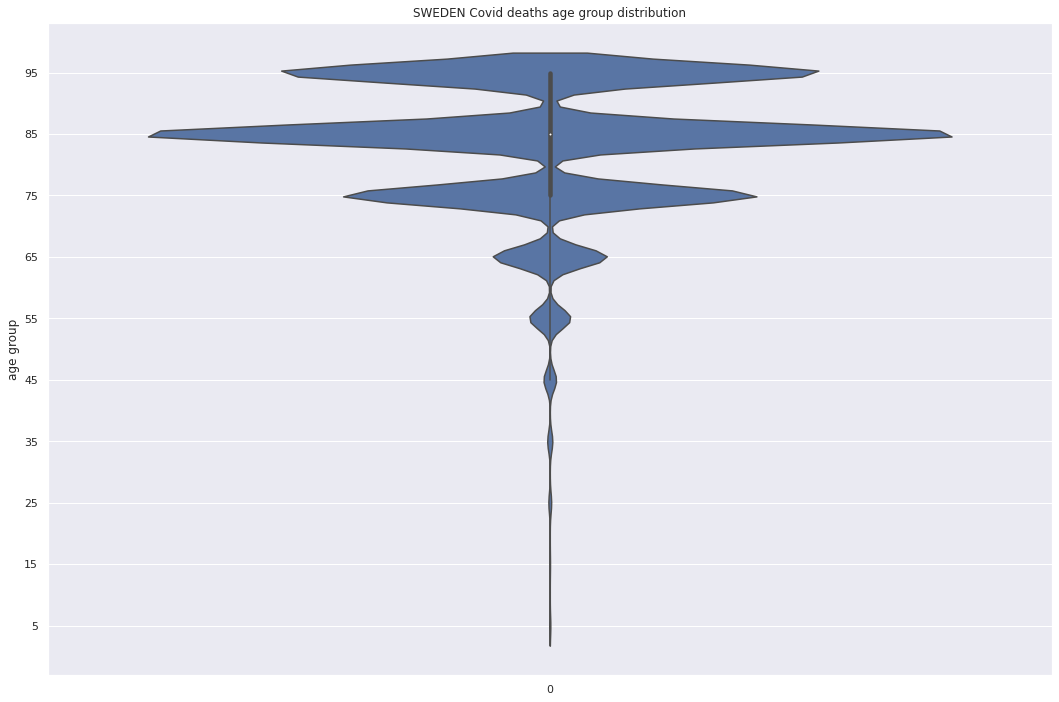

In [381]:
fig,ax = plt.subplots(figsize=(18,12))
sns.violinplot(data=fhm_age_flat,ax=ax)
plt.title('SWEDEN Covid deaths age group distribution')
plt.ylabel('age group')

_=plt.yticks(range(5,100,10),range(5,100,10))

In [382]:
fhm_age_flat.describe()

count    12713.000000
mean        83.343428
std         10.723191
min          5.000000
25%         75.000000
50%         85.000000
75%         95.000000
max         95.000000
Name: bin_mid, dtype: float64

In [383]:
def mid_bin(x):
    return pd.Series(np.array(x))

mids = mid_bin(dead_age_df['10_y_bin']).apply(lambda x : int(x[0] + '5'))

dead_age_df['mid_bin'] = mids.values
dead_age_df

dead scb_prel_age_bin 10_y_bin  mid_bin
year num_age                                         
2002 0         313              -64      0-9        5
     1          24              -64      0-9        5
     2          25              -64      0-9        5
     3          10              -64      0-9        5
     4          10              -64      0-9        5
...            ...              ...      ...      ...
2020 96       1789              90+      90+       95
     97       1270              90+      90+       95
     98       1065              90+      90+       95
     99        759              90+      90+       95
     100      1247              90+      90+       95

[1919 rows x 4 columns]

In [384]:
baseline_age_dead = dead_age_df.loc['2015':'2018'].groupby('mid_bin').mean()
baseline_age_dead

dead
mid_bin             
5          37.025000
15         17.800000
25         64.800000
35         74.825000
45        146.600000
55        370.850000
65        982.175000
75       2019.075000
85       3181.975000
95       2050.931818

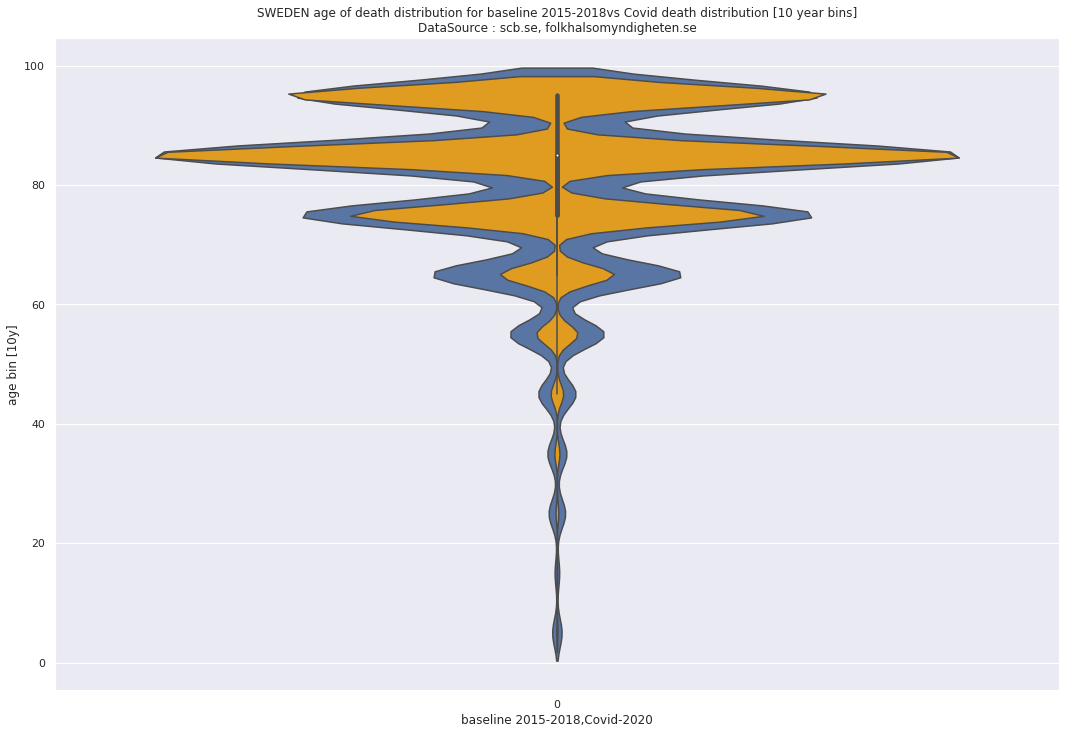

In [385]:
fig,ax = plt.subplots(figsize=(18,12))

title = 'SWEDEN age of death distribution for baseline 2015-2018' +\
'vs Covid death distribution [10 year bins]\nDataSource : scb.se, folkhalsomyndigheten.se'

baseline_age_flat = pd.Series(np.repeat(baseline_age_dead.index.values,np.round(baseline_age_dead['dead'],0).astype(int)))
sns.violinplot(data=baseline_age_flat,ax=ax)
sns.violinplot(data=fhm_age_flat,color='orange')
plt.title(title)
plt.ylabel('age bin [10y]')
plt.xlabel('baseline 2015-2018,Covid-2020')

plt.savefig('SCB_excess_covid_all_cause_deaths_dist_violin.jpg',format='jpg')

In [386]:
grp_corrected_weekly = grp_daily_corrected.loc['2015' : '2020']
grp_corrected_weekly = grp_corrected_weekly.resample('W').sum()
weekly_prop = grp_corrected_weekly.groupby(grp_corrected_weekly.index.year).transform(lambda x : x / x.sum())
weekly_prop

-64     65-79     80-89       90+
date                                              
2015-01-04  0.011649  0.011527  0.012647  0.013509
2015-01-11  0.019670  0.021334  0.021491  0.025140
2015-01-18  0.019956  0.020413  0.023013  0.022438
2015-01-25  0.020911  0.020813  0.022664  0.022530
2015-02-01  0.019670  0.022174  0.022949  0.022484
...              ...       ...       ...       ...
2020-12-06  0.016525  0.021847  0.023778  0.024639
2020-12-13  0.020762  0.021263  0.023600  0.022589
2020-12-20  0.017372  0.024801  0.025345  0.025016
2020-12-27  0.020974  0.023926  0.025434  0.025183
2021-01-03  1.000000  1.000000  1.000000  1.000000

[314 rows x 4 columns]

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

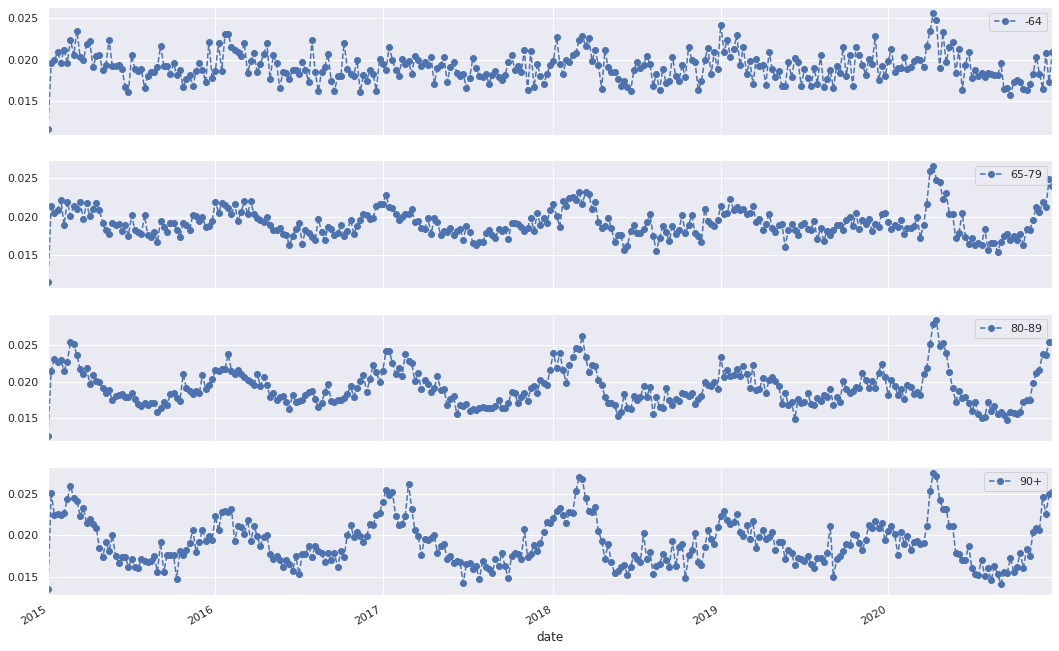

In [387]:
weekly_prop[:-1].plot(figsize=(18,12),subplots=True,style='o--')

<ipython-input-388-ec2b145167a7>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  last_4_weeks = weekly_prop.loc[weekly_prop.index.week.isin([49,50,51,52,53])]


<AxesSubplot:xlabel='date'>

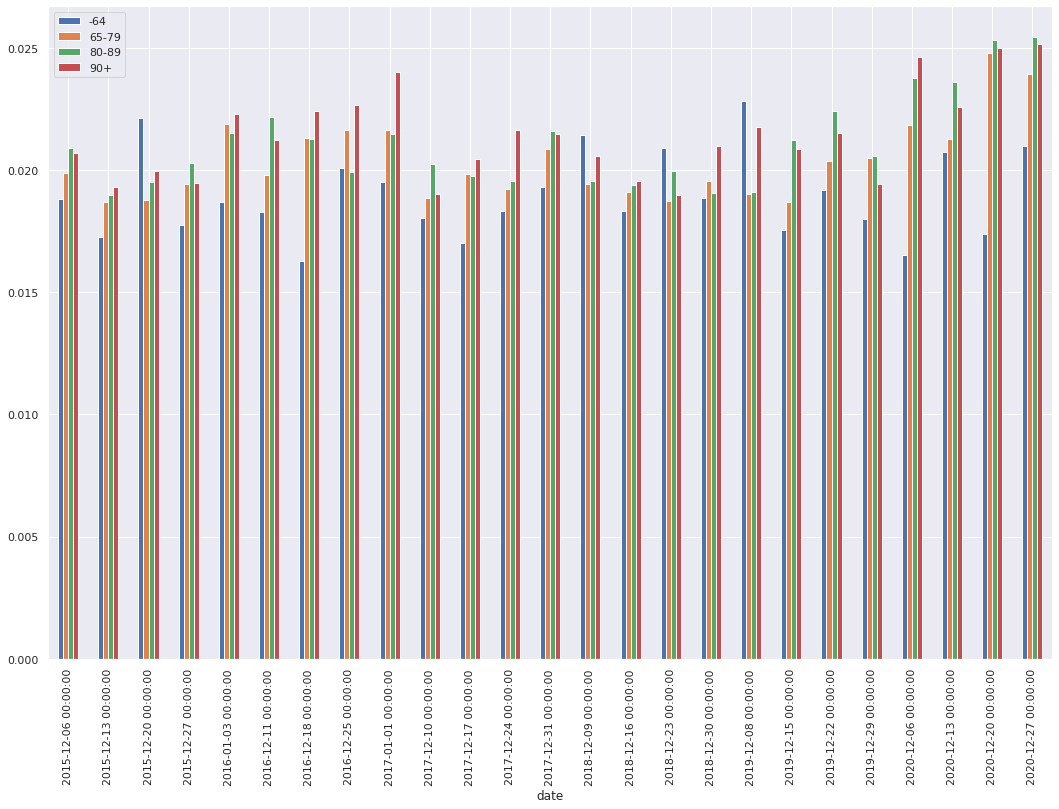

In [388]:
last_4_weeks = weekly_prop.loc[weekly_prop.index.week.isin([49,50,51,52,53])]
last_4_weeks[:-1].plot(kind='bar',figsize=(18,12))

In [389]:
last_week_baseline = pd.DataFrame()

yearly_last_week_grps = last_4_weeks.groupby(last_4_weeks.index.year)
for y in range(2015,2019):
    g = yearly_last_week_grps.get_group(y)
    last_week_baseline = pd.concat([last_week_baseline,g])
    
last_week_baseline['week'] = last_week_baseline.index.week
last_week_baseline = last_week_baseline.groupby('week').mean()
last_week_baseline

<ipython-input-389-e7e66af50d27>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  last_week_baseline['week'] = last_week_baseline.index.week


-64     65-79     80-89       90+
week                                        
49    0.019138  0.019507  0.020722  0.020389
50    0.017234  0.019738  0.019856  0.020436
51    0.020366  0.019597  0.019741  0.020820
52    0.018865  0.020377  0.020597  0.021491
53    0.018694  0.021900  0.021538  0.022295

In [390]:
twenty_twenty_last_4_weeks = yearly_last_week_grps.get_group(2020)
twenty_twenty_last_4_weeks.index = range(49,53)
twenty_twenty_last_4_weeks

-64     65-79     80-89       90+
49  0.016525  0.021847  0.023778  0.024639
50  0.020762  0.021263  0.023600  0.022589
51  0.017372  0.024801  0.025345  0.025016
52  0.020974  0.023926  0.025434  0.025183

Text(0.5, 0, 'week nr')

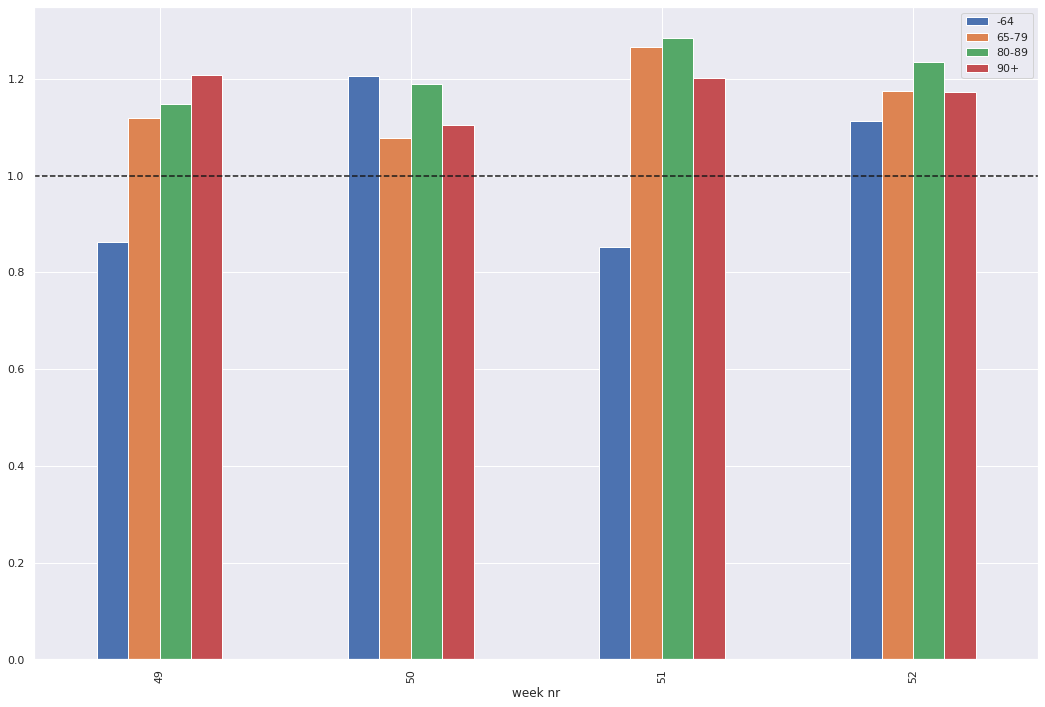

In [391]:
last_4_vs_baseline = twenty_twenty_last_4_weeks / last_week_baseline
last_4_vs_baseline.dropna().plot(kind='bar',figsize=(18,12))
plt.axhline(1,ls='dashed',color='k')
plt.xlabel('week nr')

In [392]:
last_4_weeks

-64     65-79     80-89       90+
date                                              
2015-12-06  0.018810  0.019893  0.020889  0.020698
2015-12-13  0.017283  0.018692  0.018987  0.019324
2015-12-20  0.022152  0.018772  0.019526  0.019965
2015-12-27  0.017760  0.019452  0.020287  0.019461
2016-01-03  0.018694  0.021900  0.021538  0.022295
2016-12-11  0.018285  0.019814  0.022190  0.021237
2016-12-18  0.016297  0.021320  0.021284  0.022407
2016-12-25  0.020073  0.021637  0.019926  0.022677
2017-01-01  0.019534  0.021646  0.021468  0.024035
2017-12-10  0.018029  0.018880  0.020251  0.019033
2017-12-17  0.017033  0.019845  0.019755  0.020451
2017-12-24  0.018328  0.019227  0.019537  0.021654
2017-12-31  0.019324  0.020849  0.021587  0.021482
2018-12-09  0.021429  0.019443  0.019558  0.020587
2018-12-16  0.018323  0.019097  0.019399  0.019564
2018-12-23  0.020911  0.018750  0.019974  0.018986
2018-12-30  0.018841  0.019559  0.019047  0.020987
2019-12-08  0.022823  0.019043  0.019095  0.021750
2019-12-15  0.017556  0.018685  0.021221  0.020871
2019-12-22  0.019202  0.020358  0.022416  0.021519
2019-12-29  0.017995  0.020477  0.020590  0.019436
2020-12-06  0.016525  0.021847  0.023778  0.024639
2020-12-13  0.020762  0.021263  0.023600  0.022589
2020-12-20  0.017372  0.024801  0.025345  0.025016
2020-12-27  0.020974  0.023926  0.025434  0.025183
2021-01-03  1.000000  1.000000  1.000000  1.000000

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

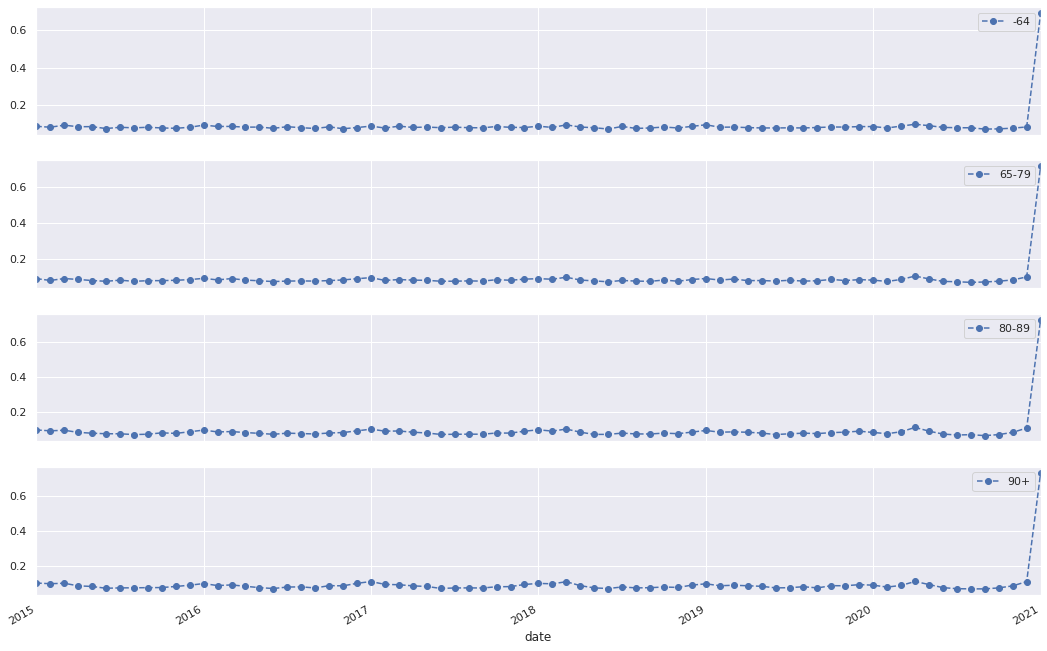

In [393]:
monthly_prop = grp_daily_corrected_monthly.groupby(
    grp_daily_corrected_monthly.index.year).transform(lambda x : x / x.sum())

monthly_prop[:-1].plot(subplots=True,figsize=(18,12),style='o--')

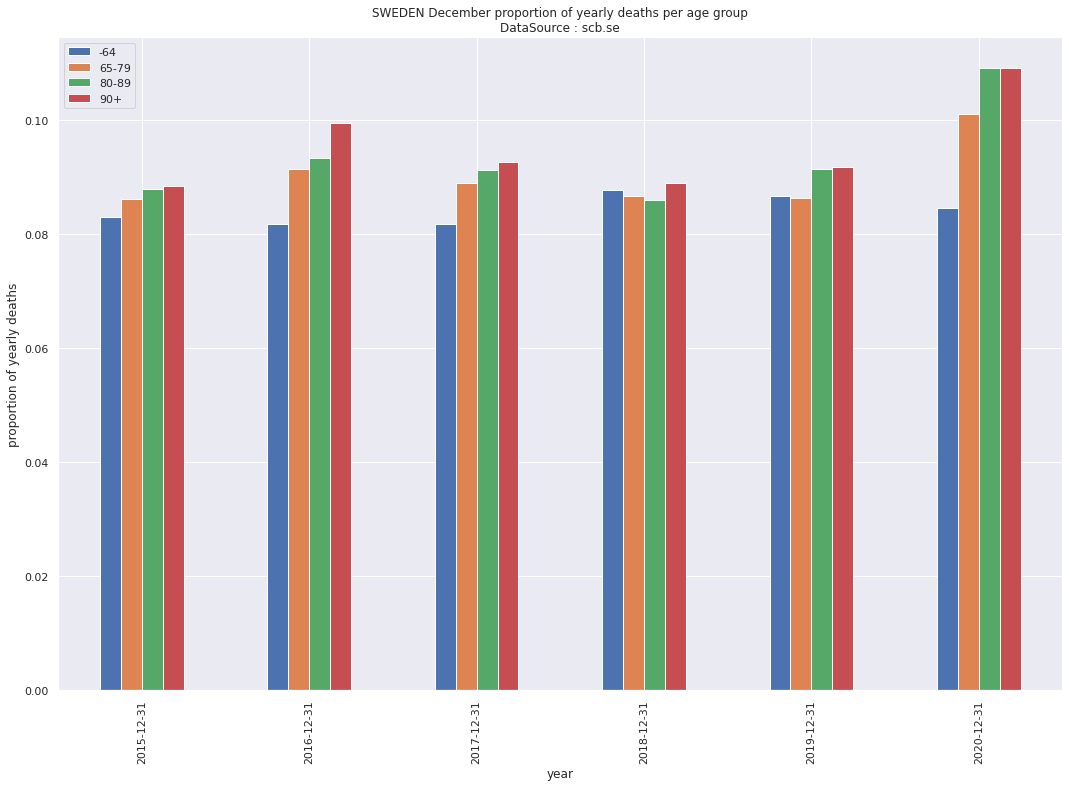

In [394]:
title = 'SWEDEN December proportion of yearly deaths per age group\nDataSource : scb.se'
decembers = monthly_prop.loc[monthly_prop.index.month==12]
decembers.plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('proportion of yearly deaths')
plt.xlabel('year')
_= plt.xticks(range(len(decembers)),decembers.index.date)

In [395]:
dead_age_df.groupby([dead_age_df.index.get_level_values(0),'scb_prel_age_bin']).sum()

dead  mid_bin
year scb_prel_age_bin                
2002 -64               13119     2125
     65-79             26997     1075
     80-89             37509      850
     90+               17384     1045
2003 -64               13094     2125
...                      ...      ...
2019 90+               21754     1045
2020 -64               10455     2125
     65-79             28795     1075
     80-89             34574      850
     90+               24300     1045

[76 rows x 2 columns]

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

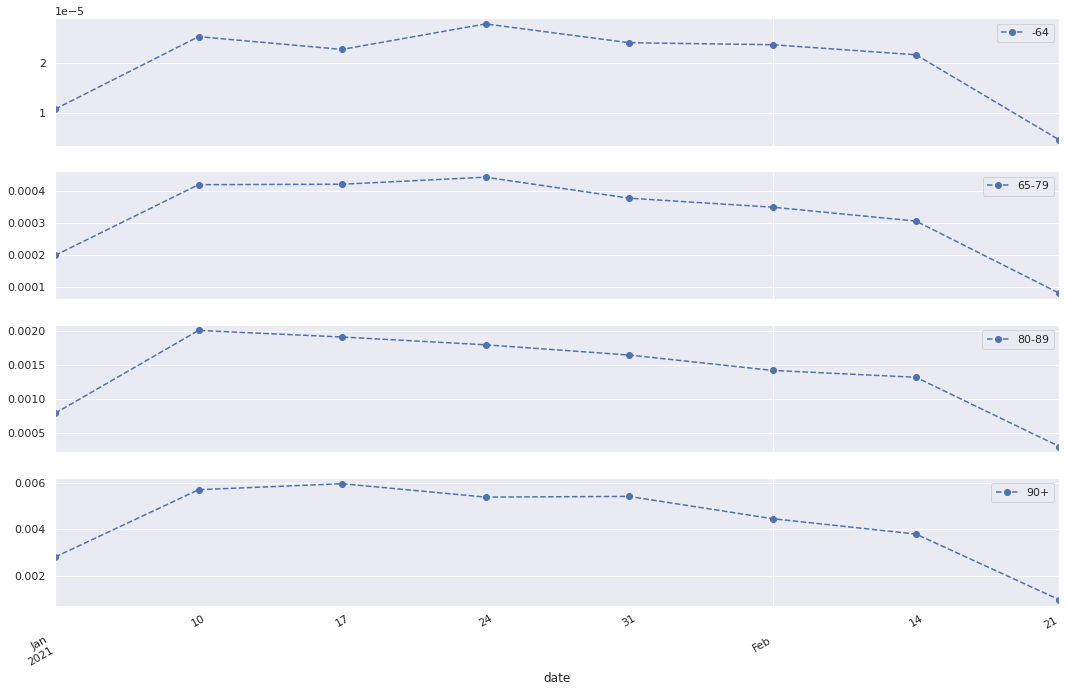

In [396]:
axes = mortality_all_grp_TD.loc['2021'].resample('W').sum().plot(subplots=True,figsize=(18,12),style='o--')
axes